# 1. 데이터 수집
### 1) BeautifulSoup을 활용한 데이터 수집

In [21]:
# 웹 크롤링에 도움 줄 모듈 추가하기
import urllib.request
from bs4 import BeautifulSoup
import time
import pandas as pd

data = []
temp = []


url ="https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId=102&date=20190430"
  # URL을 열면 나오는 홈페이지 내용
response = urllib.request.urlopen(url)

# html.parser를 이용해 기사를 끌어오자
soup = BeautifulSoup(response, "html.parser")
results = soup.select('div[class=ranking_headline]')

for result in results:
    
  # 제목
    print("제목 : ", result.text)
    title = result.text
  # 기사 링크 가져와서'
    print("https://news.naver.com"  + result.find('a').get('href'))
    url_article = "https://news.naver.com"  + result.find('a').get('href')
    response = urllib.request.urlopen(url_article)
    soup_article = BeautifulSoup(response, "html.parser")
    content = soup_article.select_one("#articleBodyContents")
    
    output = ""
    for item in content.contents:
        stripped = str(item).strip()
        if stripped == "":
            continue
        if stripped[0] not in ["<", "/"]:
            output += str(item).strip()
    output.replace("&apos;", "")
    content_article = output.replace("본문 내용TV플레이어", "")
    temp = [title,url_article, content_article]
    data.append(temp)

제목 :  
필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002903453&date=20190430&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003358948&date=20190430&type=1&rankingSectionId=102&rankingSeq=2
제목 :  
10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010796481&date=20190430&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010798065&date=20190430&type=1&rankingSectionId=102&rankingSeq=4
제목 :  
박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004367040&date=20190430&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인

In [23]:
data

[['\n필로폰 검출돼도 "안했다" 버텼던 박유천, \'이것\'에 무너졌다\n',
  'https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002903453&date=20190430&type=1&rankingSectionId=102&rankingSeq=1',
  '배우 겸 가수 박유천(33·구속)씨가 29일 자신에게 제기된 마약 구매·투약 혐의 대부분을 인정했다. “결단코 마약을 하지 않았다”는 눈물의 기자회견을 자처한 지 19일 만이다.박씨는 그동안 혐의를 강하게 부인해왔다. 자신의 체내에서 필로폰(메스암페타민) 성분이 검출됐다는 국립과학수사연구원의 감정 결과나 마약 판매자의 것으로 의심되는 은행 계좌로 돈을 송금하는 모습이 담긴 폐쇄회로TV(CCTV)가 나와도 흔들리지 않았다. 그러던 박씨의 심경에 ‘180도 변화’가 일어난 것이다.경기남부지방경찰청 마약수사대에 따르면 박씨는 이날 조사에서 대부분의 혐의를 시인했다. 그는 그동안 과거 연인 사이였던 남양유업 창업주의 외손녀 황하나(31·구속)씨와 2월17일, 지난달 10·12일 3차례에 걸쳐 1.5g가량의 필로폰을 산 뒤 5차례로 나눠 투약한 혐의를 받아왔다. 하지만 박씨는 이중 지난달 10일 이뤄진 마약구매 혐의만 부인하고 나머지 두 차례는 인정했다고 한다. 경찰은 이 구매 건은 황씨의 소행으로 보고 있다.박씨의 이런 심경변화는 구속(26일) 후 처음 이뤄진 지난 28일 조사 때 어느 정도 예견됐다는 게 경찰의 설명이다. 일단 법원에서 구속영장이 발부되면 검찰 송치 전까지 경찰서 유치장에 입감된다.생전 처음 보는 피의자들과 함께 지내는 것이다. 이동 때는 수갑을 차야 하고, 포승줄에도 묶인다.박씨는 구속 이후 정신적 충격이 상당해 보였다고 한다. 그래서인지 28일 조사는 3시간여 만에 끝났다. 박씨는 조사 막바지에 변호인을 통해 “사실관계 등을 정리할 시간이 필요하다”고 요청한 것으로 알려졌다.결국 박씨의 혐의를

# 1.데이터 수집
### 2) 데이터 프레임에 저장

In [25]:
pd.DataFrame(data)

0  \
0        \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1    \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
2     \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
3     \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
4          \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
5     \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
6            \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
7       \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
8              \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
9         \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
10          \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
11   \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
12        \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
13          \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
14    \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
15                \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
16          \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
17         \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
18         \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
19     \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
20    \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
21  \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
22        \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
23            \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
24                 \n"승리, 이번 주 구속영장"…YG 수사 확대\n   
25                 \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
26         \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
27    \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   
28              \n잔혹한 의부·비정한 친모…시신이 되어 버려진 아이\n   
29           \n군포 제비표페인트 공장서 화재 발생…"대응3단계 발령"\n   

                                                    1  \
0   https://news.naver.com/main/ranking/read.nhn?r...   
1   https://news.naver.com/main/ranking/read.nhn?r...   
2   https://news.naver.com/main/ranking/read.nhn?r...   
3   https://news.naver.com/main/ranking/read.nhn?r...   
4   https://news.naver.com/main/ranking/read.nhn?r...   
5   https://news.naver.com/main/ranking/read.nhn?r...   
6   https://news.naver.com/main/ranking/read.nhn?r...   
7   https://news.naver.com/main/ranking/read.nhn?r...   
8   https://news.naver.com/main/ranking/read.nhn?r...   
9   https://news.naver.com/main/ranking/read.nhn?r...   
10  https://news.naver.com/main/ranking/read.nhn?r...   
11  https://news.naver.com/main/ranking/read.nhn?r...   
12  https://news.naver.com/main/ranking/read.nhn?r...   
13  https://news.naver.com/main/ranking/read.nhn?r...   
14  https://news.naver.com/main/ranking/read.nhn?r...   
15  https://news.naver.com/main/ranking/read.nhn?r...   
16  https://news.naver.com/main/ranking/read.nhn?r...   
17  https://news.naver.com/main/ranking/read.nhn?r...   
18  https://news.naver.com/main/ranking/read.nhn?r...   
19  https://news.naver.com/main/ranking/read.nhn?r...   
20  https://news.naver.com/main/ranking/read.nhn?r...   
21  https://news.naver.com/main/ranking/read.nhn?r...   
22  https://news.naver.com/main/ranking/read.nhn?r...   
23  https://news.naver.com/main/ranking/read.nhn?r...   
24  https://news.naver.com/main/ranking/read.nhn?r...   
25  https://news.naver.com/main/ranking/read.nhn?r...   
26  https://news.naver.com/main/ranking/read.nhn?r...   
27  https://news.naver.com/main/ranking/read.nhn?r...   
28  https://news.naver.com/main/ranking/read.nhn?r...   
29  https://news.naver.com/main/ranking/read.nhn?r...   

                                                    2  
0   배우 겸 가수 박유천(33·구속)씨가 29일 자신에게 제기된 마약 구매·투약 혐의 ...  
1   배우 겸 가수 박유천(33)씨가 마약 투약 혐의를 인정한 가운데 법률 전문가들은 3...  
2   청테이프·노끈 범행도구 준비하고 공중전화로 불러내숨진 딸 "의붓아버지가 성추행", ...  
3   범행도구 준비해 밤새 시신유기 장소 찾아다녀…계부·친모 공범경찰, 살해범 의붓딸 강...  
4   [이데일리 정시내 기자] 배우 박유천이 마약 혐의를 인정한 가운데 그의 다리 상처가...  
5   마약 투약 혐의로 구속돼 수사를 받고 있는 배우 겸 가수 박유천(33)씨가 결국 혐...  
6   【광주=뉴시스】신대희 기자 = 성폭행 피해를 주장하는 중학생 의붓딸을 숨지게 하고 ...  
7   필로폰 부작용 증상인 ‘메스버그’ 논란까지 불러온 이른바 ‘박유천 다리 사진’ 관련...  
8   [앵커]마약 투약 혐의로 구속된 가수 박유천 씨가 어제 자신의 혐의를 인정했죠.거짓...  
9   1심 무죄·2심은 벌금형…3심 "상고 이유 안 된다" 상고 기각'여성이 발코니에 나...  
10  [머니투데이 류원혜 인턴기자] ['마약 투약 인정' 박유천, 2년 전 찍힌 사진에 ...  
11  [서울경제] 성추행으로 처벌받을 것이

In [19]:
output

'본문 내용TV플레이어30일 오후 9시 5분쯤 경기도 군포시 당정동 제비표페인트 공장에서 화재가 발생해 소방당국이 대응 3단계를 발령해 대응 중인 것으로 전해졌다.군포시는 이날 오후 10시쯤 당정동 인근 주민들에게 "공장화재로 연기가 발생하고 있으니 창문을 닫아달라"는 내용과 "화재가 진압 중이니 주변 통행 차량은 우회해달라"는 안전문자를 2차례 발송했다.경기소방본부는 오후 9시 37분 대응 3단계를 발령했으며 화재 현장에는 소방차량 85대와 소방인력 260명이 출동해 화재를 진압 중이라고 밝혔다. 소방 관계자는 "1동에서 시작된 불이 2동으로 옮겨 붙고 있어 진화에 총력을 기울이고 있다"고 전했다. 현재까지 인명피해는 없는 것으로 파악됐다.화재 대응 1단계는 소방서 1개의 모든 소방력을 동원하는 국지적 사고, 2단계는 한 광역 지방자치단체 내 여러 소방서의 소방력을 동원하는 범위, 최고 수준인 3단계는 전국적 차원에서 여러 시·도의 소방력을 동원하는 사태일 때 발령한다.정은혜 기자 jeong.eunhye1@joongang.co.kr▶▶ⓒ중앙일보(https://joongang.co.kr), 무단 전재 및 재배포 금지'

In [8]:
# 웹 크롤링에 도움 줄 모듈 추가하기
import urllib.request
from bs4 import BeautifulSoup
import time
import pandas as pd

data = []
temp = []

from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2019, 3, 1)
end_date = date(2019, 5, 1)
for single_date in daterange(start_date, end_date):
    part_url= single_date.strftime("%Y%m%d")
    base_url ="https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId=102&date="
    full_url = base_url+part_url
    response = urllib.request.urlopen(full_url)

# html.parser를 이용해 기사를 끌어오자
    soup = BeautifulSoup(response, "html.parser")
    results = soup.select('div[class=ranking_headline]')

    for result in results:
    
  # 제목
        print("제목 : ", result.text)
        title = result.text
  # 기사 링크 가져와서'
        print("https://news.naver.com"  + result.find('a').get('href'))
        url_article = "https://news.naver.com"  + result.find('a').get('href')
        response = urllib.request.urlopen(url_article)
        soup_article = BeautifulSoup(response, "html.parser")
        content = soup_article.select_one("#articleBodyContents")
    
        output = ""
        for item in content.contents:
            stripped = str(item).strip()
            if stripped == "":
                continue
            if stripped[0] not in ["<", "/"]:
                output += str(item).strip()
        output.replace("&apos;", "")
        content_article = output.replace("본문 내용TV플레이어", "")
        
        time.sleep(0.1)
        temp = [title,url_article, content_article]
        data.append(temp)

제목 :  
“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001177109&date=20190301&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=421&aid=0003858525&date=20190301&type=1&rankingSectionId=102&rankingSeq=2
제목 :  
“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001177248&date=20190301&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010666357&date=20190301&type=1&rankingSectionId=102&rankingSeq=4
제목 :  
‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001177074&date=20190301&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속

h

제목 :  
19살 차 국제결혼 부부 7년 만에 파경…책임은 누구에게?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010668639&date=20190302&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
버닝썬 '애나' 마약 검사결과 일부 회신…경찰 "곧 재소환"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010668442&date=20190302&type=1&rankingSectionId=102&rankingSeq=16
제목 :  
 요양병원에 홀로 앉아 있을 노년의 나, 상상해보니··· [토요판]…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=028&aid=0002444962&date=20190302&type=1&rankingSectionId=102&rankingSeq=17
제목 :  
조영남 무죄 끌어낸 영상녹화 조작 논란…감찰 착수하자 "장비탓"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=008&aid=0004182156&date=20190302&type=1&rankingSectionId=102&rankingSeq=18
제목 :  
돌아오는 아이들… '한국 1호 초등학교' 다시 웃다

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003430364&date=20190302&type=1&rankingSectionId=102&rankingSeq=19
제목 :  
유명 명품 구매 대행업체 '먹튀' 논란…피해액 8억대

https://new

제목 :  
“속옷노출사진 15만원"…'몰카' 누르니 '직캠'이 기승

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003430471&date=20190303&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
개학연기 강행방침 '보육대란' 비상…학부모들 당혹·분노

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010669530&date=20190303&type=1&rankingSectionId=102&rankingSeq=30
제목 :  
"언제 또 돌발 휴원할지 불안불안…더 이상 사립유치원 믿을수 없어…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=009&aid=0004313943&date=20190304&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
전국 사립유치원 365곳 '개학연기' 방침…서울은 21곳

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010670337&date=20190304&type=1&rankingSectionId=102&rankingSeq=2
제목 :  
한유총 오늘부터 '무기한 개학연기'…정부 긴급돌봄체계 가동

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010670175&date=20190304&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
한유총 "개학연기 무조건 철회…내일부터 유치원 정상운영"(종합)

https://news.

제목 :  
경찰, '마약류 투약 의혹' 버닝썬 이문호 대표 이틀 연속 조사

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010672909&date=20190305&type=1&rankingSectionId=102&rankingSeq=13
제목 :  
철원서 화물차·군용지프 충돌…군인 2명 사망·4명 중경상(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010673826&date=20190305&type=1&rankingSectionId=102&rankingSeq=14
제목 :  
미세먼지·황사 마스크, 'KF94'·'KF99' 차이점은?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=008&aid=0004183369&date=20190305&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
"하루 개학 연기도 잘못"…학부모단체, 한유총 고발한다

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=003&aid=0009092996&date=20190305&type=1&rankingSectionId=102&rankingSeq=16
제목 :  
개학연기 사립유치원 '0'…'에듀파인 의무화' 참여율 59%

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010673911&date=20190305&type=1&rankingSectionId=102&rankingSeq=17
제목 :  
고객님, ‘주문하실’ 물건 도착했습니다

https://news.naver.c

제목 :  
“우리 구역에서 나가라”…조폭 뺨치는 무서운 택시기사들

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002889367&date=20190306&type=2&rankingSectionId=102&rankingSeq=27
제목 :  
 [현장] “마스크 왜 벗었어?” “답답해”…초등학교 미세먼지 ‘살풍경…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=028&aid=0002445452&date=20190306&type=1&rankingSectionId=102&rankingSeq=28
제목 :  
"최악 미세먼지는 '기후의 역습'…中 오염물질에 대기정체 겹쳐"(종…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010676316&date=20190306&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
MB 놓고 고심한 법원…석방할 수밖에 없었던 이유는

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=421&aid=0003867346&date=20190306&type=1&rankingSectionId=102&rankingSeq=30
제목 :  
베이징發 미세먼지 뻔히 보이는데… 또 오리발 내민 중국

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003431241&date=20190307&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
[날씨] 7일째 비상저감조치…수도권 오후부터 '숨통'

https://news

제목 :  
국공립 '로또'라면서도…가 보면 '텅텅' 빈자리 왜?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=214&aid=0000930404&date=20190308&type=2&rankingSectionId=102&rankingSeq=11
제목 :  
[날씨]주말 쾌적한 공기 이어져…일요일 전국 비

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=449&aid=0000167502&date=20190308&type=2&rankingSectionId=102&rankingSeq=12
제목 :  
[단독] 음주운전 하다 사람 치고…신고하는 피해자 딸 폭행

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000715435&date=20190308&type=2&rankingSectionId=102&rankingSeq=13
제목 :  
"20% 수익 내주겠다" 투자자 6000명 속인 P2P 대출업체 대표 구속 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=032&aid=0002926952&date=20190308&type=1&rankingSectionId=102&rankingSeq=14
제목 :  
전현무·한혜진, 결별 전 마지막 방송 모습은

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=008&aid=0004185882&date=20190308&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
제주 5세 아이 사망사건, 새엄마가 갑자기 구속된 이유…‘궁금한 이…

https://news.n

제목 :  
"층간소음 앙갚음"…경찰, 천장에 '보복 스피커' 단 40대 조사

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010683288&date=20190309&type=1&rankingSectionId=102&rankingSeq=25
제목 :  
'버닝썬' 탈세 꾀했는지도 수사…"승리, 25일 현역 입대"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=437&aid=0000204600&date=20190309&type=2&rankingSectionId=102&rankingSeq=26
제목 :  
무면허 운전자 "자전거만 치었다"… 다음날 자전거 주인 숨진채 발…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=421&aid=0003871999&date=20190309&type=1&rankingSectionId=102&rankingSeq=27
제목 :  
"나 죽여봤자…" 흉기 든 괴한 막은 편의점 직원

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000715693&date=20190309&type=2&rankingSectionId=102&rankingSeq=28
제목 :  
장하나, 황교안에 일침 "문세먼지 같은 소리하네" 

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=047&aid=0002219855&date=20190309&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
[최은경의 옐로하우스 悲歌]⑮"명품백 있지 않냐고? 성매수 남성 주…

https:/

제목 :  
장병 평일 외출 한 달째, 인근 PC방·중국집은 '軍세권'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003431940&date=20190311&type=1&rankingSectionId=102&rankingSeq=9
제목 :  
[날씨] 중부·전북 공기 탁해져…주 후반 전국 눈비

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=214&aid=0000930764&date=20190311&type=2&rankingSectionId=102&rankingSeq=10
제목 :  
전두환 명예훼손 첫 재판…공소사실 전면 부인

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010686869&date=20190311&type=1&rankingSectionId=102&rankingSeq=11
제목 :  
전두환, 광주재판 전략은…헬기사격 '사실'을 '쟁점'으로

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010687130&date=20190311&type=1&rankingSectionId=102&rankingSeq=12
제목 :  
전두환, 이순자와 함께 광주행…입장표명 없이 침묵

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=003&aid=0009104223&date=20190311&type=1&rankingSectionId=102&rankingSeq=13
제목 :  
"정준영, 룸살롱 여성 불법 촬영 영상 유포…피해자만 10여 명"

https://news.naver.com/main/r

제목 :  
버닝썬 불똥이 라멘집에 튀었다… 승리의 라멘집 점주, 불매 운동 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001180008&date=20190312&type=1&rankingSectionId=102&rankingSeq=24
제목 :  
폭행-마약-성접대-몰카 줄줄이…'버닝썬' 불길 어디까지

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=437&aid=0000204841&date=20190312&type=2&rankingSectionId=102&rankingSeq=25
제목 :  
“살아남으려면 친구도 밟고 올라서야 한다?… 사활 건 전장”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001180131&date=20190312&type=1&rankingSectionId=102&rankingSeq=26
제목 :  
[단독] 묻힐뻔한 '정준영 몰카 범죄'…당시 어떻게 무혐의 받았나

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000716512&date=20190312&type=2&rankingSectionId=102&rankingSeq=27
제목 :  
지방대생 사망사고 기사에 쏟아진 저주 "너무 충격적"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=047&aid=0002220104&date=20190312&type=1&rankingSectionId=102&rankingSeq=28
제목 :  
승리, 돌연 은퇴…정준영 '성관계 몰카' 유포 수사

https://news.

제목 :  
유인석은 알고 승리는 몰랐나…"경찰총장과 유리홀딩스 대표, 문자 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=015&aid=0004107628&date=20190314&type=1&rankingSectionId=102&rankingSeq=6
제목 :  
‘그날의 진실’은?…‘별장 성접대’ 피해 여성의 절규

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=056&aid=0010680657&date=20190314&type=2&rankingSectionId=102&rankingSeq=7
제목 :  
승리·정준영 동시 소환…'성접대·몰카' 등 전방위 조사(종합3보)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010695164&date=20190314&type=1&rankingSectionId=102&rankingSeq=8
제목 :  
유인석 유리홀딩스 대표, 포토라인 피했다..."경찰 연결고리"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004330715&date=20190314&type=1&rankingSectionId=102&rankingSeq=9
제목 :  
'버닝썬 사건' 새 국면… 경찰 수사 미진 땐 검찰 나설 듯

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=014&aid=0004193449&date=20190314&type=1&rankingSectionId=102&rankingSeq=10
제목 :  
[현장영상] 경찰 포토라인에 선 정준영 "죄송합니다"

https://news

제목 :  
‘그날의 진실’은?…‘별장 성접대’ 피해 여성의 절규

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=056&aid=0010680657&date=20190315&type=2&rankingSectionId=102&rankingSeq=20
제목 :  
'성접대 의혹' 김학의, 오늘 6년만에 소환…출석 미지수

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=421&aid=0003883260&date=20190315&type=1&rankingSectionId=102&rankingSeq=21
제목 :  
권력유착·마약·탈세…놓쳐선 안 될 버닝썬 수사 '본질'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=437&aid=0000205050&date=20190315&type=2&rankingSectionId=102&rankingSeq=22
제목 :  
“피해 증명하라는데… 다시 살균제 쓰고 아픈 애 낳으라는 건가요”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=081&aid=0002983772&date=20190315&type=1&rankingSectionId=102&rankingSeq=23
제목 :  
전국 모든 학교에 공기정화장치 … 중·고생도 독감 예방접종 무료

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004430410&date=20190315&type=1&rankingSectionId=102&rankingSeq=24
제목 :  
[토요워치] "사장님, 점심시간은 '근무시간'이 아닙니다"

https://news.

제목 :  
[취재파일] 김학의 前 차관 성 접대 의혹과 동영상, 그리고 정확한 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000717598&date=20190317&type=1&rankingSectionId=102&rankingSeq=4
제목 :  
'개학연기 투쟁' 11일만에 … 대형 사립유치원 에듀파인 100% 도입

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004431122&date=20190317&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
기상악화로 회항 뒤 '악몽'으로 변한 패키지 여행

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000717621&date=20190317&type=2&rankingSectionId=102&rankingSeq=6
제목 :  
버닝썬 사건 파장 어디까지?…핵심 의혹과 쟁점

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=214&aid=0000932620&date=20190317&type=2&rankingSectionId=102&rankingSeq=7
제목 :  
‘버닝썬 경찰유착’…전직은 구속, 현직은 입건, 총경은 피의자 전환…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004431260&date=20190317&type=1&rankingSectionId=102&rankingSeq=8
제목 :  
87년생 미혼 이민지씨, “나는 정말 끝난 것일까?”

https://news.n

제목 :  
윤지오 '장자연 추행사건' 재차 증언…진상조사 연장소식에 눈물

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010702002&date=20190318&type=1&rankingSectionId=102&rankingSeq=18
제목 :  
'이희진 부모살해' 공범피의자 3명, 中칭다오로 이미 출국(2보)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010702028&date=20190318&type=1&rankingSectionId=102&rankingSeq=19
제목 :  
[단독] 승리 성매매 알선 의혹 여성···"나는 업소녀 아니다"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002892205&date=20190318&type=1&rankingSectionId=102&rankingSeq=20
제목 :  
[단독]버닝썬측 前경찰, 강남署 과장 통해 ‘미성년 출입’ 무마시도 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=020&aid=0003204816&date=20190318&type=1&rankingSectionId=102&rankingSeq=21
제목 :  
경북 안동 공사장서 작업 중이던 노동자 3명 추락···“전원 사망”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=032&aid=0002929117&date=20190318&type=1&rankingSectionId=102&rankingSeq=22
제목 :  
[탐사하다] 고학력 부모일수록 명문대 대물림 많다

제목 :  
모텔에 1㎜ 몰카→유료 생중계…투숙객 1600명 당했다

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=003&aid=0009123658&date=20190320&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
버닝썬 수사 시작부터 난관···마약유통 의혹 이문호 대표 영장 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002892744&date=20190320&type=2&rankingSectionId=102&rankingSeq=2
제목 :  
이부진, 프로포폴 상습 투약 의혹

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=607&aid=0000000189&date=20190320&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
이희진 부모살해 피의자 "제가 안 죽였습니다" 항변

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010705325&date=20190320&type=1&rankingSectionId=102&rankingSeq=4
제목 :  
정부연구단 "포항지진, 지열발전이 '촉발'…자연지진 아냐"(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010705965&date=20190320&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
김학의 ‘특수강간’ 무혐의 이유 보니…피해자답지 않아서?

https://news.naver.com/main/rank

제목 :  
공장도 많지 않은데… 안성, 미세먼지 1위 오명 왜 뒤집어썼나

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003434221&date=20190321&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
겨울 2번 나도록 아직도 '텐트'…"갈라진 집 방치"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=214&aid=0000933775&date=20190321&type=2&rankingSectionId=102&rankingSeq=16
제목 :  
"살려달라" 작은소리에 기지 발휘…성범죄자 잡은 시민들

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=437&aid=0000205521&date=20190321&type=2&rankingSectionId=102&rankingSeq=17
제목 :  
'위대한 승츠비', 그가 쏘아 올린 작은 공

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=008&aid=0004191765&date=20190321&type=1&rankingSectionId=102&rankingSeq=18
제목 :  
“김학의 부실 수사는 네 탓” 뒤늦게 치고받는 검경

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=469&aid=0000373768&date=20190321&type=1&rankingSectionId=102&rankingSeq=19
제목 :  
[날씨] 이례적 3월 하순 한파…주말까지 찬공기 머물러

https://news.naver.com/main/ran

제목 :  
[뉴스딱] '와락' 껴안고 도망간 여성…딱 걸린 '수상한 목적'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000718875&date=20190322&type=2&rankingSectionId=102&rankingSeq=29
제목 :  
'이부진 프로포폴 의혹' 자료확보 불발…이틀째 현장조사

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010710801&date=20190322&type=1&rankingSectionId=102&rankingSeq=30
제목 :  
 [단독] 김학의 한밤중 타이로 출국하려다가 ‘긴급출국금지’ 

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=028&aid=0002447523&date=20190323&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
청주 노래방 비상구서 5명 3m 아래로 추락…"2명은 의식 없어"(종합…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010713113&date=20190323&type=1&rankingSectionId=102&rankingSeq=2
제목 :  
[단독] 경찰, 이부진 프로포폴 의혹 성형외과 전격 압수수색

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003348966&date=20190323&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
스마트폰에서 눈을 떼봤다[남기자의 체헐리즘]

https://news.

제목 :  
"쇼크로 쓰러져 죽을 뻔"…헬스장에 퍼진 '위험한 주사기'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000719331&date=20190324&type=2&rankingSectionId=102&rankingSeq=13
제목 :  
박나래 향초 선물 '불법'이라는데…혹시 나도?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=008&aid=0004193109&date=20190324&type=1&rankingSectionId=102&rankingSeq=14
제목 :  
“71년 지났지만 죽은 내 아기들을 어찌잊나”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=032&aid=0002930245&date=20190324&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
"'그것이 알고싶다'에 제보...승리·정준영 단톡방 김씨, 나 알지?"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004337127&date=20190324&type=1&rankingSectionId=102&rankingSeq=16
제목 :  
후배 부탁에 몰락한 은행원..남은건 100억 빚과 전과자 낙인뿐

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=014&aid=0004198414&date=20190324&type=1&rankingSectionId=102&rankingSeq=17
제목 :  
‘그것이 알고 싶다’ 승리 뒤에 있는 대만 린사모, 버닝썬 실소유주…

https://news

제목 :  
"딸을 잃어버린 아빠는 죄책감에..." 60대 어머니의 오열

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=014&aid=0004198904&date=20190325&type=1&rankingSectionId=102&rankingSeq=27
제목 :  
[단독] 김학의 "64세에 어딜 가겠나···해외도피 생각 없다"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002893980&date=20190325&type=1&rankingSectionId=102&rankingSeq=28
제목 :  
김학의 뇌물혐의 수사 권고…·곽상도·이중희도 수사대상(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010716786&date=20190325&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
"어디서든 화장해드립니다"…차 지붕에선 '검은 연기'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=214&aid=0000934838&date=20190325&type=2&rankingSectionId=102&rankingSeq=30
제목 :  
강릉서 승용차 바다에 추락…10대 5명 숨져(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010717495&date=20190326&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
강릉 승용차 추락 사고…신원파악 한때 혼선

https://news.naver.com/mai

제목 :  
"'몰카 사건' 정준영, 유치장서 만화책 읽으며 지내"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002894625&date=20190327&type=1&rankingSectionId=102&rankingSeq=11
제목 :  
황혼이혼 급증에 전 배우자 국민연금 나눠 갖는 수급자↑

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010720736&date=20190327&type=1&rankingSectionId=102&rankingSeq=12
제목 :  
용인 성복동 롯데몰 공사장서 불…소방당국 "대응 2단계 발령"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010722958&date=20190327&type=1&rankingSectionId=102&rankingSeq=13
제목 :  
이학수 "MB, 다스 소송비 요청" 증언…MB, 여러 차례 욕설

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000720207&date=20190327&type=2&rankingSectionId=102&rankingSeq=14
제목 :  
이매리 "술시중 강요한 그, 아버지 왜 안죽냐며 웃기도"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002894672&date=20190327&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
교체중인 아파트 엘리베이터 17층서 바닥으로 추락…2명 사망(종합)

https://n

제목 :  
이학수 "MB, 다스 소송비 요청" 증언…MB, 여러 차례 욕설

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000720207&date=20190328&type=2&rankingSectionId=102&rankingSeq=25
제목 :  
“가슴 만져도 놀라지 말아라” 교주 정명석의 수상한 ‘건강검진’

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001185329&date=20190328&type=1&rankingSectionId=102&rankingSeq=26
제목 :  
윤균상 "반려묘 세상 떠나…좋은 아빠 못돼 미안"(전문)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=008&aid=0004195841&date=20190328&type=1&rankingSectionId=102&rankingSeq=27
제목 :  
“집 팔라더니”…靑·부동산 부처 10명 중 3명은 ‘다주택’

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=056&aid=0010685617&date=20190328&type=2&rankingSectionId=102&rankingSeq=28
제목 :  
'순간포착 세상에 이런일이' 길이 2m10cm 의문의 머리카락

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=031&aid=0000486476&date=20190328&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
'김상혁 예비신부' 송다예, "남편 아직 감 있네" 응원

https:/

제목 :  
“낭산산 독극물 쓰레기 치우려면  지금 속도로는 500년 걸린당게” […

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=032&aid=0002931572&date=20190330&type=1&rankingSectionId=102&rankingSeq=9
제목 :  
 외국인 유학생 14만명 시대…한국 대학 풍경이 바뀐다 

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=028&aid=0002448386&date=20190330&type=1&rankingSectionId=102&rankingSeq=10
제목 :  
우리의 피를 관료의 펜으로 저울질 하지 말라

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001185860&date=20190330&type=1&rankingSectionId=102&rankingSeq=11
제목 :  
임대료 천정부지 ‘핫한 경리단길 상권’…유명세 쫓다 끝없는 추락 […

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003350785&date=20190330&type=1&rankingSectionId=102&rankingSeq=12
제목 :  
[날씨] 오전 곳곳 대기질 탁해…찬바람 불어 '쌀쌀'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010729756&date=20190330&type=1&rankingSectionId=102&rankingSeq=13
제목 :  
[해보니 시리즈 74] 미루던 공기청정기 청소, 1년 만에 해보니

https://n

제목 :  
윤지오 "신변 위협 느껴 경찰에 3차례 도움 요청…무응답"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010730167&date=20190331&type=1&rankingSectionId=102&rankingSeq=23
제목 :  
포항지진 후 17개월 “기어서 말고 서서 집에 들어가게 해달라”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=032&aid=0002931605&date=20190331&type=1&rankingSectionId=102&rankingSeq=24
제목 :  
직접 만든 향초 선물했다 7000만원 벌금폭탄? [이슈 속으로]

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003350831&date=20190331&type=1&rankingSectionId=102&rankingSeq=25
제목 :  
저소득 중증장애인 연금액 4월부터 '25만→30만원'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=003&aid=0009144562&date=20190331&type=1&rankingSectionId=102&rankingSeq=26
제목 :  
'故 장자연 증인' 윤지오 "경찰 비상호출, 누른지 9시간 지나도 연…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=015&aid=0004116669&date=20190331&type=1&rankingSectionId=102&rankingSeq=27
제목 :  
아들이 준 15만원 뺏으려 할머니 숨지게 한 60대…2심도 징역 10

제목 :  
부산 해운대 대형 산불, 강풍 타고 빠르게 확산(3보)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010735757&date=20190402&type=1&rankingSectionId=102&rankingSeq=7
제목 :  
‘아기가 정부 돌보미에 당한 학대’ 맘카페 끓어오른 CCTV(영상)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001186615&date=20190402&type=1&rankingSectionId=102&rankingSeq=8
제목 :  
SK·현대가 3세, '마약구매' 입건..."부유층 더 연루"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=052&aid=0001273656&date=20190402&type=2&rankingSectionId=102&rankingSeq=9
제목 :  
부산 해운대 산불 확산…불씨 바람 타고 수십ｍ 날아다녀(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010735892&date=20190402&type=1&rankingSectionId=102&rankingSeq=10
제목 :  
"고소하고 고소해도"…수사팀이 주목한 '윤중천 3번 무혐의'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000721336&date=20190402&type=2&rankingSectionId=102&rankingSeq=11
제목 :  
14개월 아기 뺨 때리고 발로‥시민들 '탄식'

https://news.nave

제목 :  
[뉴스줌인] ‘14개월 아이의 트라우마’…우리 아이는?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=056&aid=0010687654&date=20190403&type=2&rankingSectionId=102&rankingSeq=21
제목 :  
"머리 숙여 애도"…71년만에 제주4.3에 입장 밝힌 경찰청장

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004344906&date=20190403&type=1&rankingSectionId=102&rankingSeq=22
제목 :  
경남 보선 2곳 투표 개시…‘미니 총선’ 누가 웃을까

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=003&aid=0009149825&date=20190403&type=1&rankingSectionId=102&rankingSeq=23
제목 :  
사망자 1만 4256명… 23%가 아동·청소년, ‘사건’ ‘항쟁’ ‘혁명’ 논…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=081&aid=0002988212&date=20190403&type=1&rankingSectionId=102&rankingSeq=24
제목 :  
“야, 장난하냐? 우리 아빠 경찰청장과 ‘베프’야” 황하나 추정 음성

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001187005&date=20190403&type=1&rankingSectionId=102&rankingSeq=25
제목 :  
윤지오 "경찰, 무섭다하니 키 170㎝ 넘어 토막살인 힘들다

제목 :  
“김학의 차관 내정 발표날, 청와대 들어가 동영상 ‘진짜 같다’ 보고…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=469&aid=0000377933&date=20190405&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
고성 대형산불 강풍 타고 속초 시내 위협…주민 대피령 확산(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010742007&date=20190405&type=1&rankingSectionId=102&rankingSeq=6
제목 :  
고성산불 속초시내로 확산…주민 3천명 대피·인명피해 속출(종합2…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010742171&date=20190405&type=1&rankingSectionId=102&rankingSeq=7
제목 :  
[단독] 황하나, 의사 처방전 없이 향정신성 의약품도 복용

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002897240&date=20190405&type=1&rankingSectionId=102&rankingSeq=8
제목 :  
강용석 무죄 극과극, “변호사가 문서 위조 할리가” VS “가재는 게 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=020&aid=0003209154&date=20190405&type=1&rankingSectionId=102&rankingSeq=9
제목 :  
[속보]황하나, '마약 혐의' 일부 인정…이르면 오늘 

제목 :  
'소송 취하서 위조' 뒤집힌 판결…강용석 항소심서 무죄

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000722571&date=20190406&type=2&rankingSectionId=102&rankingSeq=19
제목 :  
연쇄성폭행범, 출소 1년 만에 아내 살해…신상공개 왜 안했나

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=079&aid=0003213138&date=20190406&type=1&rankingSectionId=102&rankingSeq=20
제목 :  
생리와 ‘이별’한 여성들···“출산 안 할 건데 생리는 왜?” [아! …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=032&aid=0002932961&date=20190406&type=1&rankingSectionId=102&rankingSeq=21
제목 :  
[단독] "연예인 친구 권유로 다시 마약"…황하나 구속

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000722687&date=20190406&type=2&rankingSectionId=102&rankingSeq=22
제목 :  
시골마을 대청소로 4년6개월만에 밝혀진 '백골 살인사건'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002897350&date=20190406&type=1&rankingSectionId=102&rankingSeq=23
제목 :  
"황하나, 성관계 동영상도 유포했다" 제보 쇄도

https://news.nav

제목 :  
구속 전까지 매번 옷 갈아입던 황하나 “연예인이 잠든 내게 강제 투…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002897687&date=20190408&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
'김학의 인천공항 발견' 이틀 전, 무슨 일이?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=047&aid=0002223011&date=20190408&type=1&rankingSectionId=102&rankingSeq=4
제목 :  
황하나 '연예인 마약 권유' 진술에 변호사의 일침

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002897719&date=20190408&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
“유흥업소 여성 성매매 알선” 승리 팔라완 파티, 무슨 일 있었나

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004445041&date=20190408&type=1&rankingSectionId=102&rankingSeq=6
제목 :  
"YG·JYP 연습생 8년···38㎏로 살빼고 男과 택시 탑승금지"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002897697&date=20190408&type=1&rankingSectionId=102&rankingSeq=7
제목 :  
황하나에 '마약 2종' 건넸다는데···연루된 연예인 누구

https://news.nav

제목 :  
항상 유쾌했던 로버트 할리 "죄송합니다" 거듭 사죄

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010750033&date=20190409&type=1&rankingSectionId=102&rankingSeq=17
제목 :  
‘음란물 유포’ 로이킴, 기습입국…성난 팬들 “퇴출시켜라”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=081&aid=0002989799&date=20190409&type=1&rankingSectionId=102&rankingSeq=18
제목 :  
로버트 할리 자택서 주사기 발견…간이검사 '양성'반응(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010751010&date=20190409&type=1&rankingSectionId=102&rankingSeq=19
제목 :  
황하나 연예인 외 공범에 "1억 줄테니 네가 뒤집어 써" 돈이면 다 …

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=011&aid=0003535255&date=20190409&type=1&rankingSectionId=102&rankingSeq=20
제목 :  
도피 20년 만에 귀향 마닷 부모…"14명 중 8명 합의"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=003&aid=0009162669&date=20190409&type=1&rankingSectionId=102&rankingSeq=21
제목 :  
강남에 나타난 마이크로닷…“변제·합의 최선” 논란 후 첫 심경

https://

제목 :  
황하나 “올 초에도 함께 마약” vs 박유천 “마약 상상도 못해..무섭…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004351127&date=20190411&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
기자회견까지 열고 결백 주장한 박유천이 피의자로 입건된 이유

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001189393&date=20190411&type=1&rankingSectionId=102&rankingSeq=2
제목 :  
삭발·염색에 제모 왁싱… 교묘히 법망 피해 간 '미꾸라지' 하일

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003353847&date=20190411&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
마이크로닷 이모 “나도 8000만원 떼였는데…가족에 더 야박”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002898637&date=20190411&type=1&rankingSectionId=102&rankingSeq=4
제목 :  
황하나 vs 박유천, 누가 거짓말하나?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003354023&date=20190411&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
도사견 사망사건에 '개통령' 강형욱 소환 "총기와 같다"

https://news.nave

제목 :  
[단독] '김학의 동영상' 고화질 원본 보니..."여성 24명 성범죄 동…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=052&aid=0001278768&date=20190412&type=2&rankingSectionId=102&rankingSeq=15
제목 :  
"정신 잃은 사람처럼…" 영화배우 양모씨, 필로폰 투약 혐의 체포

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004448860&date=20190412&type=1&rankingSectionId=102&rankingSeq=16
제목 :  
최민수 '보복운전' 첫 재판서 혐의 부인…"절대 사실과 달라"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010759070&date=20190412&type=1&rankingSectionId=102&rankingSeq=17
제목 :  
[수사반장]해운대 아파트서 대형견이 30대 남성 중요 부위 물어

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003438942&date=20190412&type=1&rankingSectionId=102&rankingSeq=18
제목 :  
쇼핑몰 화장실서 주삿바늘 꽂힌채 숨진 男간호사, 행적보니

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002899056&date=20190412&type=1&rankingSectionId=102&rankingSeq=19
제목 :  
웃으며 출석한 최민수, ‘보복운전’ 첫 공판서 모든 혐의

제목 :  
"정신 잃은 사람처럼…" 영화배우 양모씨, 필로폰 투약 혐의 체포

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004448860&date=20190413&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
발등에 불 떨어진 경찰.. 2013년 원본 '김학의 동영상‘ 찾기 위하여

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=014&aid=0004210725&date=20190413&type=1&rankingSectionId=102&rankingSeq=30
제목 :  
“이미 결별” 박유천, 황하나 아파트에 드나든 CCTV

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001190076&date=20190414&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
승리, 팔라완 초호화 생일파티 초대된 술집 여종업원 "자발적 성관…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003354627&date=20190414&type=1&rankingSectionId=102&rankingSeq=2
제목 :  
유흥업소 여성 "승리 필리핀 생일파티서 성관계" 진술

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010761723&date=20190414&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
“우리 집 가자” 여학생 2명 납치하려 한 30대 男

https://

제목 :  
분당차병원 "신생아 떨어뜨린 건 맞지만 사망은 질병 때문"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002899514&date=20190415&type=1&rankingSectionId=102&rankingSeq=13
제목 :  
백두산 천지 부풀어 오르는 화산 분화 징후 나타나... 대책 필요 

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=052&aid=0001280122&date=20190415&type=1&rankingSectionId=102&rankingSeq=14
제목 :  
"오거돈은 親日" 부산시장실 몰려간 민노총

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003439414&date=20190415&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
분만 직후 신생아 떨어뜨려 사망…'과실·은폐의혹' 의료진 9명 입…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004449306&date=20190415&type=1&rankingSectionId=102&rankingSeq=17
제목 :  
“분만중 신생아 떨어뜨려 사망” 3년간 숨긴 의사 등 9명 수사

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=020&aid=0003210670&date=20190415&type=0&rankingSectionId=102&rankingSeq=18
제목 :  
박근혜, 황교안, 김기춘... "세월호로 처벌받지 않았다"

https://ne

제목 :  
[사건후] 늦게 만난 ‘인연’ 영원할 줄 알았는데…경찰서에서 ‘마침…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=056&aid=0010691938&date=20190416&type=1&rankingSectionId=102&rankingSeq=27
제목 :  
[전문] 에이미 7년만의 폭로 "연예인A와 프로포폴 함께해"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002899915&date=20190416&type=1&rankingSectionId=102&rankingSeq=28
제목 :  
차명진 "회쳐먹고, 쌈싸먹고, 징하게 해먹어" 세월호 5주기에 유가…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=011&aid=0003539146&date=20190416&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
경찰은 왜 '박유천 신체'를 압수수색했나

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003439605&date=20190416&type=1&rankingSectionId=102&rankingSeq=30
제목 :  
에이미 소울메이트로 거론된 휘성이 내놓은 입장

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001190976&date=20190417&type=1&rankingSectionId=102&rankingSeq=1
제목 :  
진주 아파트 방화·흉기 난동으로 사망 5명·부상 13명(종합)

https://news.nave

제목 :  
제모·염색으로 증거 인멸 의심받는 박유천의 반박

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001191345&date=20190418&type=1&rankingSectionId=102&rankingSeq=11
제목 :  
간호조무사의 주삿바늘, 자살 위장한 독침이었나

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=079&aid=0003217421&date=20190418&type=1&rankingSectionId=102&rankingSeq=12
제목 :  
박유천 ‘던지기 마약 구매’ 정황 CCTV 잡혔다…경찰 영상 확보

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001191278&date=20190418&type=1&rankingSectionId=102&rankingSeq=13
제목 :  
 “정준영 일행에 집단 성폭행 당해” 첫 피해 주장 나왔다 

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=028&aid=0002450799&date=20190418&type=1&rankingSectionId=102&rankingSeq=14
제목 :  
마약사범들이 사는 길 ‘제모’…박유천은?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=056&aid=0010692739&date=20190418&type=1&rankingSectionId=102&rankingSeq=15
제목 :  
“여자 둘만 산다고 해코지, 오물 투척까지” 진주아파트 506호 사연

https://news.naver.com/mai

제목 :  
[단독]“4년전엔 굴착기 자격증 따… 의사 바뀌며 치료 중단해 비극”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=020&aid=0003211680&date=20190419&type=1&rankingSectionId=102&rankingSeq=25
제목 :  
왼손잡이로 알려진 박유천…오른손 '상처 자국' 미스터리

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002900878&date=20190419&type=1&rankingSectionId=102&rankingSeq=26
제목 :  
강용석 '임블리 과거' 발언에 임지현 남편 "분노 치민다"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004357474&date=20190419&type=1&rankingSectionId=102&rankingSeq=27
제목 :  
윤중천 "검찰, 잘못해놓고 이제와서...억울해 죽고싶다"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003440549&date=20190419&type=1&rankingSectionId=102&rankingSeq=28
제목 :  
강원 동해시 북동쪽 54km 해역 규모 4.3 지진…"피해 없을 듯"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000725616&date=20190419&type=1&rankingSectionId=102&rankingSeq=29
제목 :  
[전문] 임블리 남편 "'아내 동거' 강용석 주장 사실 아니야, 오히려

제목 :  
'변종마약 투약' 현대그룹 3세 입국…인천공항서 체포(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010776132&date=20190421&type=1&rankingSectionId=102&rankingSeq=9
제목 :  
7인조 아이돌 '머스트비' 교통사고…운전하던 매니저 사망

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010775971&date=20190421&type=1&rankingSectionId=102&rankingSeq=10
제목 :  
휘성 "성폭행 모의는 누명"...녹취록 공개

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=052&aid=0001282659&date=20190421&type=2&rankingSectionId=102&rankingSeq=11
제목 :  
"층간소음 앙갚음"…아파트 천장에 '보복 스피커' 단 40대

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000725959&date=20190421&type=1&rankingSectionId=102&rankingSeq=12
제목 :  
오열하는 휘성과 통화한 에이미, 이틀 뒤 올린 게시물 “살 빼자”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001192002&date=20190421&type=1&rankingSectionId=102&rankingSeq=13
제목 :  
아이돌 그룹 ‘머스트비’ 차량 교통사고…매니저 사망

https://news.naver.com

제목 :  
수십억 원대 '슈퍼카' 소송...소유주는 누구?

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=052&aid=0001283085&date=20190422&type=2&rankingSectionId=102&rankingSeq=23
제목 :  
[단독]“승리 단톡방 멤버들, 여성들과 상습 마약풍선 파티”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=020&aid=0003212078&date=20190422&type=1&rankingSectionId=102&rankingSeq=24
제목 :  
‘68차례 조현병 치료’ 안인득 노모가 흐느끼며 한 말

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001192251&date=20190422&type=1&rankingSectionId=102&rankingSeq=25
제목 :  
한강 '밀실텐트' 단속 첫날…남녀는 '민망'·단속원은 '난감'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003441081&date=20190422&type=1&rankingSectionId=102&rankingSeq=26
제목 :  
결혼 반대하는 父 살인 후 PC방 간 커플…집에 시신 방치

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003356702&date=20190422&type=1&rankingSectionId=102&rankingSeq=27
제목 :  
애견호텔 맡겼는데 3일 만에 '로드킬'…매립장에 버려져 

https://news.naver.c

제목 :  
[전문] 윤지오 "출국금지? 제가 범죄자인가요"…김수민 작가 측 주…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004455197&date=20190424&type=1&rankingSectionId=102&rankingSeq=7
제목 :  
승리, 성매매 알선 정황 포착…"강남 고급 주점서 300명 초대해 파…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004455191&date=20190424&type=1&rankingSectionId=102&rankingSeq=8
제목 :  
[속보] 윤지오 급거 출국 "지금 장난하냐? 모친 아파 캐나다 行"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=015&aid=0004130611&date=20190424&type=1&rankingSectionId=102&rankingSeq=9
제목 :  
마약 '양성' 박유천, 눈물의 기자회견은 왜 자청했나 [이슈+]

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003357391&date=20190424&type=1&rankingSectionId=102&rankingSeq=10
제목 :  
'국민 안전VS범죄자 초상권'.. '실화탐사대' 조두순 얼굴 공개

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004361329&date=20190424&type=1&rankingSectionId=102&rankingSeq=11
제목 :  
“장자연 죽음 이용”… 윤지오 고소장 접수한 박

제목 :  
오늘부터 만 6세 미만 자녀 둔 全가정에 월 10만원

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010785181&date=20190425&type=1&rankingSectionId=102&rankingSeq=21
제목 :  
[뉴스딱] 아동복 모델들의 도 넘은 '어른 흉내'…국민청원 등장

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000726993&date=20190425&type=2&rankingSectionId=102&rankingSeq=22
제목 :  
2019 근로장려금 신청자격 완화…사전 예약 30일까지

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=020&aid=0003213191&date=20190425&type=1&rankingSectionId=102&rankingSeq=23
제목 :  
[버닝썬] '농담'이라더니 결국 인정…"이제 승리만 남았다"

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=214&aid=0000943597&date=20190425&type=2&rankingSectionId=102&rankingSeq=24
제목 :  
윤지오 고소당한 다음날 캐나다로… “내가 도망자냐” 출국장면 생중…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=020&aid=0003212935&date=20190425&type=1&rankingSectionId=102&rankingSeq=25
제목 :  
박유천 눈물의 회견은 패착···경찰 이미 마약 증거 있었다

https://ne

제목 :  
[최은경의 옐로하우스 悲歌]<21>"성매매 업소에서 만나 결혼…남편…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002902807&date=20190427&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
곰탕집 男 2심도 유죄 “1.333초 안에 엉덩이 잡는 것 힘들다는 진술…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003358278&date=20190427&type=1&rankingSectionId=102&rankingSeq=6
제목 :  
'한류스타' 박유천의 추락…눈물의 기자회견→마약양성→계약해지→…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=023&aid=0003442420&date=20190427&type=1&rankingSectionId=102&rankingSeq=7
제목 :  
“박유천 믿는다 국과수 결과 신뢰 못 해” 비뚤어진 팬심

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=277&aid=0004457786&date=20190427&type=1&rankingSectionId=102&rankingSeq=8
제목 :  
범죄심리학과 교수 “박유천, 기자회견을 한 이유가…”

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002902746&date=20190427&type=1&rankingSectionId=102&rankingSeq=9
제목 :  
경찰 '전주 드레스룸 사건, 주부 스스로 목숨 끊었다' 결론

http

제목 :  
[단독] 국내 최장 해저터널…관통까지 130m 남았다

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=009&aid=0004346822&date=20190428&type=1&rankingSectionId=102&rankingSeq=19
제목 :  
[최은경의 옐로하우스 悲歌]<21>"성매매 업소에서 만나 결혼…남편…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002902807&date=20190428&type=1&rankingSectionId=102&rankingSeq=20
제목 :  
마약 혐의 박유천, 구속 후 첫 조사서 혐의 거듭 부인(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010792606&date=20190428&type=1&rankingSectionId=102&rankingSeq=21
제목 :  
남들은 주52 시간이라는데…19일간 일한 뒤 세차하다 사망한 버스기…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=057&aid=0001346225&date=20190428&type=2&rankingSectionId=102&rankingSeq=22
제목 :  
"산적 통행료" 원성 자자했던 천은사 입장료 사라진다

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=025&aid=0002902910&date=20190428&type=1&rankingSectionId=102&rankingSeq=23
제목 :  
후배직원에 "실수하면 손가락 자를 것"…술값 덤터기는 약과

https:

제목 :  
10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010796481&date=20190430&type=1&rankingSectionId=102&rankingSeq=3
제목 :  
딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0010798065&date=20190430&type=1&rankingSectionId=102&rankingSeq=4
제목 :  
박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004367040&date=20190430&type=1&rankingSectionId=102&rankingSeq=5
제목 :  
박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003358804&date=20190430&type=1&rankingSectionId=102&rankingSeq=6
제목 :  
성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)

https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=003&aid=0009204643&date=20190430&type=1&rankingSectionId=102&rankingSeq=7
제목 :  
“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글

htt

In [136]:
df

Unnamed: 0                                            제목  \
0              0              \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1              1        \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2              2      \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3              3     \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4              4   \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
5              5      \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
6              6   \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7              7           \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8              8      \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
9              9       \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10            10          \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11            11       \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12            12                   \n기억해야 할 김복동 할머니의 마지막 8개월\n   
13            13           \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
14            14                       \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15            15        \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16            16     \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17            17       \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18            18              \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19            19    \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
20            20      \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
21            21               \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
22            22           \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23            23    \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
24            24   \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25            25             \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
26            26              \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27            27     \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28            28     \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29            29  \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
...          ...                                           ...   
1690        1800        \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1691        1801    \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1692        1802     \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1693        1803     \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1694        1804          \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1695        1805     \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1696        1806            \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1697        1807       \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1698        1808              \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1699        1809         \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1700        1810           \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1701        1811    \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1702        1812         \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1703        1813           \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1704        1814     \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1705        1815                 \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1706        1816           \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1707        1817          \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1708        1818          \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1709        1819      \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1710        1820     \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1711        1821   \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1712        1822         \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1713        1823             \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1714        1824                  \n"승리, 이번 주 구속영장"…YG 수사 확대\n   
1715        1825                  \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1716        1826          \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1717        1827     \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   
1718        1828               \n잔혹한 의부·비정한 친모

In [133]:
from numpy import NAN

In [9]:
df = pd.DataFrame(data)
df = df.rename(columns={0:'제목', 1:'링크', 2:'본문'})
df

제목  \
0                 \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1           \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2         \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3        \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4      \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
5         \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
6      \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7              \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8         \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
9          \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10            \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11         \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12                     \n기억해야 할 김복동 할머니의 마지막 8개월\n   
13             \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
14                         \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15          \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16       \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17         \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18                \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19      \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
20        \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
21                 \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
22             \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23      \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
24     \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25               \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
26                \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27       \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28       \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29    \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
...                                            ...   
1800        \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1801    \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1802     \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1803     \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1804          \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1805     \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1806            \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1807       \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1808              \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1809         \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1810           \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1811    \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1812         \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1813           \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1814     \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1815                 \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1816           \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1817          \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1818          \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1819      \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1820     \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1821   \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1822         \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1823             \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1824                  \n"승리, 이번 주 구속영장"…YG 수사 확대\n   
1825                  \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1826          \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1827     \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   
1828               \n잔혹한 의부·비정한 친모…시신이 되어 버려진 아이\n   
1829            \n군포 제비표페인트 공장서 화재 발생…"대응3단계 발령"\n   

                                                     링크  \
0     https://news.naver.com/main/ranking/read.nhn?r...   
1     https://news.naver.com/main/ranking/read.nhn?r...   
2     https://news.naver.com/main/ranking/read.nhn?r...   
3     https://news.naver.com/main/ranking/read.nhn?r...   
4     https://news.naver.com/main/ranking/read.nhn?r...   
5     https://news.naver.com/main/ranking/read.nhn?r...   
6     https://news.naver.com/main/ranking/read.nhn?r...   
7     https://news.naver.com/main/ranking/read.nhn?r...   
8     https://news.naver.com/main/ranking/read.nhn?r...   
9     https://news.naver.com/main/ranking/read.nhn?r...   
10    https://news.naver.com/main/ranking/read.nhn

# 1. 데이터 수집
### 3) 중복 기사 제거

In [10]:
df = df.drop_duplicates('제목')

In [22]:
df.to_csv('기사 크롤링.csv', encoding='UTF-8')

In [104]:
df = pd.read_csv('기사 크롤링.csv', encoding='UTF-8', engine='python')

In [139]:
df

Unnamed: 0                                            제목  \
0              0              \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1              1        \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2              2      \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3              3     \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4              4   \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
5              5      \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
6              6   \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7              7           \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8              8      \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
9              9       \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10            10          \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11            11       \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12            12                   \n기억해야 할 김복동 할머니의 마지막 8개월\n   
13            13           \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
14            14                       \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15            15        \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16            16     \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17            17       \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18            18              \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19            19    \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
20            20      \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
21            21               \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
22            22           \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23            23    \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
24            24   \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25            25             \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
26            26              \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27            27     \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28            28     \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29            29  \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
...          ...                                           ...   
1690        1800        \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1691        1801    \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1692        1802     \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1693        1803     \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1694        1804          \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1695        1805     \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1696        1806            \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1697        1807       \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1698        1808              \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1699        1809         \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1700        1810           \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1701        1811    \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1702        1812         \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1703        1813           \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1704        1814     \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1705        1815                 \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1706        1816           \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1707        1817          \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1708        1818          \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1709        1819      \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1710        1820     \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1711        1821   \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1712        1822         \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1713        1823             \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1714        1824                  \n"승리, 이번 주 구속영장"…YG 수사 확대\n   
1715        1825                  \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1716        1826          \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1717        1827     \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   
1718        1828               \n잔혹한 의부·비정한 친모

In [112]:
example = df["본문"][5]
example    

'서울뉴스1 유경선 기자  인터넷 포털사이트에서 찾은 수표 이미지를 출력해 실제 수표인 것처럼 속여 차량 수리비로 지불하려 한 60대 남성이 경찰에 붙잡혔다.서울 동대문경찰서는 부정수표단속법 위반사기위조유가증권 행사 등 혐의로 주모씨61를 지난달 23일 구속해 27일 검찰에 송치했다고 1일 밝혔다.경찰에 따르면 주씨는 지난해 6월 인터넷 포털사이트에서 찾은 100억원권 수표 이미지를 가정용 프린터로 출력해 지난 1월 이를 자신의 벤츠 차량 수리비 대신 지급하고 도주한 혐의를 받고 있다.주씨는 800만원가량의 차량 수리비를 지급하기 전에 수표 결제가 가능한지를 확인한 후 1000만원권10000000원과 100억원권10000000000원이 모두 10으로 시작된다는 사실을 노리고 가짜 100억원권의 뒷부분을 손으로 슬쩍 가린 채 피해자에게 이를 내밀었다.가짜 수표를 지급한 주씨는 시운전을 하고 오겠다며 차를 몰고 그대로 도주했고 이후 자신에게 연락하는 피해자에게는 교통사고가 났다고 둘러대며 병원복을 입은 사진을 보내기도 했다.주씨는 경찰 조사에서 단지 호기심에 이미지를 출력한 것이라며 수표를 위조한 것이 아니라고 혐의를 부인한 것으로 전해졌다.하지만 경찰은 주씨가 가짜 수표를 계속해서 들고 다닌 점 피해자의 눈 앞에 가짜 수표를 계속해서 내보인 점 수리비를 허위로 지급하고 달아난 점 등을 종합해 주씨에게 범행의 의도가 있다고 보고 구속영장을 신청했다. 법원은 범죄가 소명되고 도주의 우려가 있다며 구속영장을 발부했다.경찰이 확인한 결과 주씨가 이용한 위조수표상 일련번호는 실제로 발행된 적 없는 임의의 번호였고 다른 곳에서도 행사된 적이 있는지는 아직 파악되지 않았다.경찰은 인터넷상에서 수표 위조범죄에 이용될 만한 이미지가 유통되지 않게 관리자에게 협조를 요청할 계획이라며 수표를 지급받았을 경우 위조방지 홀로그램이나 일련번호를 적극적으로 확인해야 한다고 당부했다.kaysanews1.kr'

# 2. 데이터 전처리
### 1) 특수문자 제거

In [116]:
example1 = re.sub(r'[^\.\?\!\w\d\s]','',example)
example1

'서울뉴스1 유경선 기자  인터넷 포털사이트에서 찾은 수표 이미지를 출력해 실제 수표인 것처럼 속여 차량 수리비로 지불하려 한 60대 남성이 경찰에 붙잡혔다.서울 동대문경찰서는 부정수표단속법 위반사기위조유가증권 행사 등 혐의로 주모씨61를 지난달 23일 구속해 27일 검찰에 송치했다고 1일 밝혔다.경찰에 따르면 주씨는 지난해 6월 인터넷 포털사이트에서 찾은 100억원권 수표 이미지를 가정용 프린터로 출력해 지난 1월 이를 자신의 벤츠 차량 수리비 대신 지급하고 도주한 혐의를 받고 있다.주씨는 800만원가량의 차량 수리비를 지급하기 전에 수표 결제가 가능한지를 확인한 후 1000만원권10000000원과 100억원권10000000000원이 모두 10으로 시작된다는 사실을 노리고 가짜 100억원권의 뒷부분을 손으로 슬쩍 가린 채 피해자에게 이를 내밀었다.가짜 수표를 지급한 주씨는 시운전을 하고 오겠다며 차를 몰고 그대로 도주했고 이후 자신에게 연락하는 피해자에게는 교통사고가 났다고 둘러대며 병원복을 입은 사진을 보내기도 했다.주씨는 경찰 조사에서 단지 호기심에 이미지를 출력한 것이라며 수표를 위조한 것이 아니라고 혐의를 부인한 것으로 전해졌다.하지만 경찰은 주씨가 가짜 수표를 계속해서 들고 다닌 점 피해자의 눈 앞에 가짜 수표를 계속해서 내보인 점 수리비를 허위로 지급하고 달아난 점 등을 종합해 주씨에게 범행의 의도가 있다고 보고 구속영장을 신청했다. 법원은 범죄가 소명되고 도주의 우려가 있다며 구속영장을 발부했다.경찰이 확인한 결과 주씨가 이용한 위조수표상 일련번호는 실제로 발행된 적 없는 임의의 번호였고 다른 곳에서도 행사된 적이 있는지는 아직 파악되지 않았다.경찰은 인터넷상에서 수표 위조범죄에 이용될 만한 이미지가 유통되지 않게 관리자에게 협조를 요청할 계획이라며 수표를 지급받았을 경우 위조방지 홀로그램이나 일련번호를 적극적으로 확인해야 한다고 당부했다.kaysanews1.kr'

In [88]:
df.iloc[0][3]

'성매매 여성 자활 지원에 대한 소신 발언으로 논란을 겪은 홍준연 대구시 중구의원은 28일 국민일보와의 전화통화에서 “성매매 여성들은 범법자이며 이들을 위해 시민들이 낸 세금은 단 한 푼도 쓸 수 없다는 소신을 굽히지 않을 것”이라고 밝혔다.그는 “성매매로 피해를 본 여성을 위하는 정책이라면 100% 지지하겠지만 명품 백을 메고 좋은 옷을 걸치고 다니는 자발적 성매매 여성들까지 세금으로 지원할 수는 없는 노릇”이라면서 “불법 성매매로 이득을 취한 이들에게는 영원히 사과하지 않을 것”이라고 강조했다.홍 구의원은 시민들이 낸 예산을 편성하고 집행하고 감독하는 구의원으로서 세금이 허투루 쓰이는 일은 두고 볼 수 없었다고 주장했다.그는 “현행법인 성매매방지법에 따라 성매매 여성들은 분명한 범법자이며 번 돈에 대한 세금조차 한 푼 내지 않는 사람들”이라면서 “이런 성매매 여성들을 위해 어떻게 시민들이 낸 피 같은 세금을 쓸 수 있느냐. 그건 절대로 용납할 수 없는 이야기”라고 말했다.홍 구의원은 지난해 12월 20일 제253회 중구의회 제2차 정례회 제4차 본회의에서 성매매 여성들의 자활지원금을 놓고 류규하 중구청장과 언쟁을 벌였다.그는 성매매 자활대상자 41명에게 생계 및 주거 명목으로 시비 8억2000만원을 지원하자는 것은 국민 세금이며 토지개발에 방해가 되는 성매매 종사자를 처리하고 싶어 하는 성매매 사업자와 토지개발업자, 대구시 공무원의 농간으로 이루어진 정책이라고 비판했다.홍 구의원은 아울러 “세 살 버릇 여든까지 간다는 말처럼 쉽게 돈 번 분들이 2000만원을 받고 난 뒤 다시 성매매를 안 한다는 확신도 없지 않느냐”고 지적했다.발언이 알려지자 여성단체 등은 홍 구의원을 거세게 비판했다. 민주당 대구시당 여성의원 일동도 “당 강령과 윤리규범, 품위유지 조항을 정면으로 위반한 홍준연 중구위원을 제명해 달라”고 요구했다. 결국 민주당 대구시당은 지난 14일 윤리심판원 회의를 열고 홍 구의원 제명안을 의결했다.제명이 확정된 것은 아니다. 홍 구의원은 지난 21일 

In [142]:
for i in range(len(df)):
    df.iloc[i][3] = re.sub(r'[^\.\?\!\w\d\s]','',str(df.iloc[i][3]))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [147]:
df.to_csv('기사전처리.csv', encoding='UTF-8')

In [46]:
!pip install konlpy

In [148]:
df = pd.read_csv('기사전처리.csv', encoding='UTF-8', engine='python')

In [149]:
df.head()

Unnamed: 0  Unnamed: 0.1                                           제목  \
0           0             0             \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1           1             1       \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2           2             2     \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3           3             3    \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4           4             4  \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   

                                                  링크  \
0  https://news.naver.com/main/ranking/read.nhn?r...   
1  https://news.naver.com/main/ranking/read.nhn?r...   
2  https://news.naver.com/main/ranking/read.nhn?r...   
3  https://news.naver.com/main/ranking/read.nhn?r...   
4  https://news.naver.com/main/ranking/read.nhn?r...   

                                                  본문  
0  성매매 여성 자활 지원에 대한 소신 발언으로 논란을 겪은 홍준연 대구시 중구의원은 ...  
1  부산ㆍ경남뉴스1 조아현 기자  술에 취해 운전하다 승용차를 강물에 빠뜨린 40대 운...  
2  아동 속옷 착용컷을 선정적으로 표현하는 쇼핑몰에 대한 관리감독이 필요하다는 청원이 ...  
3  부산시 전문가 안전진단 결과 나오는 3일까지 차량통행 부분 제한선장 알코올농도 면허...  
4  그룹 빅뱅의 승리가 과거 필리핀에서 논란의 여지가 있는 생일파티를 했다는 한 매체의...

In [150]:
from konlpy.tag import Kkma
kkma = Kkma()

In [155]:
!pip install python-macab-ko

  Could not find a version that satisfies the requirement python-macab-ko (from versions: )
No matching distribution found for python-macab-ko


In [160]:
import konlpy.tag

# 2. 데이터 전처리
### 2) 본문 내용 Nan값 제거

In [166]:
df[df.iloc[:,4].isnull()]

Unnamed: 0  Unnamed: 0.1                                       제목  \
96            96           100      \n한유총 "개학연기 철회…내일부터 유치원 정상운영"(속보)\n   
105          105           109  \n서울교육청, '개학연기' 주도 한유총 설립허가 취소 결정(속보)\n   
357          357           381              \n먼지 밀어내고 꽃샘추위…아침 중부 눈 날림\n   
973          973          1032  \n고성 산불 강풍 타고 속초 시내로 급속 번져…대피령 확산(속보)\n   
1105        1105          1172       \n국회의원 지낸 안찬희 전 인천시장 한강서 숨진 채 발견\n   
1313        1313          1393       \n경찰, 박유천 자택 전격 압수수색…마약투약 혐의(1보)\n   
1525        1525          1617      \n경찰, '마약투약 혐의' 박유천 사전구속영장 신청(1보)\n   

                                                     링크   본문  
96    https://news.naver.com/main/ranking/read.nhn?r...  NaN  
105   https://news.naver.com/main/ranking/read.nhn?r...  NaN  
357   https://news.naver.com/main/ranking/read.nhn?r...  NaN  
973   https://news.naver.com/main/ranking/read.nhn?r...  NaN  
1105  https://news.naver.com/main/ranking/read.nhn?r...  NaN  
1313  https://news.naver.com/main/ranking/read.nhn?r...  NaN  
1525  https://news.naver.com/main/ranking/read.nhn?r...  NaN

In [196]:
df1 = df.drop([96,105,357,973,1105,1313,1525], axis=0).reset_index()

In [197]:
df1

index  Unnamed: 0  Unnamed: 0.1  \
0         0           0             0   
1         1           1             1   
2         2           2             2   
3         3           3             3   
4         4           4             4   
5         5           5             5   
6         6           6             6   
7         7           7             7   
8         8           8             8   
9         9           9             9   
10       10          10            10   
11       11          11            11   
12       12          12            12   
13       13          13            13   
14       14          14            14   
15       15          15            15   
16       16          16            16   
17       17          17            17   
18       18          18            18   
19       19          19            19   
20       20          20            20   
21       21          21            21   
22       22          22            22   
23       23          23            23   
24       24          24            24   
25       25          25            25   
26       26          26            26   
27       27          27            27   
28       28          28            28   
29       29          29            29   
...     ...         ...           ...   
1683   1690        1690          1800   
1684   1691        1691          1801   
1685   1692        1692          1802   
1686   1693        1693          1803   
1687   1694        1694          1804   
1688   1695        1695          1805   
1689   1696        1696          1806   
1690   1697        1697          1807   
1691   1698        1698          1808   
1692   1699        1699          1809   
1693   1700        1700          1810   
1694   1701        1701          1811   
1695   1702        1702          1812   
1696   1703        1703          1813   
1697   1704        1704          1814   
1698   1705        1705          1815   
1699   1706        1706          1816   
1700   1707        1707          1817   
1701   1708        1708          1818   
1702   1709        1709          1819   
1703   1710        1710          1820   
1704   1711        1711          1821   
1705   1712        1712          1822   
1706   1713        1713          1823   
1707   1714        1714          1824   
1708   1715        1715          1825   
1709   1716        1716          1826   
1710   1717        1717          1827   
1711   1718        1718          1828   
1712   1719        1719          1829   

                                                제목  \
0                 \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1           \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2         \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3        \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4      \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
5         \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
6      \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7              \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8         \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
9          \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10            \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11         \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12                     \n기억해야 할 김복동 할머니의 마지막 8개월\n   
13             \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
14                         \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15          \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16       \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17         \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18                \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19      \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
20        \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
21                 \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
22             \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23      \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
24     \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25               \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
26   

In [182]:
!pip install kornounextractor

# 2. 데이터 전처리
### 3) 형태소 분석기를 활용한 명사 추출 - konlpy, twitter

In [198]:
twitter = konlpy.tag.Twitter()


for i in range(len(df1)):
    df1["본문"][i] = twitter.nouns(df1["본문"][i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [226]:
df1 = df1.drop(['index'], axis=1)
df1

제목  \
0                 \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1           \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2         \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3        \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4      \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
5         \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
6      \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7              \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8         \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
9          \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10            \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11         \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12                     \n기억해야 할 김복동 할머니의 마지막 8개월\n   
13             \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
14                         \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15          \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16       \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17         \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18                \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19      \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
20        \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
21                 \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
22             \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23      \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
24     \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25               \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
26                \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27       \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28       \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29    \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
...                                            ...   
1683        \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1684    \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1685     \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1686     \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1687          \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1688     \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1689            \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1690       \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1691              \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1692         \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1693           \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1694    \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1695         \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1696           \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1697     \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1698                 \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1699           \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1700          \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1701          \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1702      \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1703     \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1704   \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1705         \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1706             \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1707                  \n"승리, 이번 주 구속영장"…YG 수사 확대\n   
1708                  \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1709          \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1710     \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   
1711               \n잔혹한 의부·비정한 친모…시신이 되어 버려진 아이\n   
1712            \n군포 제비표페인트 공장서 화재 발생…"대응3단계 발령"\n   

                                                     링크  \
0     https://news.naver.com/main/ranking/read.nhn?r...   
1     https://news.naver.com/main/ranking/read.nhn?r...   
2     https://news.naver.com/main/ranking/read.nhn?r...   
3     https://news.naver.com/main/ranking/read.nhn?r...   
4     https://news.naver.com/main/ranking/read.nhn?r...   
5     https://news.naver.com/main/ranking/read.nhn?r...   
6     https://news.naver.com/main/ranking/read.nhn?r...   
7     https://news.naver.com/main/ranking/read.nhn?r...   
8     https://news.naver.com/main/ranking/read.nhn?r...   
9     https://news.naver.com/main/ranking/read.nhn?r...   
10    https://news.naver.com/main/ranking/read.nhn

In [209]:
df1["본문"]

0       [성매매, 여성, 자활, 지원, 대한, 소신, 발언, 논란, 홍준, 연, 대구시, ...
1       [부산, 경남, 뉴스, 아현, 기자, 술, 취해, 운전, 승용차, 강물, 운전자, ...
2       [아동, 속옷, 착용, 컷, 선정, 표현, 쇼핑몰, 대한, 관리, 감독, 청원, 성...
3       [부산시, 전문가, 안전, 진단, 결과, 차량, 통행, 부분, 제한, 선장, 알코올...
4       [그룹, 빅뱅, 승리, 과거, 필리핀, 논란, 여지, 생일, 파티, 매체, 보도, ...
5       [서울, 뉴스, 유, 경선, 기자, 인터넷, 포털사이트, 수표, 이미지, 출력, 실...
6       [사립, 유치원, 개학, 연기, 사태, 관련, 교육, 당국, 개학, 연기, 유치원,...
7       [검찰, 한국, 유치원, 연합, 회한, 유총, 소속, 일부, 유치원, 개학, 연기,...
8       [서울, 뉴시스, 이연희, 기자, 교육, 당국, 한국, 유치원, 연합, 회한, 유총...
9       [김소연, 기자, 황하나, 의미, 심장, 글, 게재, 눈길, 끌, 황하나, 지난, ...
10      [전, 기업, 프리랜서, 웹, 디자이너, 일, 장모, 당시, 씨, 계약, 연장, 상...
11      [전북, 전주, 아파트, 침실, 옆, 드레스, 룸, 여성, 목매, 사건, 수사, 중...
12      [일본, 대사관, 앞, 정기, 수요시위, 때, 김복동, 할머니, 인연, 그, 뒤, ...
13      [일요일, 긴급, 신청, 접수, 교육부, 시도, 교육청, 대책, 회의, 서울, 연합...
14      [뉴시스, 기자, 운동, 주년, 전국, 곳곳, 기념, 행사, 참석, 것, 다만, 전...
15      [선장, 사고, 후, 술, 발뺌, 다른, 선원, 진술, 거부, 해경, 기, 조종, ...
16      [선장, 사고, 후, 술, 발뺌, 다른, 선원, 진술, 거부, 해경, 기, 조종, ...
17      [기자, 세

# 2. 데이터 전처리
### 4) Vectorization

In [227]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
# TF: COUNTVECTORIZER / TF-IDF: TFIDF VECTORIZER
def tf_extractor(corpus): 
    # returns a frequency-based DTM
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    # min_df: minimum document frequency threshold
         # if min_df = 1 -> 최소 적어도 하나의 문서에서 사용된 단어들은 모두 포함
    # ngram_range=(1,1) -> unigram 만 포함
    # ngram_range=(1,3) -> unigram, bi-gram, tri-gram 까지 고려
    features = vectorizer.fit_transform(corpus) # transform texts to a frequency matrix
    return vectorizer, features  

In [228]:
#td-idf정보를 바탕으로 벡터와
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM
def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    vectorizer = TfidfVectorizer(min_df=1, 
                                 ngram_range=(1,1))
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [229]:
documents_filtered = []
for doc in df1["본문"]:
    document_filtered =''
    for word in doc:
        document_filtered = document_filtered+' '+word
    documents_filtered.append(document_filtered) # list of docs, doc 은 단어들로 구성이 된 string data
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [230]:
documents_filtered

[' 성매매 여성 자활 지원 대한 소신 발언 논란 홍준 연 대구시 중구 의원 국민일보 전화통화 성매매 여성 범법 이 위해 시민 세금 단 푼 수 소신 것 그 성매매 피해 여성 위 정책 라면 지지 명품 백 옷 걸 자발 성매매 여성 세금 지원 수 노릇 면서 불법 성매매 이득 취한 이 사과 것 강조 홍 의원 시민 예산 편성 집행 감독 의원 세금 허투루 일 볼 수 주장 그 현행법 성매매 방지법 성매매 여성 범법 번 돈 대한 세금 푼 내지 사람 성매매 여성 위해 시민 피 세금 수 절대로 용납 수 이야기 말 홍 의원 지난해 제 중구 의회 제 차 정례 회 제 차 본회의 성매매 여성 자활 원금 류규 중구청 언쟁 그 성매매 자 활대 상자 명 생계 및 주거 명목 시비 지원 것 국민 세금 토지 개발 방해 성매매 종사 처리 성매매 사업자 토지 개발 업자 대구시 공무원 농간 정책 비판 홍 의원 세 살 버릇 여든 간다 말 돈 번 분 난 뒤 다시 성매매 안 확신 지적 발언 여성 단체 등 홍 의원 거세 비판 민주당 대구시 여성 의원 일동 당 강령 윤리 규범 품위 유지 조항 정면 위반 홍준 연 중구 위원 제명 달라 요구 민주당 대구시 지난 윤리 심판원 회의 홍 의원 명안 의결 제명 확정 것 홍 의원 지난 성매매 여성 대한 무분별 예산 집행 사후 대책 질의 것 정말 제명 사유 며 중앙 재심 신청 홍 의원 발언 이후 페미니즘 가장 여성 단체 로부터 필요 이상 공격 호소 그 제 발언 이후 정도 저 공격 단체 페미 집단 가장 단체 민간 위탁 운영 등 못 곳 또 민주당 여성 의원 등 이 의도 불순 반면 그 자신 응원 사람 홍 의원 저 대한 징계 철회 청와대 청원 며칠 여 명 동참 상식 승리 말 홍 의원 자신 발언 자발 불법 성매매 이득 취한 여성 세금 지원 선 안 상식 일이 강조 만약 성매매 피해자 위 지원이 라면 적극 지지 것 그 지금 일 최저 시급 노동자 분 세금 지원이 자발 불법 성매매 뒤 이로 이득 취한 사람 세금 지원 수 불법 성매매 여성 세금 합법 일 이 사람 생각 그 성매매 여성 사람 구

In [231]:
vectorizer_tf, DTM_tf = tf_extractor(documents_filtered)

In [233]:
import numpy as np
DTM_TF = np.array(DTM_tf.todense())

In [234]:
DTM_TF
# row의수는 14개
# 1행1열은 1문서의 첫번째 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [235]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, max_iter=10)
clusters = kmeans.fit_predict(DTM_TF) # KMeans 알고리즘으로 학습
clusters

array([ 4, 14, 14, ...,  0, 13, 14])

In [236]:
kmeans.score(DTM_TF)

-1244132.2260806859

In [237]:
import matplotlib.pylab as pl

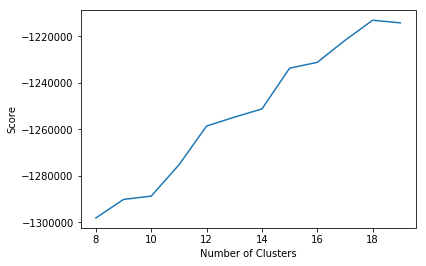

In [238]:
number_clusters = range(8, 20)
kmeans_list = []
for i in number_clusters:
    kmeans_list.append(KMeans(n_clusters=i)) # 서로 다른 KMeans 모형을 저장
scores = []
for i in range(len(kmeans_list)):
    scores.append(kmeans_list[i].fit(DTM_TF).score(DTM_TF))
    # score = - sum of sq
    # score indicates the variance explained by the clusters
pl.plot(number_clusters,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

In [239]:
vectorizer_tfidf, DTM_tfidf = tfidf_extractor(documents_filtered) 
DTM_TFIDF = np.array(DTM_tfidf.todense())


In [241]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=20, max_iter=10)
clusters = kmeans1.fit_predict(DTM_TFIDF) # KMeans 알고리즘으로 학습
clusters

array([ 9,  9,  9, ..., 11, 10, 16])

In [303]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clusters):
    cluster_nums.append(cluster_num)
    print(ids[doc_num], cluster_num)

0 9
1 9
2 9
3 9
4 14
5 9
6 0
7 0
8 0
9 9
10 9
11 10
12 9
13 0
14 9
15 9
16 9
17 9
18 6
19 9
20 0
21 14
22 9
23 9
24 0
25 0
26 9
27 10
28 9
29 9
30 9
31 0
32 9
33 9
34 0
35 9
36 0
37 9
38 9
39 9
40 9
41 0
42 3
43 14
44 9
45 9
46 9
47 9
48 9
49 9
50 9
51 9
52 10
53 9
54 9
55 3
56 9
57 3
58 9
59 9
60 9
61 9
62 0
63 9
64 9
65 0
66 9
67 9
68 0
69 9
70 0
71 9
72 9
73 0
74 0
75 9
76 9
77 9
78 9
79 9
80 10
81 0
82 9
83 9
84 9
85 9
86 0
87 0
88 0
89 0
90 0
91 9
92 0
93 9
94 0
95 0
97 9
98 0
99 9
100 9
101 0
102 9
103 0
104 0
106 9
107 0
108 0
109 0
110 14
111 14
112 0
113 3
114 0
115 9
116 9
117 0
118 9
119 9
120 9
121 0
122 9
123 9
124 9
125 0
126 14
127 9
128 9
129 0
130 0
131 9
132 9
133 9
134 9
135 0
136 9
137 0
138 9
139 9
140 9
141 9
142 14
143 9
144 7
145 9
146 7
147 9
148 7
149 9
150 0
151 9
152 9
153 7
154 11
155 7
156 9
157 7
158 9
159 10
160 7
161 9
162 9
163 9
164 9
165 9
166 0
167 9
168 9
169 9
170 9
171 7
172 9
173 9
174 9
175 3
176 9
177 15
178 8
179 9
180 15
181 9
182 9
183 9
18

1537 2
1538 10
1539 8
1540 2
1541 11
1542 11
1543 11
1544 8
1545 10
1546 10
1547 8
1548 11
1549 11
1550 11
1551 11
1552 15
1553 1
1554 8
1555 9
1556 10
1557 10
1558 12
1559 12
1560 3
1561 7
1562 11
1563 10
1564 12
1565 10
1566 10
1567 8
1568 12
1569 11
1570 3
1571 12
1572 8
1573 9
1574 9
1575 9
1576 12
1577 8
1578 10
1579 9
1580 9
1581 9
1582 3
1583 8
1584 9
1585 2
1586 3
1587 11
1588 9
1589 7
1590 8
1591 3
1592 3
1593 3
1594 2
1595 11
1596 9
1597 9
1598 3
1599 3
1600 9
1601 3
1602 11
1603 3
1604 2
1605 11
1606 2
1607 8
1608 3
1609 8
1610 3
1611 10
1612 9
1613 8
1614 9
1615 9
1616 3
1617 2
1618 11
1619 2
1620 10
1621 3
1622 3
1623 10
1624 9
1625 11
1626 11
1627 9
1628 11
1629 8
1630 13
1631 9
1632 11
1633 3
1634 2
1635 11
1636 9
1637 9
1638 11
1639 11
1640 9
1641 9
1642 2
1643 2
1644 9
1645 9
1646 11
1647 9
1648 8
1649 2
1650 1
1651 9
1652 9
1653 9
1654 9
1655 2
1656 9
1657 9
1658 9
1659 9
1660 9
1661 3
1662 9
1663 9
1664 9
1665 8
1666 9
1667 2
1668 3
1669 9
1670 9
1671 2
1672 2
1673 9

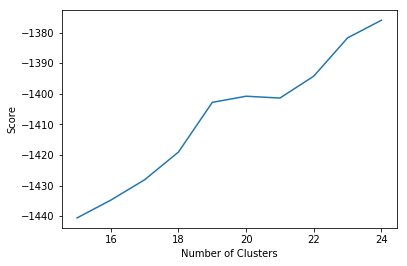

In [304]:
# tf-idf 가 문헌의 유니크한 정보를 더 잘 반영하므로..

number_clusters = range(15, 25)
kmeans_list = []
for i in number_clusters:
    kmeans_list.append(KMeans(n_clusters=i))
scores = []
for i in range(len(kmeans_list)):
    scores.append(kmeans_list[i].fit(DTM_TFIDF).score(DTM_TFIDF))
    # score = - sum of sq
    # score indicates the variance explained by the clusters
pl.plot(number_clusters,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

In [243]:
vectorizer_tfidf, DTM_tfidf = tfidf_extractor(documents_filtered) 

In [244]:
DTM_TFIDF = np.array(DTM_tfidf.todense())

In [385]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=5, max_iter=30)
clusters = kmeans1.fit_predict(DTM_TFIDF) # KMeans 알고리즘으로 학습
clusters

array([0, 0, 0, ..., 3, 1, 0])

In [628]:
kmeans2 = KMeans(n_clusters=20, max_iter=50)
clusters1 = kmeans2.fit_predict(DTM_TFIDF) # KMeans 알고리즘으로 학습
clusters1

array([10, 15, 18, ...,  4,  2, 17])

## 적절한 K값 찾기 - PCA

In [714]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

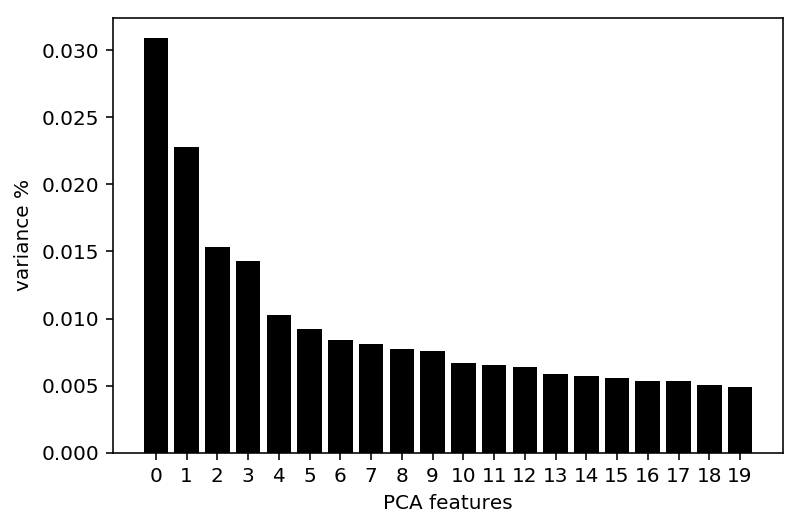

In [716]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(DTM_TFIDF)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

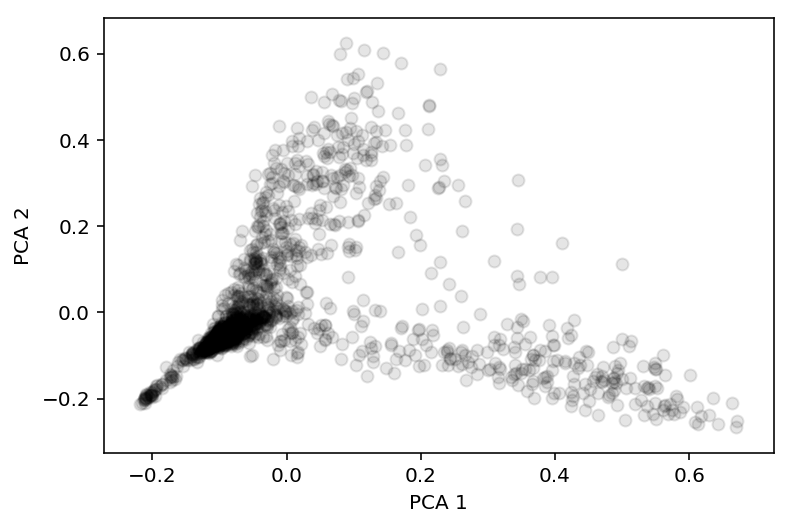

In [717]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

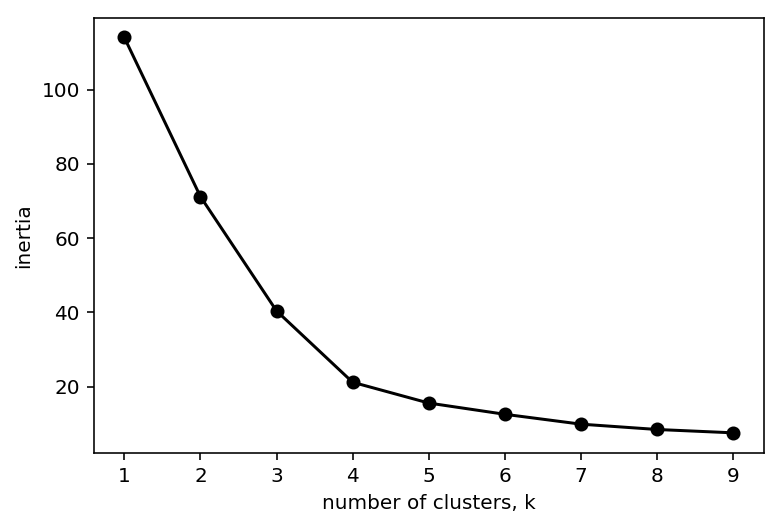

In [718]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [719]:
# import library for 3D plotting
from mpl_toolkits import mplot3d

# magic function for interactive plot
%matplotlib notebook

In [725]:
feature_df = pd.DataFrame(DTM_TFIDF)

In [726]:
import numpy as np
from sklearn.manifold import TSNE

# 2개의 차원으로 축소
transformed = TSNE(n_components=2).fit_transform(feature_df)
transformed.shape

(1713, 2)

In [729]:
%matplotlib inline

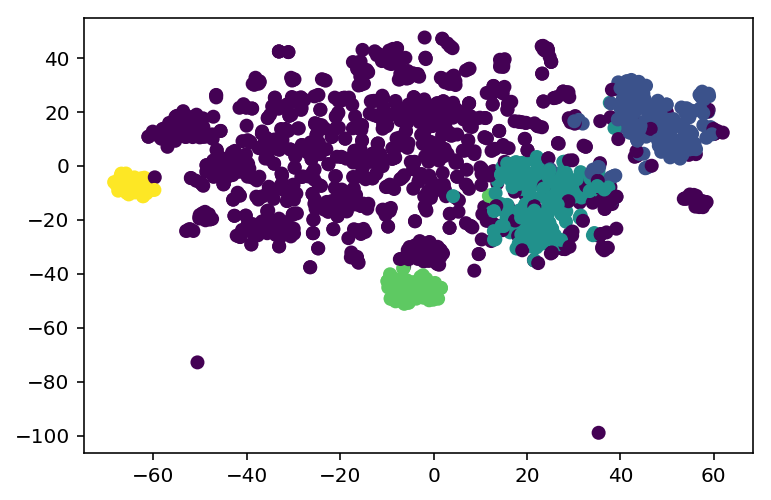

In [730]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=data['Kmesns_tfidf'])  #라벨은 색상으로 분류됨

plt.show()

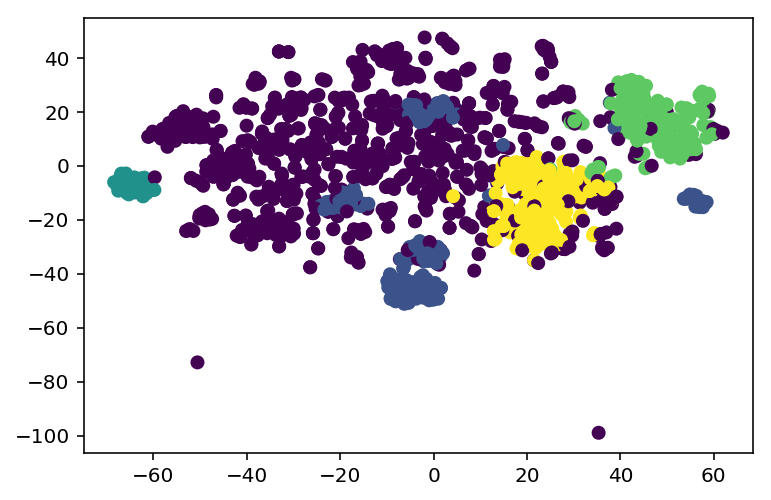

In [731]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=data['Kmeans'])  #라벨은 색상으로 분류됨

plt.show()

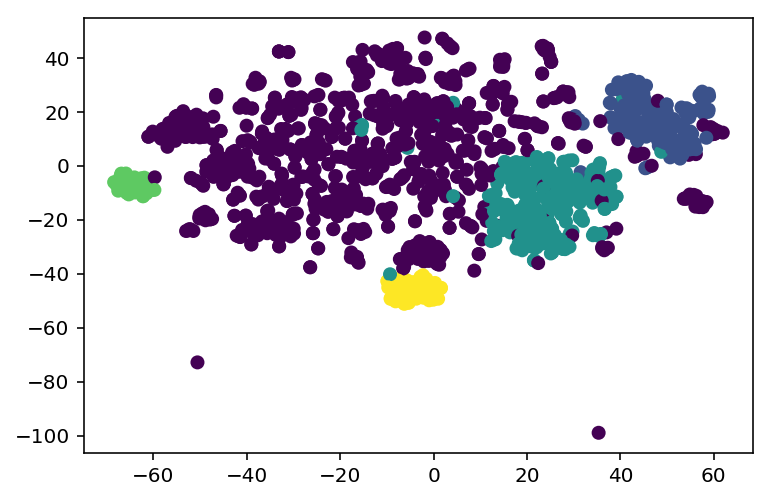

In [732]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=data['ward'])  #라벨은 색상으로 분류됨

plt.show()

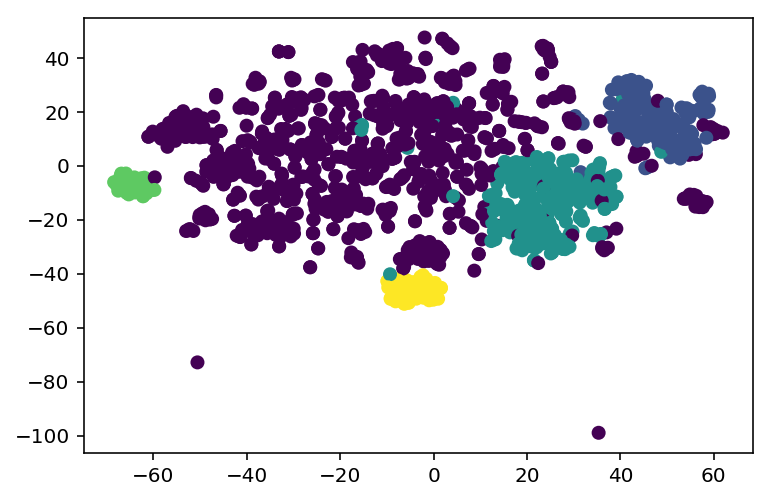

In [733]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=data['single'])  #라벨은 색상으로 분류됨

plt.show()

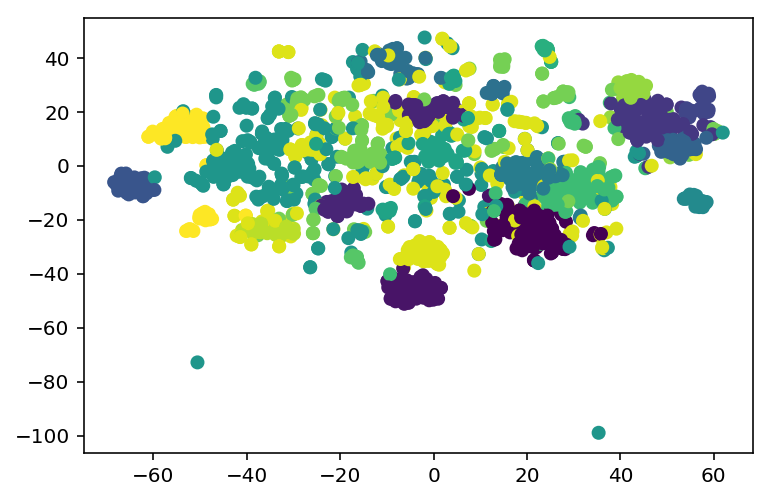

In [734]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=data['Kmeans_elbow'])  #라벨은 색상으로 분류됨

plt.show()

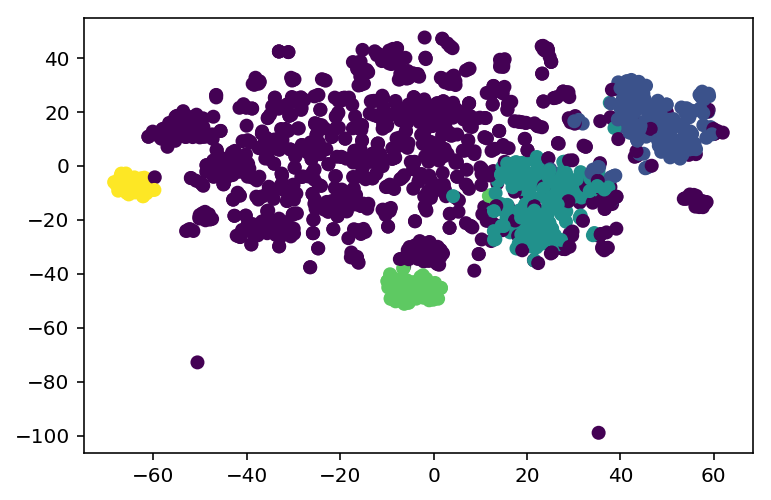

In [735]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=data['Kmeans_tfidf'])  #라벨은 색상으로 분류됨

plt.show()

In [736]:
# import library for 3D plotting
from mpl_toolkits import mplot3d

# magic function for interactive plot
%matplotlib notebook

IndexError: too many indices for array

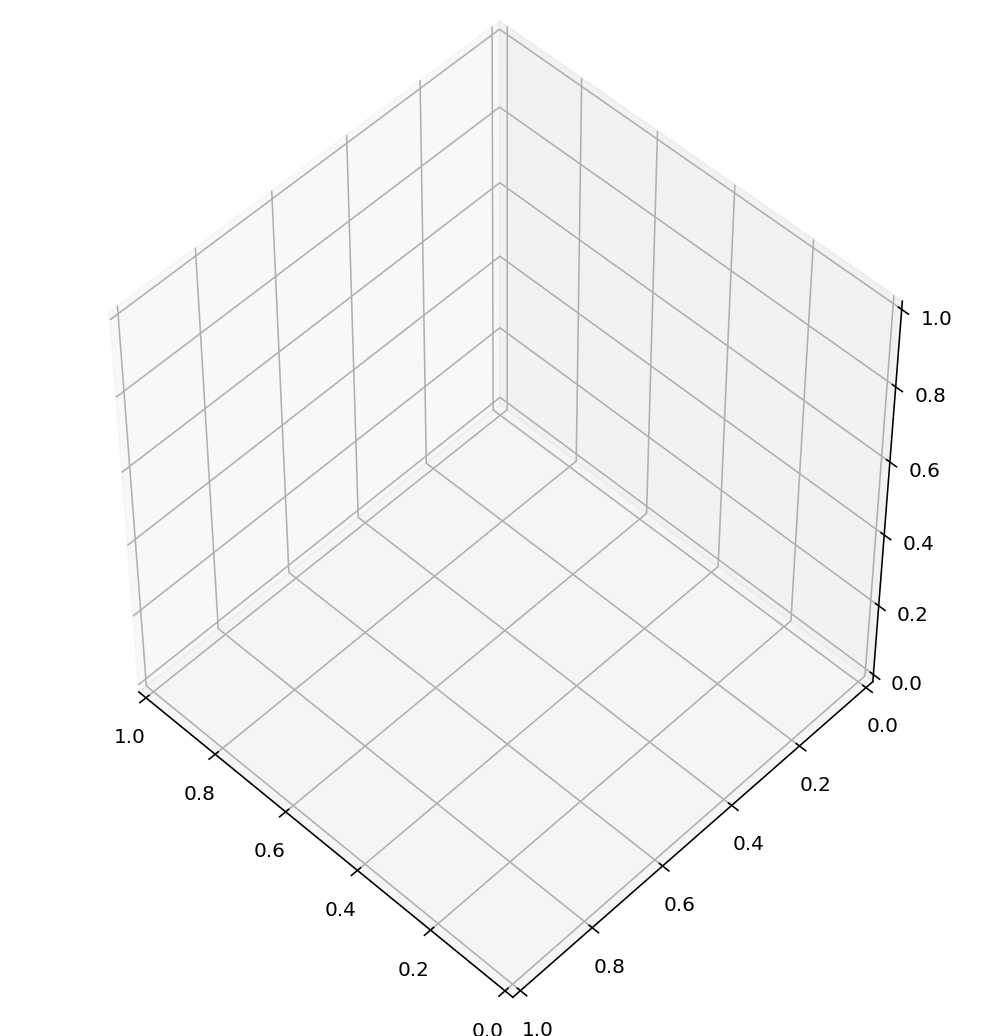

In [737]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

#KMeans
km = KMeans(n_clusters=4)
km.fit(DTM_TFIDF)
km.predict(DTM_TFIDF)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("0")
ax.set_ylabel("1")
ax.set_zlabel("2")
plt.title("K Means", fontsize=14)

## K-Means (tf-idf), k=5

In [671]:
kmeans3 = KMeans(n_clusters=5, max_iter=50)
clusters2 = kmeans3.fit_predict(DTM_TFIDF) # KMeans 알고리즘으로 학습
clusters2

array([0, 0, 0, ..., 1, 0, 0])

In [683]:
data['Kmeans_tfidf'] = clusters2

In [684]:
data[data['Kmeans_tfidf']==0] # 각종 사건 사고

0                                               1  \
0        0                \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1        1          \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2        2        \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3        3       \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
5        5        \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
9        9         \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10      10            \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11      11         \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12      12                     \n기억해야 할 김복동 할머니의 마지막 8개월\n   
14      14                         \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15      15          \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16      16       \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17      17         \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18      18                \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19      19      \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
22      22             \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23      23      \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
26      26                \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27      27       \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28      28       \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29      29    \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
30      30                    \n"러시아 화물선은 왜 광안대교로 돌진했나?"\n   
32      32         \n“성추행 때문에 여성 노숙인 다 숨어버려” 기댈 곳 없는 그들 \n   
33      33           \n봄이 왔지만 초미세먼지에 황사까지…최악 대기 당분간 계속될듯\n   
35      35           \n부산해경, 광안대교 충돌 러시아 화물선 선장 구속영장 신청 \n   
37      37   \n[아무튼, 주말] "한달 왕복에 300만원이 말이 되나" 통행료 가장 비…\n   
38      38       \n철썩같이 믿었는데… 여친 父 “본 적도 없는데, 돈 준 게 미친X”\n   
39      39                \n“당신은 날 죽일 수 없다” 대한항공 박창진 인터뷰\n   
40      40               \n[날씨] 오늘도 공기 탁해…오늘 밤 차츰 제주부터 비\n   
42      42            \n19살 차 국제결혼 부부 7년 만에 파경…책임은 누구에게?\n   
...    ...                                             ...   
1668  1675                \nA형 간염 예방접종 "비싸서 포기?"…가격 얼마기에\n   
1669  1676           \n“1000원 갑질, 안가요!” 대천항 수산시장 불매운동 활활\n   
1670  1677             \n저수지서 발견된 여중생 시신···범인은 30대 의붓아버지\n   
1671  1678  \n퇴직금 요구한 60대女의 갑질 폭로 "1000원권 7000장 직접 세서 가…\n   
1672  1679     \n [단독] “유명 정신과 의사에게 ‘그루밍 성폭력’당했다” 피해자 영…\n   
1673  1680            \nA형 간염 공포 확산…3040 "부부끼리도 다른 그릇 써"\n   
1674  1681        \n[르포]"고래 싸움에 새우 등 터진 격"…녹지병원 직원들 '한숨'\n   
1675  1682           \n"1등은 실력, 모함"…숙명여고 쌍둥이는 왜 법정서 당당할까\n   
1676  1683           \n[영상] '케어' 박소연 "구속 두렵지 않다…안락사 불가피"\n   
1677  1684           \n성추행 문제로 말다툼하다가… 차에서 의붓딸 죽인 30대 아빠\n   
1679  1686  \n[왱] ‘반드시 터진다는’ 백두산 화산 폭발 뒤 한반도(2019년 연구) …\n   
1680  1687                  \n박소연 “제가 구속돼도 동물들에게는 좋은 결과”\n   
1681  1688                 \n방치해선 안될 그들…`외톨이` 40대 무직 미혼남\n   
1682  1689       \n"친부모에 성추행 알려서"…중학생 의붓딸 살해·유기한 30대(종합)\n   
1685  1692       \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1686  1693       \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1689  1696              \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1692  1699           \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1694  1701      \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1695  1702           \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1699  1706             \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1700  1707            \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1703  1710       \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1704  1711     \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1705  1712           \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1706  1713               \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1708  1715                    \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1709  1716            \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1711  1718                 \n잔혹한 의부·비정한 친모…시신이 되어 버려진 아이\n   
1712  1719              \n군포 제비표페인트 공장서 화재 발생…"대응3단계 발령"\n   

                                                      2  \
0     https://news.naver.com/main/ranking/read.nhn?r...   
1     https://news.naver.com/main/ranking/read

In [685]:
data[data['Kmeans_tfidf']==1] # 마약

0                                              1  \
43      43          \n버닝썬 '애나' 마약 검사결과 일부 회신…경찰 "곧 재소환"\n   
124    126        \n경찰, '마약류 투약 의혹' 버닝썬 이문호 대표 이틀 연속 조사\n   
152    154  \n[2019 서울 마약지도] 서울 5개구 중 1곳 '마약 오염'···외국인…\n   
528    531            \n'마약혐의' 버닝썬 이문호 대표 영장 기각…"다툼 여지"\n   
532    535      \n[단독] 아니나 다를까 애나 '양성'…서울 속 중국인 '마약타운'?\n   
533    536       \n'마약 혐의' 이문호, 1시간 구속 심문…오늘 밤 결정(종합2보)\n   
535    538       \n버닝썬 수사 시작부터 난관···마약유통 의혹 이문호 대표 영장 …\n   
542    545              \n이문호 버닝썬 대표, 구속 기각…향후 수사 차질 빚나\n   
547    550                 \n버닝썬 애나는 누구? 김상교씨 '성추행 신고자'\n   
551    554      \n버닝썬 MD 애나, 마약 양성 반응…그러나 유통 혐의는 부인(종합)\n   
688    691       \n버닝썬 애나가 중국 돌아가지 않는 이유… 中, 마약사범 최대 사형\n   
690    693             \n경찰, `마약과의 전쟁` 한 달…마약사범 523명 검거\n   
850    853      \n은밀하게 번지는 덫, 오늘도 누군가… 파멸의 늪에 빠진다 [심층기…\n   
877    880            \n'남양유업 외손녀' 황하나, 마약 의혹에도 조사 안 받아\n   
923    926     \n'마약 투약 의혹' 황하나, 계속되는 논란에도 난데없이 '김치 홍보'\n   
927    930         \n[단독] '황하나 마약 투약' 진술 있는데도…번번이 영장 반려\n   
944    947    \n“몽롱하다 몽롱해” 황하나, ‘마약 투약’ 영상…봐주기 수사 의혹도(…\n   
952    955     \n“야, 장난하냐? 우리 아빠 경찰청장과 ‘베프’야” 황하나 추정 음성\n   
962    965            \n경찰, 남양유업 창업주 외손녀 황하나 ‘마약 혐의’ 체포\n   
968    971           \nSNS셀럽의 추락…황하나 주황색 후드티로 얼굴 가린채 압송\n   
976    980           \n슬리퍼 차림의 황하나 "포토라인 싫다"···질문엔 묵묵부답\n   
978    982           \n'남양유업 외손녀' 황하나 체포 단독 영상…마약 검사 거부\n   
993    997           \n[단독] 황하나, 의사 처방전 없이 향정신성 의약품도 복용\n   
995    999      \n[속보]황하나, '마약 혐의' 일부 인정…이르면 오늘 구속영장 신청\n   
997   1001              \n‘SNS 스타’ 대기업 외손녀 마약범죄 연루로 몰락 \n   
1002  1006              \n'환자복 차림'으로 체포된 황하나, 모발 제출은 거부\n   
1020  1024      \n황하나 가족 쇼핑몰, 마약 혐의 체포에도 버젓이 김치 팔면서 비난…\n   
1026  1030      \n황하나 무혐의한 검·경 "재벌가 손녀딸에 대마흡입건도 알아" 증언…\n   
1037  1041             \n[단독] "연예인 친구 권유로 다시 마약"…황하나 구속\n   
1043  1047        \n황하나 구속영장 신청, 박유천·버닝썬과 연결고리… 그녀는 누구?\n   
...    ...                                            ...   
1612  1619              \n범죄심리학과 교수 “박유천, 기자회견을 한 이유가…”\n   
1618  1625        \n[영상] 당당하게 법원 들어갔다가 포승줄에 묶인 채 나온 박유천\n   
1619  1626          \n박유천 태도가 영향? 반나절도 안 돼 구속 결정 내려진 이유\n   
1621  1628           \n구속 다투는 순간도 '마약 부인'…박유천-황하나 대질 방침\n   
1625  1632                  \n태도가 영향? 박유천, 초범인데도 구속된 이유\n   
1627  1634            \n[사사건건] 포승줄 묶인 박유천 결국 구속…"도주 우려"\n   
1631  1638                  \n'모르쇠'에 증거 인멸...박유천 구속 자충수\n   
1632  1639         \n같은 마약 투약 혐의에도… 할리 ‘불구속’ㆍ박유천 ‘구속’ 왜\n   
1635  1642               \n초범인데도 구속된 박유천…'모르쇠' 전략 자충수됐다\n   
1636  1643       \n‘마약양성’ 박유천, 구속 후 첫 조사서 “마약 안했다” 또 부인\n   
1639  1646       \n[문득 궁금] 박유천, 소변은 통과했지만 다리털에 덜미잡힌 이유는\n   
1642  1649             \n박유천 구속 후 첫 경찰 조사…황하나와 또다시 진실게임\n   
1648  1655         \n마약 혐의 박유천, 구속 후 첫 조사서 혐의 거듭 부인(종합)\n   
1660  1667     \n박유천 "나 자신 내려놓기 두려웠다"…19일만에 마약투약 인정(종합…\n   
1664  1671          \n박유천 "나 자신 내려놓기 두려웠다"…마침내 마약 투약 인정\n   
1665  1672       \n마약이 자기 노력 ‘물거품’ 만든다더니…박유천 “인정할 건 인정”\n   
1678  1685            \n박유천 “나 자신을 내려놓기 두려웠다”… 마약 투약 인정\n   
1683  1690         \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1684  1691     \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1687  1694           \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1688  1695      \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1690  1697        \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1691  1698               \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1693  1700            \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1696  1703            \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1697  1704      \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1698  1705                  \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1701  1708           \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1702  1709       \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1710  1717      \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   

                                                      2  \
43    https://news.naver.com/main/ranking/read.nhn?r...   
124   https://news.naver.com/main/ranking/read.nhn?r...   
152   https://news.naver.com/main/ranking/read.nh

In [686]:
data[data['Kmeans_tfidf']==2] #승리, 버닝썬

0                                              1  \
4        4    \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
21      21                \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
108    110    \n버닝썬 마약 투약·유통 10여명 입건…'승리 카톡' 확인 못 해(종합…\n   
109    111     \n마약한 놈, 청탁한 놈, 폭행한 놈…악역만 넘치는 ‘아수라장’ 버닝…\n   
140    142        \n승리 성접대 했나 안했나... 경찰 "카톡 일부 확보해 분석중"\n   
195    197               \n경찰, '승리 카톡' 뒤늦게 입수 "현재 분석 중"\n   
226    228        \n[단독] 경찰, '버닝썬 VIP룸' 영상 몰래 촬영·유포자 구속\n   
250    252          \n'버닝썬' 탈세 꾀했는지도 수사…"승리, 25일 현역 입대"\n   
257    259    \n빅뱅 승리 '성매매 알선' 혐의 입건…마약류 검사는 '음성'(종합2보…\n   
263    265             \n빅뱅 승리 '성매매 알선' 혐의 입건…피의자 신분 전환\n   
270    272         \n빅뱅 승리 '성매매 알선' 혐의 입건…피의자 신분 전환(종합)\n   
275    277                \n경찰, '승리 성접대 의혹' 클럽 아레나 압수수색\n   
279    281       \n[단독] 정준영, 불법 촬영 후 카톡방에 전송…피해자 최소 10명\n   
280    282          \n승리, 은퇴 선언…"나 하나 살자고 주변 피해" [공식입장]\n   
283    285         \n"승리 '성접대 의혹' 카톡방에 연예인 여러명"…일부 경찰소환\n   
286    288          \n정준영 몰카 카톡방 공개되자 용준형 SNS "오빠 아니죠?"\n   
292    294       \n"정준영, 룸살롱 여성 불법 촬영 영상 유포…피해자만 10여 명"\n   
293    295         \n승리 카톡방 연예인은 정준영..."희희낙락 '몰카', 충격적"\n   
294    296            \n[단독] 승리 성 접대 카톡, 동료연예인 휴대전화서 유출\n   
297    299     \n'승리 성매매 알선' 카톡방 연예인 조사…"어떤 대화 오갔나"(종합)\n   
298    300        \n"1박2일 정준영 성관계 몰카, 피해여성 10여명" SBS 보도\n   
301    303          \n'승리 카톡' 수사 연예계로 확대 조짐…유명가수 소환(종합)\n   
307    309           \n승리 정식 입건… 경찰, ‘버닝썬’ 이어 ‘아레나’ 정조준\n   
309    311            \n'성관계 몰카' 정준영 성폭력처벌법 위반 입건…오늘 귀국\n   
310    312        \n“비밀 지켜달라” 피해 여성 부탁받은 정준영이 단톡방에서 한 말\n   
311    313   \n[전문] '몰카 논란' 정준영 측 “모든 일정 중단, 즉시 귀국… 수사…\n   
313    315       \n[단독 풀영상] 수면제 먹이고 '동영상' 자랑…추악한 그들의 대화\n   
315    317       \n승리 '성접대'·정준영 '몰카'…'버닝썬' 불길, 연예계로도 확산\n   
319    321        \n[단독] 수면제 먹이고 "우린 구속감"…정준영 단톡방 추가 공개\n   
321    323       \n정준영-승리, 카톡방에 성관계 영상 공유…조만간 경찰 소환(종합)\n   
...    ...                                            ...   
1246  1251                   \n승리 `필리핀 섹스 생일파티` 진상 드러나나\n   
1247  1252          \n“수면제 먹여…ㅋㅋㅋ” ‘정준영 카톡방’에 넘쳐난 여성 혐오\n   
1250  1255             \n유흥업소 여성 "필리핀 승리 생일파티에서 성관계" 진술\n   
1253  1258    \n"승리 필리핀 생일파티 때 성관계 있었다"...유흥업소 여직원 경찰 …\n   
1261  1266             \n유흥업소 여성 “승리 필리핀 생일파티서 성관계 있었다”\n   
1262  1267           \n투자자 초대 승리 생일파티서 "성관계"…유흥업소 여성 진술\n   
1269  1274       \n'승리 생일파티' 유흥업소 여성과 남성간 성관계…그날밤 필리핀에…\n   
1272  1277     \n"각자 계산했다"더니…윤 총경 골프접대 4번, 모두 승리 파트너가 …\n   
1273  1278     \n경찰, 승리가 성매매 여성에 돈 보낸 증거 확보… "조만간 영장 신…\n   
1284  1289          \n"윤총경 골프접대 2번더…승리 팔라완 성접대 확인중"(종합)\n   
1293  1298    \n“정준영 단톡방 총체적 난국” ‘승리 카톡방’ 보도한 기자 “참담한 …\n   
1362  1368             \n“정준영·최종훈 등이 집단성폭행…녹취파일·사진도 있어”\n   
1367  1373          \n “정준영 일행에 집단 성폭행 당해” 첫 피해 주장 나왔다 \n   
1388  1394    \nA씨 "정준영·최종훈 등에게 성폭행 당했다" vs 최종훈 "동석한 건…\n   
1392  1398         \n“정준영 등이 집단 성폭행, 고소 예정”…첫 피해 여성 나타나\n   
1396  1402         \n“어제 종훈이랑…” 집단성폭행 의혹 불거진 정준영 단톡방 발언\n   
1398  1404      \n경찰, 정준영 단톡방서 '집단 성폭행' 정황 포착…음성·사진파일 …\n   
1402  1408          \n정준영 단톡방 '집단 성폭행' 정황 "알찬 1박2일 보내자"\n   
1405  1411         \n정준영 단톡방서 ‘집단 성폭행’ 정황…“우리 이번엔 원정이다”\n   
1417  1423          \n[단독] "승리 일행과 술 마시다 성폭행…때려도 못 일어나"\n   
1528  1535    \n승리, 성매매 알선 정황 포착…"강남 고급 주점서 300명 초대해 파…\n   
1546  1553            \n[단독]승리·정준영·최종훈 우정여행? 사실 범죄여행이었다\n   
1551  1558      \n“유인석, 성접대 시인…호텔비 3000만원은 승리가 YG카드로 내”\n   
1552  1559    \n[단독] "승리 동업자, 성접대 시인… 호텔비는 승리가 YG카드로 내…\n   
1557  1564  \n유인석 "성접대 인정, 결제는 YG 카드로" vs 승리 "호텔비만 냈고 …\n   
1561  1568     \n경찰, '승리 성접대' 사실상 확인…성매매여성 등 17명 입건(종합)\n   
1564  1571    \n승리 일행, 성 접대 혐의 첫 시인…“호텔비, 승리가 YG카드로 결제…\n   
1569  1576          \n[버닝썬] '농담'이라더니 결국 인정…"이제 승리만 남았다"\n   
1643  1650                   \n"집단 성폭행까지"...끝없는 아이돌의 타락\n   
1707  1714                   \n"승리, 이번 주 구속영장"…YG 수사 확대\n   

                                                      2  \
4     https://news.naver.com/main/ranking/read.nhn?r...   
21    https://news.naver.com/main/ranking/read.nhn?r...   
108   https://news.naver.com/main/ranking/read.nh

In [687]:
data[data['Kmeans_tfidf']==3] # 김학의, 성접대

0                                              1  \
191    193   \n[단독] “‘별장 성접대’ 김학의 임명 강행, 배후에 최순실” 진술 확…\n   
368    371              \n‘그날의 진실’은?…‘별장 성접대’ 피해 여성의 절규\n   
386    389     \n대검 '성접대 의혹' 김학의 前차관 내일 소환…출석 불투명(종합2보…\n   
395    398                \n윤지오 "장자연 단순자살 아냐…공소시효 연장해야"\n   
402    405              \n'성접대 의혹' 김학의 조사 무산…진상규명 좌초 위기\n   
410    413            \n'성접대 의혹' 김학의, 오늘 6년만에 소환…출석 미지수\n   
415    418     \n“수시로 성폭행하며 촬영” 김학의 ‘별장 성접대’ 수사 상황(영상) \n   
418    421          \n“너무 난잡해서” 오열해버린 김학의 피해여성 인터뷰(영상) \n   
433    436               \n2주 뒤면 조사 끝난다고?…"증거 봇물…재수사하라"\n   
444    447         \n갈수록 불어나는 '김학의 별장 성접대' 의혹…재수사 요구 커져\n   
450    453    \n[취재파일] 김학의 前 차관 성 접대 의혹과 동영상, 그리고 정확한 …\n   
457    460             \n'육안 확인' 가능한데...'2차례 무혐의' 의혹 증폭\n   
464    467            \n김학의·장자연 의혹 커지는데…검찰과거사위 연장 왜 어렵나\n   
474    477         \n김학의 ‘별장 성접대’ 의혹 여전한데…진상조사단 활동 연장은?\n   
490    493       \n장자연ㆍ김학의 사건, 진실ㆍ단죄의 문 앞에 공소시효ㆍ증거능력 ‘…\n   
499    502          \n김학의·장자연 사건…검찰과거사위 활동 두달 추가 연장(종합)\n   
503    506         \n정준영 카톡 쥐자 김학의 영상 꺼내… 아킬레스건 맞겨눈 검·경\n   
508    511            \n김학의 ‘특수강간’ 무혐의 이유 보니…피해자답지 않아서?\n   
514    517           \n'특수강간 의혹' 김학의 사건, 권력형 비리사건으로 번지나\n   
519    522      \n"버닝썬·김학의·장자연 특권층 유착"…사법당국 '강력수사' 천명(…\n   
521    524    \n[인터뷰] 김영희 변호사 “‘별장 성접대’·장자연 사건 의도적 ‘암장…\n   
522    525       \n 김학의·장자연 사건 ‘재수사’ 가닥…외압·은폐 의혹까지 겨눈다 \n   
530    533            \n'강제수사권' 칼 빼든 정부…김학의·장자연 사건 새 국면\n   
557    560          \n'버닝썬·김학의·장자연 사건' 특권층 민낯…유착 규명이 초점\n   
569    572              \n출국금지도 안 돼…자취 감춘 김학의, 조사 가능할까?\n   
577    580               \n“김학의 부실 수사는 네 탓” 뒤늦게 치고받는 검경\n   
580    583             \n성 접대 정황 명백한데…김학의 '뇌물 혐의' 왜 배제?\n   
584    587           \n수색도 체포도 거부… 檢 ‘김학의 수사’ 틈만 나면 뭉갰다\n   
618    621         \n [단독] 김학의 한밤중 타이로 출국하려다가 ‘긴급출국금지’ \n   
626    629                 \n김학의측 "해외도피 의사 없었다…왕복티켓 끊어"\n   
...    ...                                            ...   
842    845         \n[단독] 유출 '김학의 동영상', 피해女·해결사가 갖고 있었다\n   
853    856          \n'김학의 성폭력 의혹' 변수 돌출…진상조사, 뇌물규명에 중점\n   
910    913          \n"고소하고 고소해도"…수사팀이 주목한 '윤중천 3번 무혐의'\n   
936    939            \n경찰청장 "김학의 임명 전 범죄 첩보 靑에 수차례 보고"\n   
945    948     \n김학의 처벌 옥죄는 윤중천의 ‘입’… 첫 강제수사, 뇌물 혐의부터 …\n   
991    995    \n“김학의 차관 내정 발표날, 청와대 들어가 동영상 ‘진짜 같다’ 보고…\n   
1014  1018     \n김학의 비행기 표 끊기 전 출금 조회한 법무관 2명 검찰 수사 받는…\n   
1046  1050         \n'김학의 동영상' 실제로 봤더니... '내부자들'은 현실이었다\n   
1075  1079                 \n'김학의 인천공항 발견' 이틀 전, 무슨 일이?\n   
1103  1108         \n6년 전 김학의 성폭력의 반전···녹음파일 100건이 쏟아졌다\n   
1125  1130            \n김학의, 반격 나섰다…성폭행 피해주장 여성 무고혐의 고소\n   
1140  1145             \n[단독]“윤중천, 김학의에 ‘성적 행동 사진’ 보냈다”\n   
1186  1191          \n김학의 동영상 고화질 원본 공개 보도, 김학의 “법적 조치”\n   
1187  1192        \n[단독] YTN '고화질 원본' 최초 입수...김학의 얼굴 뚜렷\n   
1195  1200             \n 김학의, YTN 고화질 동영상 공개에 “법적 조치” \n   
1197  1202    \n김학의 동영상 원본 공개…"성접대 동원 여성 24명 중 5명과 성관계…\n   
1200  1205  \n[단독] '김학의 동영상' 고화질 원본 보니..."여성 24명 성범죄 동…\n   
1208  1213     \n'김학의 동영상' 고화질 원본 공개… 김학의 측 "명예훼손 법적 조…\n   
1218  1223                    \n김학의 동영상 입수해 공개한 기자가 한 말\n   
1222  1227                    \n"영상 전혀 모른다"는 김학의...사실은?\n   
1231  1236           \n"국과수는 '김학의 저화질 영상'만 봤다…고화질은 못 봐"\n   
1238  1243   \n발등에 불 떨어진 경찰.. 2013년 원본 '김학의 동영상‘ 찾기 위하여\n   
1271  1276                 \n"동영상 속 여성 접니다"…피해자 스스로 검찰에\n   
1288  1293        \n"내가 김학의 동영상 속 피해자"...피해 여성, 檢 자진 출석\n   
1305  1310          \n윤중천 “동영상 속 인물, 김학의냐 묻자 '비슷하다' 진술”\n   
1307  1312    \n윤중천, MBC 인터뷰서 "성접대 동영상 남성, 김학의 비슷하다" 시…\n   
1377  1383           \n경찰, '김학의 압수수색' 부글부글…"우린 피해자인데 왜"\n   
1476  1482     \n[단독] 난관 맞은 김학의 수사… 병원장 2명 등 원주별장 멤버 추적\n   
1501  1507                  \n'동영상' 또 나왔다…성범죄 의혹 수사 급진전\n   
1523  1530                 \n"새로운 동영상 또 나왔다"…성범죄 수사 급물살\n   

                                                      2  \
191   https://news.naver.com/main/ranking/read.nhn?r...   
368   https://news.naver.com/main/ranking/read.nhn?r...   
386   https://news.naver.com/main/ranking/read.nh

In [688]:
data[data['Kmeans_tfidf']==4] # 한유총, 유치원

0                                             1  \
6      6   \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7      7           \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8      8      \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
13    13           \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
20    20      \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
24    24   \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25    25             \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
31    31  \n'개학 연기' 유치원 전국 190곳…정부 "철회 안할땐 엄정 대응"(종…\n   
34    34                        \n한유총은 왜?…"유치원은 치킨집"\n   
36    36        \n이총리 "유치원 개학 연기 즉각 철회해야…강행하면 엄정 대처"\n   
41    41    \n서울·경기·인천 1864개 사립유치원 중 83곳만 개학연기…'노코멘…\n   
62    62           \n유치원 도대체 몇 곳이 개원 안 하나…"내일 돼야 파악"\n   
65    65      \n개학연기 '1천533곳 vs 190곳' 대혼란…원아·학부모만 피해\n   
68    68          \n한유총 "폐원 투쟁도 검토…개학연기 사립유치원 1533곳"\n   
70    70        \n수도권교육감 "'개학연기' 한유총과 대화 없다…법인설립 취소"\n   
73    73     \n유치원 개학 D-1…교육당국·한유총 잇단 기자회견 등 급박한 움직…\n   
74    74              \n유치원 개학연기 문자 받았다면? 긴급돌봄 신청하세요\n   
81    81           \n'보육대란' 벌어지나…교육당국-한유총 대립 속 우려 커져\n   
86    86            \n개학연기 강행방침 '보육대란' 비상…학부모들 당혹·분노\n   
87    87     \n"언제 또 돌발 휴원할지 불안불안…더 이상 사립유치원 믿을수 없어…\n   
88    88           \n전국 사립유치원 365곳 '개학연기' 방침…서울은 21곳\n   
89    89          \n한유총 오늘부터 '무기한 개학연기'…정부 긴급돌봄체계 가동\n   
90    90       \n한유총 "개학연기 무조건 철회…내일부터 유치원 정상운영"(종합)\n   
92    92           \n한유총 유치원 개학연기 강행…보육대란 없었지만 불편 속출\n   
94    94        \n서울교육청 '개학연기 강행' 한유총 설립허가 취소 결정(종합)\n   
95    95         \n교육당국, 한유총 설립허가 취소 예정대로…공정위 신고도 추진\n   
97    98       \n한유총 "개학연기 무조건 철회…내일부터 유치원 정상운영"(2보)\n   
100  101       \n“반차를 언제까지 내야 할지” 개학연기 첫 날 당혹스런 학부모들\n   
102  103              \n여론 뭇매에 한유총 개학연기 철회…"설립허가 취소"\n   
103  104             \n정부 무관용 원칙에 일부 유치원 개학연기 철회(종합)\n   
105  107         \n유은혜 부총리 "유치원 학부모 볼모로 잡는 관행 바로잡겠다"\n   
106  108                \n고립무원 한유총, 실리·명분 다잃고 ‘백기투항’\n   
107  109       \n유치원 '개학연기' 전국 동시다발 수사하나…검찰 법리검토(종합)\n   
110  112            \n한유총 개학 연기 언제까지 가능한가…6월10일 마지노선\n   
112  114           \n유은혜 "유치원 개학 연기는 불법, 지금이라도 철회하라"\n   
115  117               \n부메랑된 '개학 연기'…결국 '허가 취소' 내몰려\n   
119  121         \n실패 예견된 '개학연기 투쟁'…한유총 이사장도 지침 안 지켜\n   
123  125         \n“새벽에 잠 덜 깬 쌍둥이 태우고 시댁 가는데 눈물이 왈칵”\n   
127  129            \n"하루 개학 연기도 잘못"…학부모단체, 한유총 고발한다\n   
128  130         \n개학연기 사립유치원 '0'…'에듀파인 의무화' 참여율 59%\n   
133  135         \n조희연 "한유총 교육자로서 초심 잃어, 법인 설립허가 취소"\n   
135  137     \n조희연 "한유총 교육자로서 초심 잃어, 법인 설립허가 취소"(종합)\n   
148  150              \n한유총이 시설사용료와 폐원 조건에 집착하는 이유는?\n   
164  166      \n'한유총' 개학 연기 사태 막전막후…급박했던 엿새 어떻게 돌아갔나\n   
182  184                  \n뚝딱 확충 힘든데… 인기 치솟는 국공립유치원\n   
200  202       \n'한유총 백기' 나흘만에…대형유치원 에듀파인 참여율 55→83%\n   
208  210             \n국공립 '로또'라면서도…가 보면 '텅텅' 빈자리 왜?\n   
242  244            \n아빠·엄마가 유치원 원장님…"月 20만 원에 양질교육"\n   
295  297        \n이덕선 한유총 이사장, '개학연기' 사태 일주일 만에 "사임"\n   
337  339   \n[단독]“학부모 똥줄 타게 해야 승리” 그들은 엄마들을 ‘이용’만 했…\n   
451  454   \n'개학연기 투쟁' 11일만에 … 대형 사립유치원 에듀파인 100% 도입\n   

                                                     2  \
6    https://news.naver.com/main/ranking/read.nhn?r...   
7    https://news.naver.com/main/ranking/read.nhn?r...   
8    https://news.naver.com/main/ranking/read.nhn?r...   
13   https://news.naver.com/main/ranking/read.nhn?r...   
20   https://news.naver.com/main/ranking/read.nhn?r...   
24   https://news.naver.com/main/ranking/read.nhn?r...   
25   https://news.naver.com/main/ranking/read.nhn?r...   
31   https://news.naver.com/main/ranking/read.nhn?r...   
34   https://news.naver.com/main/ranking/read.nhn?r...   
36   https://news.naver.com/main/ranking/read.nhn?r...   
41   https://news.naver.com/main/ranking/read.nhn?r...   
62   https://news.naver.com/main/ranking/read.nhn?r...   
65   https://news.naver.com/main/ranking/read.nhn?r...   
68   https://news.naver.com/main/ranking/read.nhn?r...   
70   https://news.naver.com/main/ranking/read.nhn?r...   
73   https://news.naver.com/main/ranking/read.nhn?r...   
74  

In [629]:
data['Kmeans_elbow'] = clusters1

In [630]:
clusters1

array([10, 15, 18, ...,  4,  2, 17])

In [386]:
data['Kmeans'] = clusters

In [345]:
data = pd.DataFrame(df2)

In [670]:
data[data['Kmeans_elbow']==13]

0                                             1  \
4        4   \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
21      21               \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
43      43         \n버닝썬 '애나' 마약 검사결과 일부 회신…경찰 "곧 재소환"\n   
61      61         \n'마약 구속' 버닝썬 직원, 강남 일대서 '성형브로커' 활동\n   
108    110   \n버닝썬 마약 투약·유통 10여명 입건…'승리 카톡' 확인 못 해(종합…\n   
109    111    \n마약한 놈, 청탁한 놈, 폭행한 놈…악역만 넘치는 ‘아수라장’ 버닝…\n   
124    126       \n경찰, '마약류 투약 의혹' 버닝썬 이문호 대표 이틀 연속 조사\n   
140    142       \n승리 성접대 했나 안했나... 경찰 "카톡 일부 확보해 분석중"\n   
195    197              \n경찰, '승리 카톡' 뒤늦게 입수 "현재 분석 중"\n   
204    206         \n은밀한 공간, 버닝썬VIP룸···"여자 비명 나도 신경안써"\n   
226    228       \n[단독] 경찰, '버닝썬 VIP룸' 영상 몰래 촬영·유포자 구속\n   
250    252         \n'버닝썬' 탈세 꾀했는지도 수사…"승리, 25일 현역 입대"\n   
315    317      \n승리 '성접대'·정준영 '몰카'…'버닝썬' 불길, 연예계로도 확산\n   
324    326        \n[단독] 미제라던 '아레나 폭행'…재수사 2주만에 가해자 색출\n   
328    330            \n폭행-마약-성접대-몰카 줄줄이…'버닝썬' 불길 어디까지\n   
339    341        \n승리카톡 거론 고위직 의혹에…강신명 前 청장 "일면식도 없다"\n   
344    346      \n경찰 "승리 단톡방에 '경찰총장이 뒤봐준다' 언급"…내사중(상보)\n   
346    348    \n승리 카톡방 '경찰총장이 뒤봐준다'…강신명 "일면식 없어"(종합2보…\n   
348    350        \n“클럽 MD들 여성 고객과 성관계 인증샷 올리는 단톡방 있다”\n   
360    363  \n[단독] "음주운전 보도 막아달라"...경찰, FT아일랜드 최종훈 유착…\n   
361    364         \n폭행 시비로 열린 버닝썬, 마약·性·몰카 ‘초대형 스캔들’로\n   
364    367           \n'승리·정준영 카톡' 권익위서 대검으로…검찰 직접 수사?\n   
379    382       \n서울중앙지검, '승리·정준영' 동영상 유포·경찰 유착 사건 배당\n   
380    383           \n승리 카톡방에 막다른 골목…경찰, 절체절명 위기 돌파할까\n   
384    387   \n“유리홀딩스 대표, 30억 아파트 그냥 선물로 주는 동남아 갑부들과 …\n   
389    392            \n권력유착·마약·탈세…놓쳐선 안 될 버닝썬 수사 '본질'\n   
392    395          \n"승리·정준영 카톡방에 언급된 '경찰총장'은 총경급 인사"\n   
394    397         \n[단독] 경찰, 승리 단톡방 '경찰총장' 관련 총경 소환조사\n   
404    407            \n정준영, 2주전 바꾼 휴대폰 경찰에 제출… 승리는 거부\n   
406    409          \n검찰로 간 ‘버닝썬’… 경찰 ‘고위급 유착 의혹’에 위기감\n   
...    ...                                           ...   
594    597              \n승리 카톡방 1호 정준영 구속날, 김상교가 올린 글\n   
596    599     \n“클럽 VVIP가 여성 성폭행, 저항하자 눈 함몰될 정도로 때렸다”\n   
645    648        \n'버닝썬 금고지기' 경리실장 돌연 해외 잠적…경찰, 행방 추적\n   
670    673      \n'그것이 알고 싶다' 버닝썬 편에 VIP 정체가 나오지 않은 이유\n   
688    691      \n버닝썬 애나가 중국 돌아가지 않는 이유… 中, 마약사범 최대 사형\n   
690    693            \n경찰, `마약과의 전쟁` 한 달…마약사범 523명 검거\n   
698    701                     \n'정준영 카톡방' 왜 3년만에 등장했나\n   
717    720                     \n승리의 잘못된 클럽문화 양현석이 키웠다\n   
775    778    \n 두 달 동안 ‘경찰 유착 의혹’ 변죽만 울렸다…버닝썬 수사 총정리 \n   
783    786   \n'그것이 알고싶다' PD가 밝힌 '버닝썬 VVIP' 공개하지 못한 이유\n   
861    864             \n'지지부진' 버닝썬 유착 수사…'골프회동'이 열쇠될까\n   
879    882         \nSK·현대가 3세, '마약구매' 입건..."부유층 더 연루"\n   
880    883   \n술 한 잔에 혼미, 온몸엔 멍…외려 ‘폭행범’ 된 女와 김상교의 공통…\n   
891    894   \n[단독]SK그룹 장손, '대마 쿠키' 상습구매 혐의 긴급체포(종합3보)\n   
921    924     \n[단독]SK·현대 3세들, '환각 40배·금값 3배' 변종대마 샀다\n   
954    957       \n[단독]SK 장손, '대마 중독' 심각…두달간 90회 분량 구매\n   
964    967       \n버닝썬 사건 中본토로 확대…韓수사당국, 中공안에 협조요청(종합)\n   
1019  1023            \n마약 공급책의 자백…'YG·정회장님' 재벌 3세의 몰락\n   
1022  1026           \n[단독]경찰 부인하더니…"황하나 남양 손녀인 줄 알았다"\n   
1164  1169    \n 경찰, ‘수억원대 버닝썬 자금 횡령’ 승리·전원산업 대표 등 입건 \n   
1168  1173          \n[단독] 갑자기 '6배' 올린 임대료…승리 '쌈짓돈'으로?\n   
1211  1216               \n[취재후] 박유천을 박유천이라 부르지 못하는 경찰\n   
1426  1432           \n'버닝썬 마약' 이문호, 구속…애나는 영장 기각(종합) \n   
1428  1434            \n버닝썬 대표 이문호는 구속되고 MD 애나는 기각된 이유\n   
1447  1453         \n'변종마약 투약' 현대그룹 3세 입국…인천공항서 체포(종합)\n   
1478  1484                \n유학파 SK·현대家 3세의 어긋난 '대마 우정'\n   
1494  1500          \n모자 눌러쓰고 백팩 멘 ‘정주영 손자’ 공항서 체포(영상)\n   
1504  1510         \n‘피 흘리는 혼절 여성 찍던 클럽 VVIP’ 증언 (풀영상)\n   
1505  1511          \n[단독]마약 현대3세, 텔레그램에선 '정회장님'으로 불렸다\n   
1534  1541         \n[단독]현대 3세, 집에서 주사기 나왔다…경찰, 용도 수사중\n   

                                                      2  \
4     https://news.naver.com/main/ranking/read.nhn?r...   
21    https://news.naver.com/main/ranking/read.nhn?r...   
43    https://news.naver.com/main/ranking/read.nhn?r...   
61    https://news.naver.com/main/ranking/read.nhn?r

In [369]:
# For wide monitor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


## Hierarchical clustering

In [408]:
data[data['single']==4]

0                                              1  \
191    193   \n[단독] “‘별장 성접대’ 김학의 임명 강행, 배후에 최순실” 진술 확…\n   
386    389     \n대검 '성접대 의혹' 김학의 前차관 내일 소환…출석 불투명(종합2보…\n   
395    398                \n윤지오 "장자연 단순자살 아냐…공소시효 연장해야"\n   
402    405              \n'성접대 의혹' 김학의 조사 무산…진상규명 좌초 위기\n   
410    413            \n'성접대 의혹' 김학의, 오늘 6년만에 소환…출석 미지수\n   
415    418     \n“수시로 성폭행하며 촬영” 김학의 ‘별장 성접대’ 수사 상황(영상) \n   
418    421          \n“너무 난잡해서” 오열해버린 김학의 피해여성 인터뷰(영상) \n   
433    436               \n2주 뒤면 조사 끝난다고?…"증거 봇물…재수사하라"\n   
444    447         \n갈수록 불어나는 '김학의 별장 성접대' 의혹…재수사 요구 커져\n   
450    453    \n[취재파일] 김학의 前 차관 성 접대 의혹과 동영상, 그리고 정확한 …\n   
457    460             \n'육안 확인' 가능한데...'2차례 무혐의' 의혹 증폭\n   
464    467            \n김학의·장자연 의혹 커지는데…검찰과거사위 연장 왜 어렵나\n   
474    477         \n김학의 ‘별장 성접대’ 의혹 여전한데…진상조사단 활동 연장은?\n   
490    493       \n장자연ㆍ김학의 사건, 진실ㆍ단죄의 문 앞에 공소시효ㆍ증거능력 ‘…\n   
499    502          \n김학의·장자연 사건…검찰과거사위 활동 두달 추가 연장(종합)\n   
508    511            \n김학의 ‘특수강간’ 무혐의 이유 보니…피해자답지 않아서?\n   
514    517           \n'특수강간 의혹' 김학의 사건, 권력형 비리사건으로 번지나\n   
519    522      \n"버닝썬·김학의·장자연 특권층 유착"…사법당국 '강력수사' 천명(…\n   
522    525       \n 김학의·장자연 사건 ‘재수사’ 가닥…외압·은폐 의혹까지 겨눈다 \n   
530    533            \n'강제수사권' 칼 빼든 정부…김학의·장자연 사건 새 국면\n   
569    572              \n출국금지도 안 돼…자취 감춘 김학의, 조사 가능할까?\n   
577    580               \n“김학의 부실 수사는 네 탓” 뒤늦게 치고받는 검경\n   
580    583             \n성 접대 정황 명백한데…김학의 '뇌물 혐의' 왜 배제?\n   
584    587           \n수색도 체포도 거부… 檢 ‘김학의 수사’ 틈만 나면 뭉갰다\n   
618    621         \n [단독] 김학의 한밤중 타이로 출국하려다가 ‘긴급출국금지’ \n   
626    629                 \n김학의측 "해외도피 의사 없었다…왕복티켓 끊어"\n   
629    632               \n미묘한 시기에…김학의, 심야시간 해외출국 시도 왜?\n   
632    635               \n김학의 출국금지 전 피내사자 전환…사실상 수사 개시\n   
634    637           \n김학의 도주 우려에 '즉석 출국금지'…강원도 사찰서 지낸듯\n   
635    638           \n'출국 시도' 김학의, 피의자 입건…'특수강간 혐의' 포함\n   
...    ...                                            ...   
842    845         \n[단독] 유출 '김학의 동영상', 피해女·해결사가 갖고 있었다\n   
853    856          \n'김학의 성폭력 의혹' 변수 돌출…진상조사, 뇌물규명에 중점\n   
910    913          \n"고소하고 고소해도"…수사팀이 주목한 '윤중천 3번 무혐의'\n   
936    939            \n경찰청장 "김학의 임명 전 범죄 첩보 靑에 수차례 보고"\n   
945    948     \n김학의 처벌 옥죄는 윤중천의 ‘입’… 첫 강제수사, 뇌물 혐의부터 …\n   
991    995    \n“김학의 차관 내정 발표날, 청와대 들어가 동영상 ‘진짜 같다’ 보고…\n   
1014  1018     \n김학의 비행기 표 끊기 전 출금 조회한 법무관 2명 검찰 수사 받는…\n   
1046  1050         \n'김학의 동영상' 실제로 봤더니... '내부자들'은 현실이었다\n   
1075  1079                 \n'김학의 인천공항 발견' 이틀 전, 무슨 일이?\n   
1103  1108         \n6년 전 김학의 성폭력의 반전···녹음파일 100건이 쏟아졌다\n   
1125  1130            \n김학의, 반격 나섰다…성폭행 피해주장 여성 무고혐의 고소\n   
1140  1145             \n[단독]“윤중천, 김학의에 ‘성적 행동 사진’ 보냈다”\n   
1186  1191          \n김학의 동영상 고화질 원본 공개 보도, 김학의 “법적 조치”\n   
1187  1192        \n[단독] YTN '고화질 원본' 최초 입수...김학의 얼굴 뚜렷\n   
1195  1200             \n 김학의, YTN 고화질 동영상 공개에 “법적 조치” \n   
1197  1202    \n김학의 동영상 원본 공개…"성접대 동원 여성 24명 중 5명과 성관계…\n   
1200  1205  \n[단독] '김학의 동영상' 고화질 원본 보니..."여성 24명 성범죄 동…\n   
1208  1213     \n'김학의 동영상' 고화질 원본 공개… 김학의 측 "명예훼손 법적 조…\n   
1218  1223                    \n김학의 동영상 입수해 공개한 기자가 한 말\n   
1222  1227                    \n"영상 전혀 모른다"는 김학의...사실은?\n   
1231  1236           \n"국과수는 '김학의 저화질 영상'만 봤다…고화질은 못 봐"\n   
1238  1243   \n발등에 불 떨어진 경찰.. 2013년 원본 '김학의 동영상‘ 찾기 위하여\n   
1271  1276                 \n"동영상 속 여성 접니다"…피해자 스스로 검찰에\n   
1288  1293        \n"내가 김학의 동영상 속 피해자"...피해 여성, 檢 자진 출석\n   
1305  1310          \n윤중천 “동영상 속 인물, 김학의냐 묻자 '비슷하다' 진술”\n   
1307  1312    \n윤중천, MBC 인터뷰서 "성접대 동영상 남성, 김학의 비슷하다" 시…\n   
1377  1383           \n경찰, '김학의 압수수색' 부글부글…"우린 피해자인데 왜"\n   
1476  1482     \n[단독] 난관 맞은 김학의 수사… 병원장 2명 등 원주별장 멤버 추적\n   
1501  1507                  \n'동영상' 또 나왔다…성범죄 의혹 수사 급진전\n   
1523  1530                 \n"새로운 동영상 또 나왔다"…성범죄 수사 급물살\n   

                                                      2  \
191   https://news.naver.com/main/ranking/read.nhn?r...   
386   https://news.naver.com/main/ranking/read.nhn?r...   
395   https://news.naver.com/main/ranking/read.nh

In [339]:
type(df2)

numpy.ndarray

In [329]:
clusters[0:1000]

array([ 4,  9, 11,  9, 12, 11, 16, 16, 16, 11, 11, 11, 11, 16, 13,  9,  9,
       11,  3, 11, 16, 12, 11, 11, 16, 16, 11, 19, 11, 11,  9, 16, 11, 13,
       16,  9, 16, 11, 11, 11, 13, 16, 11, 12, 11, 11, 11, 11, 11, 11, 11,
       11, 19,  9, 11, 11, 11,  9, 13,  9, 11, 11, 16, 11, 11, 16, 11, 11,
       16, 13, 16, 11,  9, 16, 16, 11, 11, 11, 11, 13, 19, 16, 11, 11, 11,
       11, 16, 16, 16, 16, 16, 11, 16, 11, 16, 16, 11, 16, 13,  9, 16, 13,
       16, 16, 11, 16, 16, 16, 12, 12, 16, 11, 16, 11, 13, 16, 11,  4, 13,
       16, 11, 11, 13, 16, 12,  9, 13, 16, 16, 11, 11, 11, 13, 16, 11, 16,
       11,  9, 13, 13, 12, 11,  4, 13,  4, 11,  4, 11, 16, 11, 11,  4,  1,
        4, 13,  4, 13, 19,  4, 13, 11, 13, 11,  9, 16,  9, 11, 13, 13,  4,
       13, 13, 11, 11,  9,  5, 18, 13,  5, 11, 11, 13, 16, 11,  4, 11,  9,
        9,  4,  9, 11,  8, 11,  9, 13, 12,  9, 13,  9, 13, 16, 11, 13, 18,
       11, 11, 13, 11, 16,  5, 11, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11,
       11, 11,  9,  4,  4

In [279]:
df2 = pd.read_csv('명사추출.csv', encoding='UTF-8', engine='python')

In [283]:
df2 = df2.drop(['Unnamed: 0.1.1'], axis=1)

index                                            제목  \
0         0              \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1         1        \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2         2      \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3         3     \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4         4   \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
5         5      \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
6         6   \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7         7           \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8         8      \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
9         9       \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10       10          \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11       11       \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12       12                   \n기억해야 할 김복동 할머니의 마지막 8개월\n   
13       13           \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
14       14                       \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15       15        \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16       16     \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17       17       \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18       18              \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19       19    \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
20       20      \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
21       21               \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
22       22           \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23       23    \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
24       24   \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25       25             \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
26       26              \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27       27     \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28       28     \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29       29  \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
...     ...                                           ...   
1683   1690        \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1684   1691    \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1685   1692     \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1686   1693     \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1687   1694          \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1688   1695     \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1689   1696            \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1690   1697       \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1691   1698              \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1692   1699         \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1693   1700           \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1694   1701    \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1695   1702         \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1696   1703           \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1697   1704     \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1698   1705                 \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1699   1706           \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1700   1707          \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1701   1708          \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1702   1709      \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1703   1710     \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1704   1711   \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1705   1712         \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1706   1713             \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1707   1714                  \n"승리, 이번 주 구속영장"…YG 수사 확대\n   
1708   1715                  \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1709   1716          \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1710   1717     \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   
1711   1718               \n잔혹한 의부·비정한 친모…시신이 되어 버려진 아이\n   
1712   1719            \n군포 제비표페인트 공장서 화재 발생…"대응3단계 발령"\n   

                                                     링크  \
0     https://news.naver.com/main/ranking/read.nhn?r...   
1     https://news.naver.com/main/ranking/read.nhn?r...   
2     https://news.naver.com/main/ranking/read

In [284]:
df2.to_csv('명사추출_2.csv', encoding='UTF-8')

In [285]:
df2

index                                            제목  \
0         0              \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1         1        \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2         2      \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3         3     \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
4         4   \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
5         5      \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
6         6   \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7         7           \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8         8      \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
9         9       \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
10       10          \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11       11       \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12       12                   \n기억해야 할 김복동 할머니의 마지막 8개월\n   
13       13           \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
14       14                       \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15       15        \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16       16     \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17       17       \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
18       18              \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
19       19    \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
20       20      \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
21       21               \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
22       22           \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23       23    \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
24       24   \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25       25             \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
26       26              \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27       27     \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28       28     \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29       29  \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
...     ...                                           ...   
1683   1690        \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1684   1691    \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1685   1692     \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1686   1693     \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1687   1694          \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1688   1695     \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1689   1696            \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1690   1697       \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1691   1698              \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1692   1699         \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1693   1700           \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1694   1701    \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1695   1702         \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1696   1703           \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1697   1704     \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1698   1705                 \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1699   1706           \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1700   1707          \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1701   1708          \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1702   1709      \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1703   1710     \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1704   1711   \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1705   1712         \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1706   1713             \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1707   1714                  \n"승리, 이번 주 구속영장"…YG 수사 확대\n   
1708   1715                  \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1709   1716          \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1710   1717     \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   
1711   1718               \n잔혹한 의부·비정한 친모…시신이 되어 버려진 아이\n   
1712   1719            \n군포 제비표페인트 공장서 화재 발생…"대응3단계 발령"\n   

                                                     링크  \
0     https://news.naver.com/main/ranking/read.nhn?r...   
1     https://news.naver.com/main/ranking/read.nhn?r...   
2     https://news.naver.com/main/ranking/read

In [294]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM, TF
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [295]:
def display_features(features, feature_names):
    df = pd.DataFrame(data=features, columns=feature_names)
    print(df)

In [296]:
# countervetorize로 벡터화
# 반드시 define해줘야 하는 parameter 2개: min_df, ngram_range
def tf_extractor(corpus): 
    # returns a frequency-based DTM
    vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
    # min_df: minimum document frequency threshold
         # if min_df = 1 -> 최소 적어도 하나의 문서에서 사용된 단어들은 모두 포함
    # ngram_range=(1,1) -> unigram 만 포함
    # ngram_range=(1,3) -> unigram, bi-gram, tri-gram 까지 고려
    features = vectorizer.fit_transform(corpus) # transform texts to a frequency matrix
    return vectorizer, features  

In [297]:
# tfidf로 벡터화
def tfidf_extractor(corpus):
    # returns a tf-idf based DTM
    vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features


In [305]:
from sklearn.cluster import AgglomerativeClustering

In [324]:
clustering1 = AgglomerativeClustering(linkage='single', affinity='cosine', n_clusters=4).fit(DTM_TFIDF)
clustering1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [326]:
clustering1.labels_[0:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [307]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

### Average

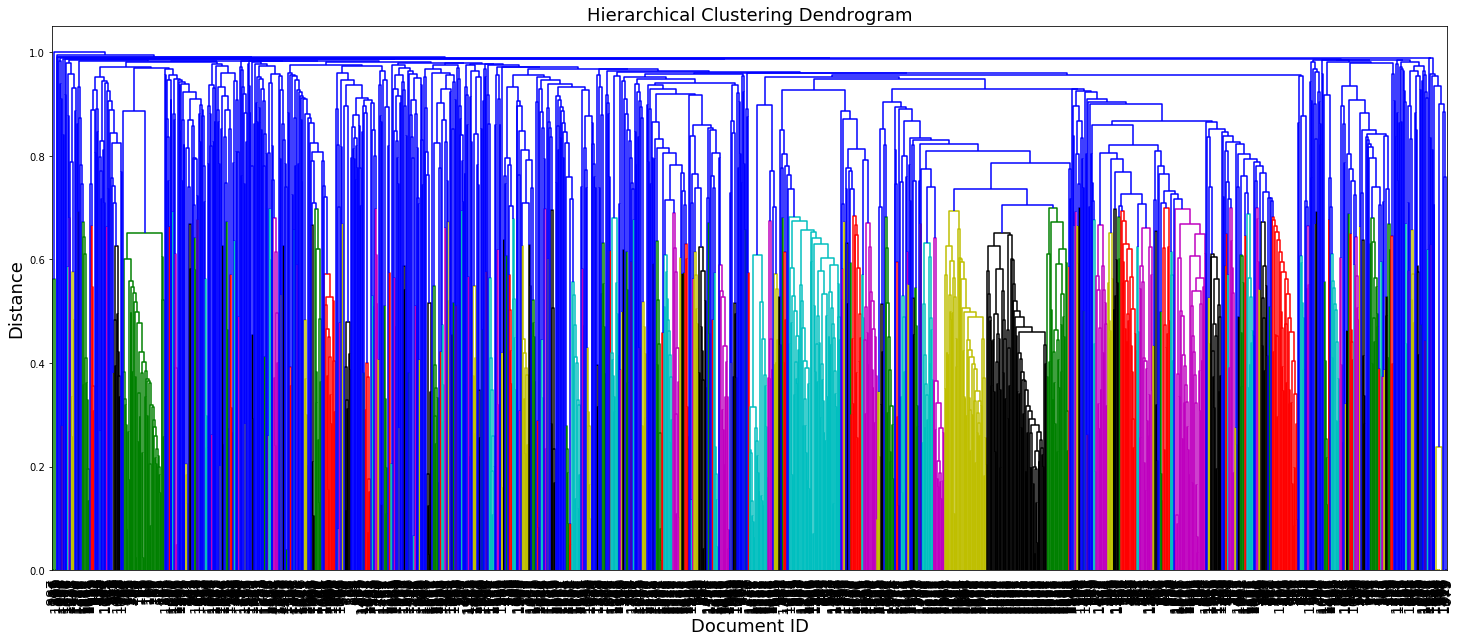

In [308]:
Z = linkage(DTM_TFIDF, 'average', metric='cosine')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

### Single

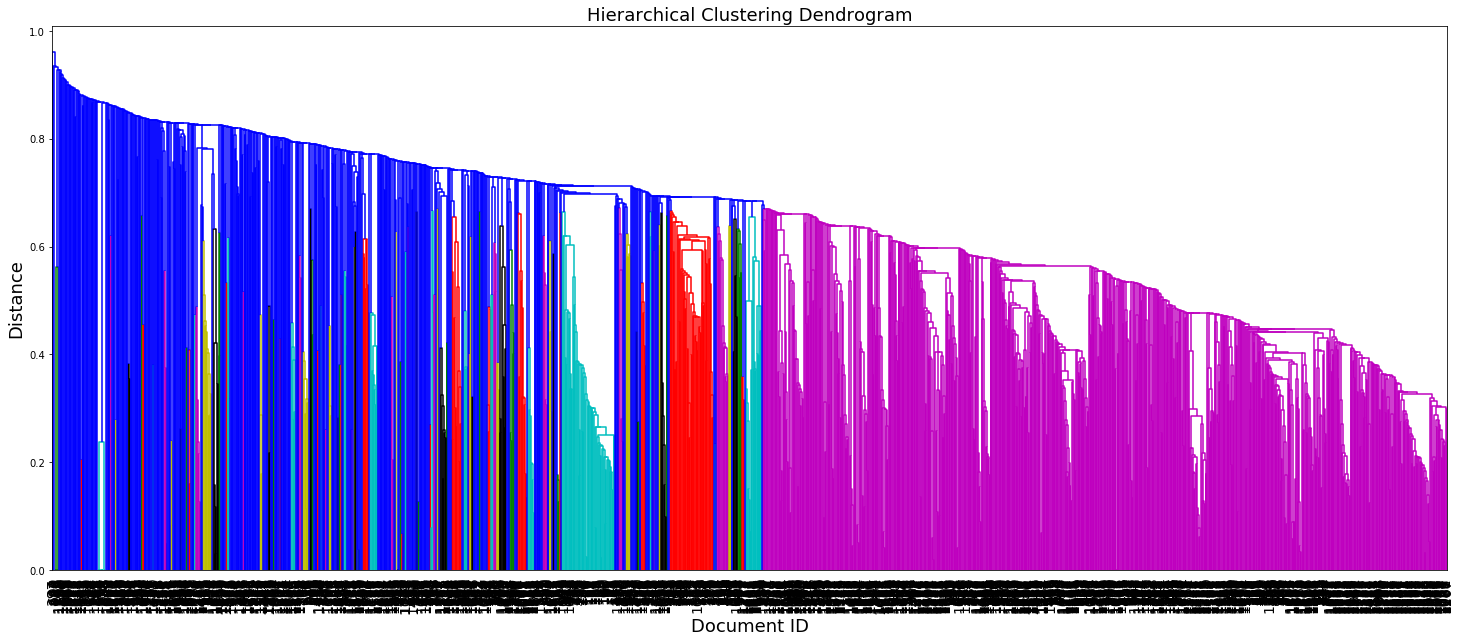

In [319]:
Z = linkage(DTM_TFIDF, 'single', metric='cosine')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

In [696]:
data[data['single']==0] #각종 사건사고

0                                               1  \
0        0                \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1        1          \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2        2        \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
3        3       \n방향타 잃은 화물선, 광안대교 돌진…안전 확보될 때까지 통제(종합…\n   
5        5        \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
10      10            \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11      11         \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12      12                     \n기억해야 할 김복동 할머니의 마지막 8개월\n   
14      14                         \n맑고 온화한 3·1절…미세먼지 나쁨\n   
15      15          \n광안대교 돌진 러 선박 선원, 음주운항·충돌경위 추궁에 모르쇠\n   
16      16       \n광안대교 돌진 선박 선원들 '모르쇠'…선장 구속영장 신청키로(종합…\n   
17      17         \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
19      19      \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
22      22             \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23      23      \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
26      26                \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27      27       \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28      28       \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29      29    \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
30      30                    \n"러시아 화물선은 왜 광안대교로 돌진했나?"\n   
32      32         \n“성추행 때문에 여성 노숙인 다 숨어버려” 기댈 곳 없는 그들 \n   
33      33           \n봄이 왔지만 초미세먼지에 황사까지…최악 대기 당분간 계속될듯\n   
35      35           \n부산해경, 광안대교 충돌 러시아 화물선 선장 구속영장 신청 \n   
37      37   \n[아무튼, 주말] "한달 왕복에 300만원이 말이 되나" 통행료 가장 비…\n   
38      38       \n철썩같이 믿었는데… 여친 父 “본 적도 없는데, 돈 준 게 미친X”\n   
39      39                \n“당신은 날 죽일 수 없다” 대한항공 박창진 인터뷰\n   
40      40               \n[날씨] 오늘도 공기 탁해…오늘 밤 차츰 제주부터 비\n   
42      42            \n19살 차 국제결혼 부부 7년 만에 파경…책임은 누구에게?\n   
44      44      \n 요양병원에 홀로 앉아 있을 노년의 나, 상상해보니··· [토요판]…\n   
45      45         \n조영남 무죄 끌어낸 영상녹화 조작 논란…감찰 착수하자 "장비탓"\n   
...    ...                                             ...   
1668  1675                \nA형 간염 예방접종 "비싸서 포기?"…가격 얼마기에\n   
1669  1676           \n“1000원 갑질, 안가요!” 대천항 수산시장 불매운동 활활\n   
1670  1677             \n저수지서 발견된 여중생 시신···범인은 30대 의붓아버지\n   
1671  1678  \n퇴직금 요구한 60대女의 갑질 폭로 "1000원권 7000장 직접 세서 가…\n   
1672  1679     \n [단독] “유명 정신과 의사에게 ‘그루밍 성폭력’당했다” 피해자 영…\n   
1673  1680            \nA형 간염 공포 확산…3040 "부부끼리도 다른 그릇 써"\n   
1674  1681        \n[르포]"고래 싸움에 새우 등 터진 격"…녹지병원 직원들 '한숨'\n   
1675  1682           \n"1등은 실력, 모함"…숙명여고 쌍둥이는 왜 법정서 당당할까\n   
1676  1683           \n[영상] '케어' 박소연 "구속 두렵지 않다…안락사 불가피"\n   
1677  1684           \n성추행 문제로 말다툼하다가… 차에서 의붓딸 죽인 30대 아빠\n   
1679  1686  \n[왱] ‘반드시 터진다는’ 백두산 화산 폭발 뒤 한반도(2019년 연구) …\n   
1680  1687                  \n박소연 “제가 구속돼도 동물들에게는 좋은 결과”\n   
1681  1688                 \n방치해선 안될 그들…`외톨이` 40대 무직 미혼남\n   
1682  1689       \n"친부모에 성추행 알려서"…중학생 의붓딸 살해·유기한 30대(종합)\n   
1685  1692       \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범(종합)\n   
1686  1693       \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1689  1696              \n성폭행 호소 딸 살해 의붓아버지…공범 친모 검거(종합)\n   
1692  1699           \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1694  1701      \n의붓딸 살해 친모, 시신유기 후 돌아온 남편에 "고생했다" 네티즌 …\n   
1695  1702           \n딸 시신 유기한 남편에게 “고생했어”…막장 부부의 잔혹 살인\n   
1699  1706             \n의붓딸 죽인 남편에 "힘들었겠네"…범행 현장 지켜본 친모\n   
1700  1707            \n의붓아빠에 살해 당한 아이···전화로 딸 불러낸건 친모였다\n   
1703  1710       \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1704  1711     \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   
1705  1712           \n10대 의붓딸 살해범, 젖먹이 아들 앞에서 범행…엄마도 공범\n   
1706  1713               \n[종합]젖먹이 앞에서 10대 의붓딸 살해…엄마도 공범\n   
1708  1715                    \n[속보] 경기 군포 강남제비스코안양공장 화재\n   
1709  1716            \n군포 제비표페인트 공장 대형 화재…3시간 만에 큰 불 잡아\n   
1711  1718                 \n잔혹한 의부·비정한 친모…시신이 되어 버려진 아이\n   
1712  1719              \n군포 제비표페인트 공장서 화재 발생…"대응3단계 발령"\n   

                                                      2  \
0     https://news.naver.com/main/ranking/read.nhn?r...   
1     https://news.naver.com/main/ranking/read

In [697]:
data[data['single']==1] #황하나, 박유천

0                                              1  \
9        9        \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
18      18               \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
152    154  \n[2019 서울 마약지도] 서울 5개구 중 1곳 '마약 오염'···외국인…\n   
195    197               \n경찰, '승리 카톡' 뒤늦게 입수 "현재 분석 중"\n   
690    693             \n경찰, `마약과의 전쟁` 한 달…마약사범 523명 검거\n   
850    853      \n은밀하게 번지는 덫, 오늘도 누군가… 파멸의 늪에 빠진다 [심층기…\n   
877    880            \n'남양유업 외손녀' 황하나, 마약 의혹에도 조사 안 받아\n   
879    882          \nSK·현대가 3세, '마약구매' 입건..."부유층 더 연루"\n   
923    926     \n'마약 투약 의혹' 황하나, 계속되는 논란에도 난데없이 '김치 홍보'\n   
927    930         \n[단독] '황하나 마약 투약' 진술 있는데도…번번이 영장 반려\n   
944    947    \n“몽롱하다 몽롱해” 황하나, ‘마약 투약’ 영상…봐주기 수사 의혹도(…\n   
952    955     \n“야, 장난하냐? 우리 아빠 경찰청장과 ‘베프’야” 황하나 추정 음성\n   
962    965            \n경찰, 남양유업 창업주 외손녀 황하나 ‘마약 혐의’ 체포\n   
968    971           \nSNS셀럽의 추락…황하나 주황색 후드티로 얼굴 가린채 압송\n   
976    980           \n슬리퍼 차림의 황하나 "포토라인 싫다"···질문엔 묵묵부답\n   
978    982           \n'남양유업 외손녀' 황하나 체포 단독 영상…마약 검사 거부\n   
993    997           \n[단독] 황하나, 의사 처방전 없이 향정신성 의약품도 복용\n   
995    999      \n[속보]황하나, '마약 혐의' 일부 인정…이르면 오늘 구속영장 신청\n   
997   1001              \n‘SNS 스타’ 대기업 외손녀 마약범죄 연루로 몰락 \n   
1002  1006              \n'환자복 차림'으로 체포된 황하나, 모발 제출은 거부\n   
1020  1024      \n황하나 가족 쇼핑몰, 마약 혐의 체포에도 버젓이 김치 팔면서 비난…\n   
1022  1026            \n[단독]경찰 부인하더니…"황하나 남양 손녀인 줄 알았다"\n   
1026  1030      \n황하나 무혐의한 검·경 "재벌가 손녀딸에 대마흡입건도 알아" 증언…\n   
1037  1041             \n[단독] "연예인 친구 권유로 다시 마약"…황하나 구속\n   
1043  1047        \n황하나 구속영장 신청, 박유천·버닝썬과 연결고리… 그녀는 누구?\n   
1045  1049             \n병원 체포부터 구속까지… 계속 옷 바뀌는 황하나(영상)\n   
1047  1051     \n‘아빠의 베프 경찰청장’ 누구냐는 질문에 “없다”고 답한 황하나가 …\n   
1050  1054            \n황하나 "잠 잘 때 연예인 지인이 강제 투약"…수사 확대\n   
1055  1059    \n경찰, '황하나에 마약 강요' 연예인 A씨 수사 착수…'황하나發 연예…\n   
1056  1060                   \n황하나 구속..."연예인 권유로 마약 계속"\n   
...    ...                                            ...   
1612  1619              \n범죄심리학과 교수 “박유천, 기자회견을 한 이유가…”\n   
1618  1625        \n[영상] 당당하게 법원 들어갔다가 포승줄에 묶인 채 나온 박유천\n   
1619  1626          \n박유천 태도가 영향? 반나절도 안 돼 구속 결정 내려진 이유\n   
1621  1628           \n구속 다투는 순간도 '마약 부인'…박유천-황하나 대질 방침\n   
1625  1632                  \n태도가 영향? 박유천, 초범인데도 구속된 이유\n   
1628  1635   \n'마약 투약 혐의' 박유천의 동생 박유환...개인 방송·SNS로 심경 …\n   
1631  1638                  \n'모르쇠'에 증거 인멸...박유천 구속 자충수\n   
1632  1639         \n같은 마약 투약 혐의에도… 할리 ‘불구속’ㆍ박유천 ‘구속’ 왜\n   
1635  1642               \n초범인데도 구속된 박유천…'모르쇠' 전략 자충수됐다\n   
1636  1643       \n‘마약양성’ 박유천, 구속 후 첫 조사서 “마약 안했다” 또 부인\n   
1639  1646       \n[문득 궁금] 박유천, 소변은 통과했지만 다리털에 덜미잡힌 이유는\n   
1642  1649             \n박유천 구속 후 첫 경찰 조사…황하나와 또다시 진실게임\n   
1648  1655         \n마약 혐의 박유천, 구속 후 첫 조사서 혐의 거듭 부인(종합)\n   
1660  1667     \n박유천 "나 자신 내려놓기 두려웠다"…19일만에 마약투약 인정(종합…\n   
1664  1671          \n박유천 "나 자신 내려놓기 두려웠다"…마침내 마약 투약 인정\n   
1665  1672       \n마약이 자기 노력 ‘물거품’ 만든다더니…박유천 “인정할 건 인정”\n   
1678  1685            \n박유천 “나 자신을 내려놓기 두려웠다”… 마약 투약 인정\n   
1683  1690         \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1684  1691     \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1687  1694           \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1688  1695      \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1690  1697        \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1691  1698               \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1693  1700            \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1696  1703            \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1697  1704      \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1698  1705                  \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1701  1708           \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1702  1709       \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1710  1717      \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   

                                                      2  \
9     https://news.naver.com/main/ranking/read.nhn?r...   
18    https://news.naver.com/main/ranking/read.nhn?r...   
152   https://news.naver.com/main/ranking/read.nh

In [698]:
data[data['single']==2] # 버닝썬, 승리, 마약

0                                              1  \
4        4    \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
21      21                \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
43      43          \n버닝썬 '애나' 마약 검사결과 일부 회신…경찰 "곧 재소환"\n   
108    110    \n버닝썬 마약 투약·유통 10여명 입건…'승리 카톡' 확인 못 해(종합…\n   
109    111     \n마약한 놈, 청탁한 놈, 폭행한 놈…악역만 넘치는 ‘아수라장’ 버닝…\n   
124    126        \n경찰, '마약류 투약 의혹' 버닝썬 이문호 대표 이틀 연속 조사\n   
140    142        \n승리 성접대 했나 안했나... 경찰 "카톡 일부 확보해 분석중"\n   
145    147            \n'승리 홍대 클럽' 실소유주는 YG 양현석 '탈세 의혹'\n   
192    194             \n길원옥 할머니의 호소…"위안부 진실 죽기 전 밝혀지길"\n   
204    206          \n은밀한 공간, 버닝썬VIP룸···"여자 비명 나도 신경안써"\n   
219    221    \n[버닝썬 탈세 2] 카드 꺼내면 "현금 주시죠"…MD 계좌로 수천만 원\n   
226    228        \n[단독] 경찰, '버닝썬 VIP룸' 영상 몰래 촬영·유포자 구속\n   
250    252          \n'버닝썬' 탈세 꾀했는지도 수사…"승리, 25일 현역 입대"\n   
257    259    \n빅뱅 승리 '성매매 알선' 혐의 입건…마약류 검사는 '음성'(종합2보…\n   
263    265             \n빅뱅 승리 '성매매 알선' 혐의 입건…피의자 신분 전환\n   
264    266        \n클럽 화장실엔 온갖 가루·주사기가 나뒹굴고 있었다 [잠입 취재]\n   
270    272         \n빅뱅 승리 '성매매 알선' 혐의 입건…피의자 신분 전환(종합)\n   
275    277                \n경찰, '승리 성접대 의혹' 클럽 아레나 압수수색\n   
279    281       \n[단독] 정준영, 불법 촬영 후 카톡방에 전송…피해자 최소 10명\n   
280    282          \n승리, 은퇴 선언…"나 하나 살자고 주변 피해" [공식입장]\n   
283    285         \n"승리 '성접대 의혹' 카톡방에 연예인 여러명"…일부 경찰소환\n   
286    288          \n정준영 몰카 카톡방 공개되자 용준형 SNS "오빠 아니죠?"\n   
292    294       \n"정준영, 룸살롱 여성 불법 촬영 영상 유포…피해자만 10여 명"\n   
293    295         \n승리 카톡방 연예인은 정준영..."희희낙락 '몰카', 충격적"\n   
294    296            \n[단독] 승리 성 접대 카톡, 동료연예인 휴대전화서 유출\n   
297    299     \n'승리 성매매 알선' 카톡방 연예인 조사…"어떤 대화 오갔나"(종합)\n   
298    300        \n"1박2일 정준영 성관계 몰카, 피해여성 10여명" SBS 보도\n   
301    303          \n'승리 카톡' 수사 연예계로 확대 조짐…유명가수 소환(종합)\n   
307    309           \n승리 정식 입건… 경찰, ‘버닝썬’ 이어 ‘아레나’ 정조준\n   
309    311            \n'성관계 몰카' 정준영 성폭력처벌법 위반 입건…오늘 귀국\n   
...    ...                                            ...   
1272  1277     \n"각자 계산했다"더니…윤 총경 골프접대 4번, 모두 승리 파트너가 …\n   
1284  1289          \n"윤총경 골프접대 2번더…승리 팔라완 성접대 확인중"(종합)\n   
1293  1298    \n“정준영 단톡방 총체적 난국” ‘승리 카톡방’ 보도한 기자 “참담한 …\n   
1317  1323            \n강남 한가운데 '로이킴 숲'…"놀랐다·꺼림칙" 존폐논란 \n   
1362  1368             \n“정준영·최종훈 등이 집단성폭행…녹취파일·사진도 있어”\n   
1367  1373          \n “정준영 일행에 집단 성폭행 당해” 첫 피해 주장 나왔다 \n   
1388  1394    \nA씨 "정준영·최종훈 등에게 성폭행 당했다" vs 최종훈 "동석한 건…\n   
1392  1398         \n“정준영 등이 집단 성폭행, 고소 예정”…첫 피해 여성 나타나\n   
1396  1402         \n“어제 종훈이랑…” 집단성폭행 의혹 불거진 정준영 단톡방 발언\n   
1398  1404      \n경찰, 정준영 단톡방서 '집단 성폭행' 정황 포착…음성·사진파일 …\n   
1402  1408          \n정준영 단톡방 '집단 성폭행' 정황 "알찬 1박2일 보내자"\n   
1405  1411         \n정준영 단톡방서 ‘집단 성폭행’ 정황…“우리 이번엔 원정이다”\n   
1417  1423          \n[단독] "승리 일행과 술 마시다 성폭행…때려도 못 일어나"\n   
1426  1432            \n'버닝썬 마약' 이문호, 구속…애나는 영장 기각(종합) \n   
1428  1434             \n버닝썬 대표 이문호는 구속되고 MD 애나는 기각된 이유\n   
1489  1495          \n[단독]“승리 단톡방 멤버들, 여성들과 상습 마약풍선 파티”\n   
1504  1510          \n‘피 흘리는 혼절 여성 찍던 클럽 VVIP’ 증언 (풀영상)\n   
1526  1533                        \n정준영 피해자 조롱 ‘충격적 발언’\n   
1528  1535    \n승리, 성매매 알선 정황 포착…"강남 고급 주점서 300명 초대해 파…\n   
1546  1553            \n[단독]승리·정준영·최종훈 우정여행? 사실 범죄여행이었다\n   
1551  1558      \n“유인석, 성접대 시인…호텔비 3000만원은 승리가 YG카드로 내”\n   
1552  1559    \n[단독] "승리 동업자, 성접대 시인… 호텔비는 승리가 YG카드로 내…\n   
1557  1564  \n유인석 "성접대 인정, 결제는 YG 카드로" vs 승리 "호텔비만 냈고 …\n   
1561  1568     \n경찰, '승리 성접대' 사실상 확인…성매매여성 등 17명 입건(종합)\n   
1564  1571    \n승리 일행, 성 접대 혐의 첫 시인…“호텔비, 승리가 YG카드로 결제…\n   
1569  1576          \n[버닝썬] '농담'이라더니 결국 인정…"이제 승리만 남았다"\n   
1573  1580               \n‘살아있는 권력’ 수사… 결국 靑 ‘윗선’ 손 못대\n   
1627  1634            \n[사사건건] 포승줄 묶인 박유천 결국 구속…"도주 우려"\n   
1643  1650                   \n"집단 성폭행까지"...끝없는 아이돌의 타락\n   
1707  1714                   \n"승리, 이번 주 구속영장"…YG 수사 확대\n   

                                                      2  \
4     https://news.naver.com/main/ranking/read.nhn?r...   
21    https://news.naver.com/main/ranking/read.nhn?r...   
43    https://news.naver.com/main/ranking/read.nh

In [699]:
data[data['single']==3] #개학연기, 사립유치원

0                                             1  \
6      6   \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7      7           \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8      8      \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
13    13           \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
20    20      \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
24    24   \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25    25             \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
31    31  \n'개학 연기' 유치원 전국 190곳…정부 "철회 안할땐 엄정 대응"(종…\n   
34    34                        \n한유총은 왜?…"유치원은 치킨집"\n   
36    36        \n이총리 "유치원 개학 연기 즉각 철회해야…강행하면 엄정 대처"\n   
41    41    \n서울·경기·인천 1864개 사립유치원 중 83곳만 개학연기…'노코멘…\n   
62    62           \n유치원 도대체 몇 곳이 개원 안 하나…"내일 돼야 파악"\n   
65    65      \n개학연기 '1천533곳 vs 190곳' 대혼란…원아·학부모만 피해\n   
68    68          \n한유총 "폐원 투쟁도 검토…개학연기 사립유치원 1533곳"\n   
70    70        \n수도권교육감 "'개학연기' 한유총과 대화 없다…법인설립 취소"\n   
73    73     \n유치원 개학 D-1…교육당국·한유총 잇단 기자회견 등 급박한 움직…\n   
74    74              \n유치원 개학연기 문자 받았다면? 긴급돌봄 신청하세요\n   
81    81           \n'보육대란' 벌어지나…교육당국-한유총 대립 속 우려 커져\n   
86    86            \n개학연기 강행방침 '보육대란' 비상…학부모들 당혹·분노\n   
87    87     \n"언제 또 돌발 휴원할지 불안불안…더 이상 사립유치원 믿을수 없어…\n   
88    88           \n전국 사립유치원 365곳 '개학연기' 방침…서울은 21곳\n   
89    89          \n한유총 오늘부터 '무기한 개학연기'…정부 긴급돌봄체계 가동\n   
90    90       \n한유총 "개학연기 무조건 철회…내일부터 유치원 정상운영"(종합)\n   
92    92           \n한유총 유치원 개학연기 강행…보육대란 없었지만 불편 속출\n   
94    94        \n서울교육청 '개학연기 강행' 한유총 설립허가 취소 결정(종합)\n   
95    95         \n교육당국, 한유총 설립허가 취소 예정대로…공정위 신고도 추진\n   
97    98       \n한유총 "개학연기 무조건 철회…내일부터 유치원 정상운영"(2보)\n   
100  101       \n“반차를 언제까지 내야 할지” 개학연기 첫 날 당혹스런 학부모들\n   
102  103              \n여론 뭇매에 한유총 개학연기 철회…"설립허가 취소"\n   
103  104             \n정부 무관용 원칙에 일부 유치원 개학연기 철회(종합)\n   
105  107         \n유은혜 부총리 "유치원 학부모 볼모로 잡는 관행 바로잡겠다"\n   
106  108                \n고립무원 한유총, 실리·명분 다잃고 ‘백기투항’\n   
107  109       \n유치원 '개학연기' 전국 동시다발 수사하나…검찰 법리검토(종합)\n   
110  112            \n한유총 개학 연기 언제까지 가능한가…6월10일 마지노선\n   
112  114           \n유은혜 "유치원 개학 연기는 불법, 지금이라도 철회하라"\n   
115  117               \n부메랑된 '개학 연기'…결국 '허가 취소' 내몰려\n   
119  121         \n실패 예견된 '개학연기 투쟁'…한유총 이사장도 지침 안 지켜\n   
123  125         \n“새벽에 잠 덜 깬 쌍둥이 태우고 시댁 가는데 눈물이 왈칵”\n   
127  129            \n"하루 개학 연기도 잘못"…학부모단체, 한유총 고발한다\n   
128  130         \n개학연기 사립유치원 '0'…'에듀파인 의무화' 참여율 59%\n   
133  135         \n조희연 "한유총 교육자로서 초심 잃어, 법인 설립허가 취소"\n   
135  137     \n조희연 "한유총 교육자로서 초심 잃어, 법인 설립허가 취소"(종합)\n   
148  150              \n한유총이 시설사용료와 폐원 조건에 집착하는 이유는?\n   
164  166      \n'한유총' 개학 연기 사태 막전막후…급박했던 엿새 어떻게 돌아갔나\n   
182  184                  \n뚝딱 확충 힘든데… 인기 치솟는 국공립유치원\n   
200  202       \n'한유총 백기' 나흘만에…대형유치원 에듀파인 참여율 55→83%\n   
208  210             \n국공립 '로또'라면서도…가 보면 '텅텅' 빈자리 왜?\n   
242  244            \n아빠·엄마가 유치원 원장님…"月 20만 원에 양질교육"\n   
295  297        \n이덕선 한유총 이사장, '개학연기' 사태 일주일 만에 "사임"\n   
337  339   \n[단독]“학부모 똥줄 타게 해야 승리” 그들은 엄마들을 ‘이용’만 했…\n   
451  454   \n'개학연기 투쟁' 11일만에 … 대형 사립유치원 에듀파인 100% 도입\n   

                                                     2  \
6    https://news.naver.com/main/ranking/read.nhn?r...   
7    https://news.naver.com/main/ranking/read.nhn?r...   
8    https://news.naver.com/main/ranking/read.nhn?r...   
13   https://news.naver.com/main/ranking/read.nhn?r...   
20   https://news.naver.com/main/ranking/read.nhn?r...   
24   https://news.naver.com/main/ranking/read.nhn?r...   
25   https://news.naver.com/main/ranking/read.nhn?r...   
31   https://news.naver.com/main/ranking/read.nhn?r...   
34   https://news.naver.com/main/ranking/read.nhn?r...   
36   https://news.naver.com/main/ranking/read.nhn?r...   
41   https://news.naver.com/main/ranking/read.nhn?r...   
62   https://news.naver.com/main/ranking/read.nhn?r...   
65   https://news.naver.com/main/ranking/read.nhn?r...   
68   https://news.naver.com/main/ranking/read.nhn?r...   
70   https://news.naver.com/main/ranking/read.nhn?r...   
73   https://news.naver.com/main/ranking/read.nhn?r...   
74  

In [700]:
data[data['single']==4] #김학의, 성접대

0                                              1  \
191    193   \n[단독] “‘별장 성접대’ 김학의 임명 강행, 배후에 최순실” 진술 확…\n   
386    389     \n대검 '성접대 의혹' 김학의 前차관 내일 소환…출석 불투명(종합2보…\n   
395    398                \n윤지오 "장자연 단순자살 아냐…공소시효 연장해야"\n   
402    405              \n'성접대 의혹' 김학의 조사 무산…진상규명 좌초 위기\n   
410    413            \n'성접대 의혹' 김학의, 오늘 6년만에 소환…출석 미지수\n   
415    418     \n“수시로 성폭행하며 촬영” 김학의 ‘별장 성접대’ 수사 상황(영상) \n   
418    421          \n“너무 난잡해서” 오열해버린 김학의 피해여성 인터뷰(영상) \n   
433    436               \n2주 뒤면 조사 끝난다고?…"증거 봇물…재수사하라"\n   
444    447         \n갈수록 불어나는 '김학의 별장 성접대' 의혹…재수사 요구 커져\n   
450    453    \n[취재파일] 김학의 前 차관 성 접대 의혹과 동영상, 그리고 정확한 …\n   
457    460             \n'육안 확인' 가능한데...'2차례 무혐의' 의혹 증폭\n   
464    467            \n김학의·장자연 의혹 커지는데…검찰과거사위 연장 왜 어렵나\n   
474    477         \n김학의 ‘별장 성접대’ 의혹 여전한데…진상조사단 활동 연장은?\n   
490    493       \n장자연ㆍ김학의 사건, 진실ㆍ단죄의 문 앞에 공소시효ㆍ증거능력 ‘…\n   
499    502          \n김학의·장자연 사건…검찰과거사위 활동 두달 추가 연장(종합)\n   
508    511            \n김학의 ‘특수강간’ 무혐의 이유 보니…피해자답지 않아서?\n   
514    517           \n'특수강간 의혹' 김학의 사건, 권력형 비리사건으로 번지나\n   
519    522      \n"버닝썬·김학의·장자연 특권층 유착"…사법당국 '강력수사' 천명(…\n   
522    525       \n 김학의·장자연 사건 ‘재수사’ 가닥…외압·은폐 의혹까지 겨눈다 \n   
530    533            \n'강제수사권' 칼 빼든 정부…김학의·장자연 사건 새 국면\n   
569    572              \n출국금지도 안 돼…자취 감춘 김학의, 조사 가능할까?\n   
577    580               \n“김학의 부실 수사는 네 탓” 뒤늦게 치고받는 검경\n   
580    583             \n성 접대 정황 명백한데…김학의 '뇌물 혐의' 왜 배제?\n   
584    587           \n수색도 체포도 거부… 檢 ‘김학의 수사’ 틈만 나면 뭉갰다\n   
618    621         \n [단독] 김학의 한밤중 타이로 출국하려다가 ‘긴급출국금지’ \n   
626    629                 \n김학의측 "해외도피 의사 없었다…왕복티켓 끊어"\n   
629    632               \n미묘한 시기에…김학의, 심야시간 해외출국 시도 왜?\n   
632    635               \n김학의 출국금지 전 피내사자 전환…사실상 수사 개시\n   
634    637           \n김학의 도주 우려에 '즉석 출국금지'…강원도 사찰서 지낸듯\n   
635    638           \n'출국 시도' 김학의, 피의자 입건…'특수강간 혐의' 포함\n   
...    ...                                            ...   
842    845         \n[단독] 유출 '김학의 동영상', 피해女·해결사가 갖고 있었다\n   
853    856          \n'김학의 성폭력 의혹' 변수 돌출…진상조사, 뇌물규명에 중점\n   
910    913          \n"고소하고 고소해도"…수사팀이 주목한 '윤중천 3번 무혐의'\n   
936    939            \n경찰청장 "김학의 임명 전 범죄 첩보 靑에 수차례 보고"\n   
945    948     \n김학의 처벌 옥죄는 윤중천의 ‘입’… 첫 강제수사, 뇌물 혐의부터 …\n   
991    995    \n“김학의 차관 내정 발표날, 청와대 들어가 동영상 ‘진짜 같다’ 보고…\n   
1014  1018     \n김학의 비행기 표 끊기 전 출금 조회한 법무관 2명 검찰 수사 받는…\n   
1046  1050         \n'김학의 동영상' 실제로 봤더니... '내부자들'은 현실이었다\n   
1075  1079                 \n'김학의 인천공항 발견' 이틀 전, 무슨 일이?\n   
1103  1108         \n6년 전 김학의 성폭력의 반전···녹음파일 100건이 쏟아졌다\n   
1125  1130            \n김학의, 반격 나섰다…성폭행 피해주장 여성 무고혐의 고소\n   
1140  1145             \n[단독]“윤중천, 김학의에 ‘성적 행동 사진’ 보냈다”\n   
1186  1191          \n김학의 동영상 고화질 원본 공개 보도, 김학의 “법적 조치”\n   
1187  1192        \n[단독] YTN '고화질 원본' 최초 입수...김학의 얼굴 뚜렷\n   
1195  1200             \n 김학의, YTN 고화질 동영상 공개에 “법적 조치” \n   
1197  1202    \n김학의 동영상 원본 공개…"성접대 동원 여성 24명 중 5명과 성관계…\n   
1200  1205  \n[단독] '김학의 동영상' 고화질 원본 보니..."여성 24명 성범죄 동…\n   
1208  1213     \n'김학의 동영상' 고화질 원본 공개… 김학의 측 "명예훼손 법적 조…\n   
1218  1223                    \n김학의 동영상 입수해 공개한 기자가 한 말\n   
1222  1227                    \n"영상 전혀 모른다"는 김학의...사실은?\n   
1231  1236           \n"국과수는 '김학의 저화질 영상'만 봤다…고화질은 못 봐"\n   
1238  1243   \n발등에 불 떨어진 경찰.. 2013년 원본 '김학의 동영상‘ 찾기 위하여\n   
1271  1276                 \n"동영상 속 여성 접니다"…피해자 스스로 검찰에\n   
1288  1293        \n"내가 김학의 동영상 속 피해자"...피해 여성, 檢 자진 출석\n   
1305  1310          \n윤중천 “동영상 속 인물, 김학의냐 묻자 '비슷하다' 진술”\n   
1307  1312    \n윤중천, MBC 인터뷰서 "성접대 동영상 남성, 김학의 비슷하다" 시…\n   
1377  1383           \n경찰, '김학의 압수수색' 부글부글…"우린 피해자인데 왜"\n   
1476  1482     \n[단독] 난관 맞은 김학의 수사… 병원장 2명 등 원주별장 멤버 추적\n   
1501  1507                  \n'동영상' 또 나왔다…성범죄 의혹 수사 급진전\n   
1523  1530                 \n"새로운 동영상 또 나왔다"…성범죄 수사 급물살\n   

                                                      2  \
191   https://news.naver.com/main/ranking/read.nhn?r...   
386   https://news.naver.com/main/ranking/read.nhn?r...   
395   https://news.naver.com/main/ranking/read.nh

In [701]:
data[data['single']==3].count()

0               51
1               51
2               51
3               51
Kmeans          51
ward            51
single          51
Kmeans_elbow    51
db              51
Kmesns_tfidf    51
Kmeans_tfidf    51
dtype: int64

### ward

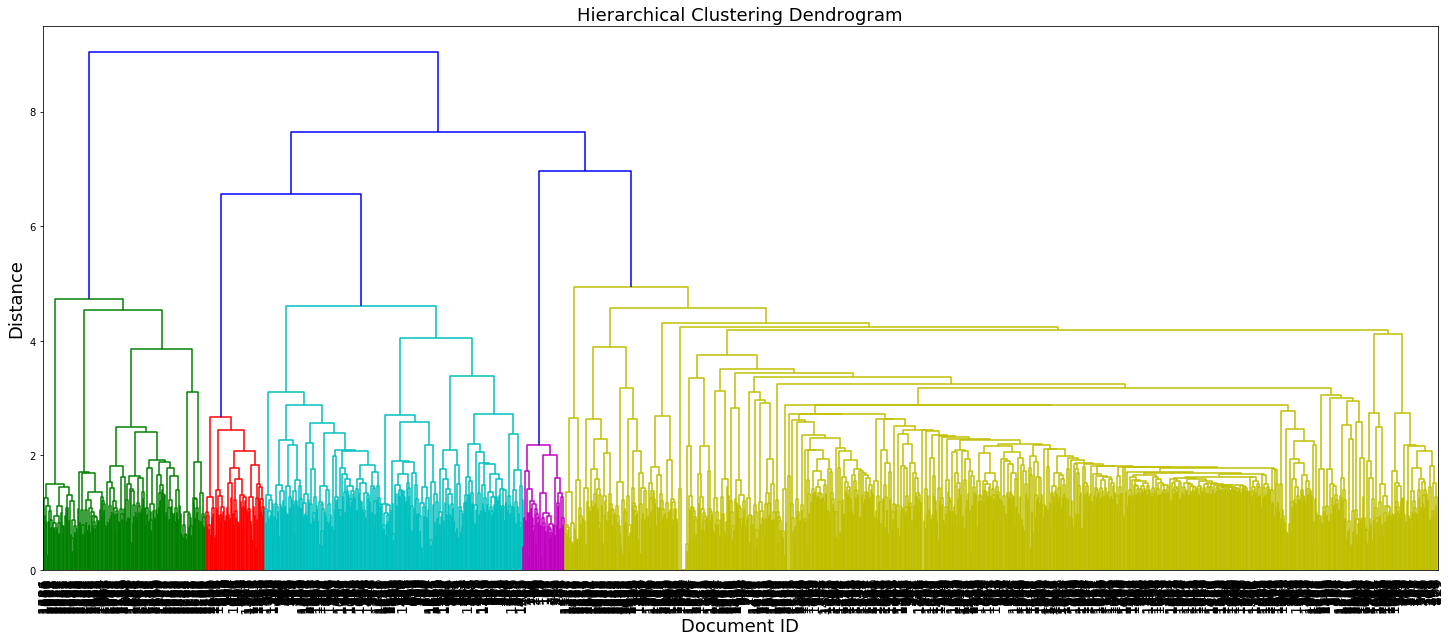

In [323]:
Z = linkage(DTM_TFIDF, 'ward', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()

In [328]:
clustering1 = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5).fit(DTM_TFIDF)
clustering1.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [376]:
clustering2 = AgglomerativeClustering(linkage='single', affinity='cosine', n_clusters=4).fit(DTM_TFIDF)
clustering2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [377]:
data['single']=clustering1.labels_

In [355]:
data['ward']=clustering1.labels_

In [691]:
data[data['ward']==1] #황하나, 마약

0                                              1  \
9        9        \n황하나 "제가 남자 하나 잘못 만나…" 박유천 저격? 폭로 예고\n   
18      18               \n박유천 전 여친 황하나가 인스타에 올렸다 삭제한 글\n   
152    154  \n[2019 서울 마약지도] 서울 5개구 중 1곳 '마약 오염'···외국인…\n   
195    197               \n경찰, '승리 카톡' 뒤늦게 입수 "현재 분석 중"\n   
690    693             \n경찰, `마약과의 전쟁` 한 달…마약사범 523명 검거\n   
850    853      \n은밀하게 번지는 덫, 오늘도 누군가… 파멸의 늪에 빠진다 [심층기…\n   
877    880            \n'남양유업 외손녀' 황하나, 마약 의혹에도 조사 안 받아\n   
879    882          \nSK·현대가 3세, '마약구매' 입건..."부유층 더 연루"\n   
923    926     \n'마약 투약 의혹' 황하나, 계속되는 논란에도 난데없이 '김치 홍보'\n   
927    930         \n[단독] '황하나 마약 투약' 진술 있는데도…번번이 영장 반려\n   
944    947    \n“몽롱하다 몽롱해” 황하나, ‘마약 투약’ 영상…봐주기 수사 의혹도(…\n   
952    955     \n“야, 장난하냐? 우리 아빠 경찰청장과 ‘베프’야” 황하나 추정 음성\n   
962    965            \n경찰, 남양유업 창업주 외손녀 황하나 ‘마약 혐의’ 체포\n   
968    971           \nSNS셀럽의 추락…황하나 주황색 후드티로 얼굴 가린채 압송\n   
976    980           \n슬리퍼 차림의 황하나 "포토라인 싫다"···질문엔 묵묵부답\n   
978    982           \n'남양유업 외손녀' 황하나 체포 단독 영상…마약 검사 거부\n   
993    997           \n[단독] 황하나, 의사 처방전 없이 향정신성 의약품도 복용\n   
995    999      \n[속보]황하나, '마약 혐의' 일부 인정…이르면 오늘 구속영장 신청\n   
997   1001              \n‘SNS 스타’ 대기업 외손녀 마약범죄 연루로 몰락 \n   
1002  1006              \n'환자복 차림'으로 체포된 황하나, 모발 제출은 거부\n   
1020  1024      \n황하나 가족 쇼핑몰, 마약 혐의 체포에도 버젓이 김치 팔면서 비난…\n   
1022  1026            \n[단독]경찰 부인하더니…"황하나 남양 손녀인 줄 알았다"\n   
1026  1030      \n황하나 무혐의한 검·경 "재벌가 손녀딸에 대마흡입건도 알아" 증언…\n   
1037  1041             \n[단독] "연예인 친구 권유로 다시 마약"…황하나 구속\n   
1043  1047        \n황하나 구속영장 신청, 박유천·버닝썬과 연결고리… 그녀는 누구?\n   
1045  1049             \n병원 체포부터 구속까지… 계속 옷 바뀌는 황하나(영상)\n   
1047  1051     \n‘아빠의 베프 경찰청장’ 누구냐는 질문에 “없다”고 답한 황하나가 …\n   
1050  1054            \n황하나 "잠 잘 때 연예인 지인이 강제 투약"…수사 확대\n   
1055  1059    \n경찰, '황하나에 마약 강요' 연예인 A씨 수사 착수…'황하나發 연예…\n   
1056  1060                   \n황하나 구속..."연예인 권유로 마약 계속"\n   
...    ...                                            ...   
1612  1619              \n범죄심리학과 교수 “박유천, 기자회견을 한 이유가…”\n   
1618  1625        \n[영상] 당당하게 법원 들어갔다가 포승줄에 묶인 채 나온 박유천\n   
1619  1626          \n박유천 태도가 영향? 반나절도 안 돼 구속 결정 내려진 이유\n   
1621  1628           \n구속 다투는 순간도 '마약 부인'…박유천-황하나 대질 방침\n   
1625  1632                  \n태도가 영향? 박유천, 초범인데도 구속된 이유\n   
1628  1635   \n'마약 투약 혐의' 박유천의 동생 박유환...개인 방송·SNS로 심경 …\n   
1631  1638                  \n'모르쇠'에 증거 인멸...박유천 구속 자충수\n   
1632  1639         \n같은 마약 투약 혐의에도… 할리 ‘불구속’ㆍ박유천 ‘구속’ 왜\n   
1635  1642               \n초범인데도 구속된 박유천…'모르쇠' 전략 자충수됐다\n   
1636  1643       \n‘마약양성’ 박유천, 구속 후 첫 조사서 “마약 안했다” 또 부인\n   
1639  1646       \n[문득 궁금] 박유천, 소변은 통과했지만 다리털에 덜미잡힌 이유는\n   
1642  1649             \n박유천 구속 후 첫 경찰 조사…황하나와 또다시 진실게임\n   
1648  1655         \n마약 혐의 박유천, 구속 후 첫 조사서 혐의 거듭 부인(종합)\n   
1660  1667     \n박유천 "나 자신 내려놓기 두려웠다"…19일만에 마약투약 인정(종합…\n   
1664  1671          \n박유천 "나 자신 내려놓기 두려웠다"…마침내 마약 투약 인정\n   
1665  1672       \n마약이 자기 노력 ‘물거품’ 만든다더니…박유천 “인정할 건 인정”\n   
1678  1685            \n박유천 “나 자신을 내려놓기 두려웠다”… 마약 투약 인정\n   
1683  1690         \n필로폰 검출돼도 "안했다" 버텼던 박유천, '이것'에 무너졌다\n   
1684  1691     \n전문가 “박유천, 로버트 할리로 잘못된 학습효과...다리털 덜 밀어”\n   
1687  1694           \n박유천 손·다리 상처.. 필로폰 부작용 '메스버그 현상?'\n   
1688  1695      \n박유천 "황하나와 재회하며 다시 마약에 손댔다"…끝까지 전 연인에…\n   
1690  1697        \n“온몸이 썩고 피딱지” 박유천 다리 사진 찍혔을 즈음 황하나 글\n   
1691  1698               \n박유천, 실토한 김에 더..."황하나와 추가 투약"\n   
1693  1700            \n박유천 다리 상처, 필로폰 부작용 의심…'메스 버그'란?\n   
1696  1703            \n박유천, 마약 결백 회견은 거짓말…"황하나와 함께" 자백\n   
1697  1704      \n“자기애 강할수록 부정 성향 강해”…박유천 거짓말 논란, 범죄심리…\n   
1698  1705                  \n박유천 마약 투약 인정하자 변호사도 "손뗀다"\n   
1701  1708           \n박유천 "황하나 요구로 마약"···황하나는 "박유천 요구"\n   
1702  1709       \n[단독] 박유천 “혼자서도 했다”…필로폰 투약 ‘2건 추가 자백’\n   
1710  1717      \n로버트 할리, 20세 공범과 투약···"스트레스 탓, 마약은 처음"\n   

                                                      2  \
9     https://news.naver.com/main/ranking/read.nhn?r...   
18    https://news.naver.com/main/ranking/read.nhn?r...   
152   https://news.naver.com/main/ranking/read.nh

In [692]:
data[data['ward']==2] # 버닝썬, 승리

0                                              1  \
4        4    \n‘승리 생일파티’ 논란된 날 버닝썬 제보자 “12월에 클럽 찾아갔더니…\n   
21      21                \n'버닝썬 사태' 한 달…나비 날갯짓이 '폭풍'으로\n   
43      43          \n버닝썬 '애나' 마약 검사결과 일부 회신…경찰 "곧 재소환"\n   
108    110    \n버닝썬 마약 투약·유통 10여명 입건…'승리 카톡' 확인 못 해(종합…\n   
109    111     \n마약한 놈, 청탁한 놈, 폭행한 놈…악역만 넘치는 ‘아수라장’ 버닝…\n   
124    126        \n경찰, '마약류 투약 의혹' 버닝썬 이문호 대표 이틀 연속 조사\n   
140    142        \n승리 성접대 했나 안했나... 경찰 "카톡 일부 확보해 분석중"\n   
145    147            \n'승리 홍대 클럽' 실소유주는 YG 양현석 '탈세 의혹'\n   
192    194             \n길원옥 할머니의 호소…"위안부 진실 죽기 전 밝혀지길"\n   
204    206          \n은밀한 공간, 버닝썬VIP룸···"여자 비명 나도 신경안써"\n   
219    221    \n[버닝썬 탈세 2] 카드 꺼내면 "현금 주시죠"…MD 계좌로 수천만 원\n   
226    228        \n[단독] 경찰, '버닝썬 VIP룸' 영상 몰래 촬영·유포자 구속\n   
250    252          \n'버닝썬' 탈세 꾀했는지도 수사…"승리, 25일 현역 입대"\n   
257    259    \n빅뱅 승리 '성매매 알선' 혐의 입건…마약류 검사는 '음성'(종합2보…\n   
263    265             \n빅뱅 승리 '성매매 알선' 혐의 입건…피의자 신분 전환\n   
264    266        \n클럽 화장실엔 온갖 가루·주사기가 나뒹굴고 있었다 [잠입 취재]\n   
270    272         \n빅뱅 승리 '성매매 알선' 혐의 입건…피의자 신분 전환(종합)\n   
275    277                \n경찰, '승리 성접대 의혹' 클럽 아레나 압수수색\n   
279    281       \n[단독] 정준영, 불법 촬영 후 카톡방에 전송…피해자 최소 10명\n   
280    282          \n승리, 은퇴 선언…"나 하나 살자고 주변 피해" [공식입장]\n   
283    285         \n"승리 '성접대 의혹' 카톡방에 연예인 여러명"…일부 경찰소환\n   
286    288          \n정준영 몰카 카톡방 공개되자 용준형 SNS "오빠 아니죠?"\n   
292    294       \n"정준영, 룸살롱 여성 불법 촬영 영상 유포…피해자만 10여 명"\n   
293    295         \n승리 카톡방 연예인은 정준영..."희희낙락 '몰카', 충격적"\n   
294    296            \n[단독] 승리 성 접대 카톡, 동료연예인 휴대전화서 유출\n   
297    299     \n'승리 성매매 알선' 카톡방 연예인 조사…"어떤 대화 오갔나"(종합)\n   
298    300        \n"1박2일 정준영 성관계 몰카, 피해여성 10여명" SBS 보도\n   
301    303          \n'승리 카톡' 수사 연예계로 확대 조짐…유명가수 소환(종합)\n   
307    309           \n승리 정식 입건… 경찰, ‘버닝썬’ 이어 ‘아레나’ 정조준\n   
309    311            \n'성관계 몰카' 정준영 성폭력처벌법 위반 입건…오늘 귀국\n   
...    ...                                            ...   
1272  1277     \n"각자 계산했다"더니…윤 총경 골프접대 4번, 모두 승리 파트너가 …\n   
1284  1289          \n"윤총경 골프접대 2번더…승리 팔라완 성접대 확인중"(종합)\n   
1293  1298    \n“정준영 단톡방 총체적 난국” ‘승리 카톡방’ 보도한 기자 “참담한 …\n   
1317  1323            \n강남 한가운데 '로이킴 숲'…"놀랐다·꺼림칙" 존폐논란 \n   
1362  1368             \n“정준영·최종훈 등이 집단성폭행…녹취파일·사진도 있어”\n   
1367  1373          \n “정준영 일행에 집단 성폭행 당해” 첫 피해 주장 나왔다 \n   
1388  1394    \nA씨 "정준영·최종훈 등에게 성폭행 당했다" vs 최종훈 "동석한 건…\n   
1392  1398         \n“정준영 등이 집단 성폭행, 고소 예정”…첫 피해 여성 나타나\n   
1396  1402         \n“어제 종훈이랑…” 집단성폭행 의혹 불거진 정준영 단톡방 발언\n   
1398  1404      \n경찰, 정준영 단톡방서 '집단 성폭행' 정황 포착…음성·사진파일 …\n   
1402  1408          \n정준영 단톡방 '집단 성폭행' 정황 "알찬 1박2일 보내자"\n   
1405  1411         \n정준영 단톡방서 ‘집단 성폭행’ 정황…“우리 이번엔 원정이다”\n   
1417  1423          \n[단독] "승리 일행과 술 마시다 성폭행…때려도 못 일어나"\n   
1426  1432            \n'버닝썬 마약' 이문호, 구속…애나는 영장 기각(종합) \n   
1428  1434             \n버닝썬 대표 이문호는 구속되고 MD 애나는 기각된 이유\n   
1489  1495          \n[단독]“승리 단톡방 멤버들, 여성들과 상습 마약풍선 파티”\n   
1504  1510          \n‘피 흘리는 혼절 여성 찍던 클럽 VVIP’ 증언 (풀영상)\n   
1526  1533                        \n정준영 피해자 조롱 ‘충격적 발언’\n   
1528  1535    \n승리, 성매매 알선 정황 포착…"강남 고급 주점서 300명 초대해 파…\n   
1546  1553            \n[단독]승리·정준영·최종훈 우정여행? 사실 범죄여행이었다\n   
1551  1558      \n“유인석, 성접대 시인…호텔비 3000만원은 승리가 YG카드로 내”\n   
1552  1559    \n[단독] "승리 동업자, 성접대 시인… 호텔비는 승리가 YG카드로 내…\n   
1557  1564  \n유인석 "성접대 인정, 결제는 YG 카드로" vs 승리 "호텔비만 냈고 …\n   
1561  1568     \n경찰, '승리 성접대' 사실상 확인…성매매여성 등 17명 입건(종합)\n   
1564  1571    \n승리 일행, 성 접대 혐의 첫 시인…“호텔비, 승리가 YG카드로 결제…\n   
1569  1576          \n[버닝썬] '농담'이라더니 결국 인정…"이제 승리만 남았다"\n   
1573  1580               \n‘살아있는 권력’ 수사… 결국 靑 ‘윗선’ 손 못대\n   
1627  1634            \n[사사건건] 포승줄 묶인 박유천 결국 구속…"도주 우려"\n   
1643  1650                   \n"집단 성폭행까지"...끝없는 아이돌의 타락\n   
1707  1714                   \n"승리, 이번 주 구속영장"…YG 수사 확대\n   

                                                      2  \
4     https://news.naver.com/main/ranking/read.nhn?r...   
21    https://news.naver.com/main/ranking/read.nhn?r...   
43    https://news.naver.com/main/ranking/read.nh

In [693]:
data[data['ward']==3] # 개학연기, 사립유치원

0                                             1  \
6      6   \n'개학 연기' 사립유치원 명단 공개 … '긴급돌봄' 신청 접수도(종합…\n   
7      7           \n"한유총 개학연기 엄정 대응" 대검 공안부가 칼 빼들었다\n   
8      8      \n유은혜 "사립유치원 70% 조사 결과 전국 164곳만 개학 연기"\n   
13    13           \n개학연기 유치원 내일 명단공개…"5일도 문 안열면 고발"\n   
20    20      \n개학연기 유치원 내일 명단공개…"예정대로 문 안열면 고발"(종합)\n   
24    24   \n유은혜 "사립유치원 전국 164곳만 개학 연기"…한유총 "노코멘트한 …\n   
25    25             \n“개학 연기 유치원 명단 공개…5일엔 즉시 형사고발”\n   
31    31  \n'개학 연기' 유치원 전국 190곳…정부 "철회 안할땐 엄정 대응"(종…\n   
34    34                        \n한유총은 왜?…"유치원은 치킨집"\n   
36    36        \n이총리 "유치원 개학 연기 즉각 철회해야…강행하면 엄정 대처"\n   
41    41    \n서울·경기·인천 1864개 사립유치원 중 83곳만 개학연기…'노코멘…\n   
62    62           \n유치원 도대체 몇 곳이 개원 안 하나…"내일 돼야 파악"\n   
65    65      \n개학연기 '1천533곳 vs 190곳' 대혼란…원아·학부모만 피해\n   
68    68          \n한유총 "폐원 투쟁도 검토…개학연기 사립유치원 1533곳"\n   
70    70        \n수도권교육감 "'개학연기' 한유총과 대화 없다…법인설립 취소"\n   
73    73     \n유치원 개학 D-1…교육당국·한유총 잇단 기자회견 등 급박한 움직…\n   
74    74              \n유치원 개학연기 문자 받았다면? 긴급돌봄 신청하세요\n   
81    81           \n'보육대란' 벌어지나…교육당국-한유총 대립 속 우려 커져\n   
86    86            \n개학연기 강행방침 '보육대란' 비상…학부모들 당혹·분노\n   
87    87     \n"언제 또 돌발 휴원할지 불안불안…더 이상 사립유치원 믿을수 없어…\n   
88    88           \n전국 사립유치원 365곳 '개학연기' 방침…서울은 21곳\n   
89    89          \n한유총 오늘부터 '무기한 개학연기'…정부 긴급돌봄체계 가동\n   
90    90       \n한유총 "개학연기 무조건 철회…내일부터 유치원 정상운영"(종합)\n   
92    92           \n한유총 유치원 개학연기 강행…보육대란 없었지만 불편 속출\n   
94    94        \n서울교육청 '개학연기 강행' 한유총 설립허가 취소 결정(종합)\n   
95    95         \n교육당국, 한유총 설립허가 취소 예정대로…공정위 신고도 추진\n   
97    98       \n한유총 "개학연기 무조건 철회…내일부터 유치원 정상운영"(2보)\n   
100  101       \n“반차를 언제까지 내야 할지” 개학연기 첫 날 당혹스런 학부모들\n   
102  103              \n여론 뭇매에 한유총 개학연기 철회…"설립허가 취소"\n   
103  104             \n정부 무관용 원칙에 일부 유치원 개학연기 철회(종합)\n   
105  107         \n유은혜 부총리 "유치원 학부모 볼모로 잡는 관행 바로잡겠다"\n   
106  108                \n고립무원 한유총, 실리·명분 다잃고 ‘백기투항’\n   
107  109       \n유치원 '개학연기' 전국 동시다발 수사하나…검찰 법리검토(종합)\n   
110  112            \n한유총 개학 연기 언제까지 가능한가…6월10일 마지노선\n   
112  114           \n유은혜 "유치원 개학 연기는 불법, 지금이라도 철회하라"\n   
115  117               \n부메랑된 '개학 연기'…결국 '허가 취소' 내몰려\n   
119  121         \n실패 예견된 '개학연기 투쟁'…한유총 이사장도 지침 안 지켜\n   
123  125         \n“새벽에 잠 덜 깬 쌍둥이 태우고 시댁 가는데 눈물이 왈칵”\n   
127  129            \n"하루 개학 연기도 잘못"…학부모단체, 한유총 고발한다\n   
128  130         \n개학연기 사립유치원 '0'…'에듀파인 의무화' 참여율 59%\n   
133  135         \n조희연 "한유총 교육자로서 초심 잃어, 법인 설립허가 취소"\n   
135  137     \n조희연 "한유총 교육자로서 초심 잃어, 법인 설립허가 취소"(종합)\n   
148  150              \n한유총이 시설사용료와 폐원 조건에 집착하는 이유는?\n   
164  166      \n'한유총' 개학 연기 사태 막전막후…급박했던 엿새 어떻게 돌아갔나\n   
182  184                  \n뚝딱 확충 힘든데… 인기 치솟는 국공립유치원\n   
200  202       \n'한유총 백기' 나흘만에…대형유치원 에듀파인 참여율 55→83%\n   
208  210             \n국공립 '로또'라면서도…가 보면 '텅텅' 빈자리 왜?\n   
242  244            \n아빠·엄마가 유치원 원장님…"月 20만 원에 양질교육"\n   
295  297        \n이덕선 한유총 이사장, '개학연기' 사태 일주일 만에 "사임"\n   
337  339   \n[단독]“학부모 똥줄 타게 해야 승리” 그들은 엄마들을 ‘이용’만 했…\n   
451  454   \n'개학연기 투쟁' 11일만에 … 대형 사립유치원 에듀파인 100% 도입\n   

                                                     2  \
6    https://news.naver.com/main/ranking/read.nhn?r...   
7    https://news.naver.com/main/ranking/read.nhn?r...   
8    https://news.naver.com/main/ranking/read.nhn?r...   
13   https://news.naver.com/main/ranking/read.nhn?r...   
20   https://news.naver.com/main/ranking/read.nhn?r...   
24   https://news.naver.com/main/ranking/read.nhn?r...   
25   https://news.naver.com/main/ranking/read.nhn?r...   
31   https://news.naver.com/main/ranking/read.nhn?r...   
34   https://news.naver.com/main/ranking/read.nhn?r...   
36   https://news.naver.com/main/ranking/read.nhn?r...   
41   https://news.naver.com/main/ranking/read.nhn?r...   
62   https://news.naver.com/main/ranking/read.nhn?r...   
65   https://news.naver.com/main/ranking/read.nhn?r...   
68   https://news.naver.com/main/ranking/read.nhn?r...   
70   https://news.naver.com/main/ranking/read.nhn?r...   
73   https://news.naver.com/main/ranking/read.nhn?r...   
74  

In [694]:
data[data['ward']==4] #김학의, 성접대

0                                              1  \
191    193   \n[단독] “‘별장 성접대’ 김학의 임명 강행, 배후에 최순실” 진술 확…\n   
386    389     \n대검 '성접대 의혹' 김학의 前차관 내일 소환…출석 불투명(종합2보…\n   
395    398                \n윤지오 "장자연 단순자살 아냐…공소시효 연장해야"\n   
402    405              \n'성접대 의혹' 김학의 조사 무산…진상규명 좌초 위기\n   
410    413            \n'성접대 의혹' 김학의, 오늘 6년만에 소환…출석 미지수\n   
415    418     \n“수시로 성폭행하며 촬영” 김학의 ‘별장 성접대’ 수사 상황(영상) \n   
418    421          \n“너무 난잡해서” 오열해버린 김학의 피해여성 인터뷰(영상) \n   
433    436               \n2주 뒤면 조사 끝난다고?…"증거 봇물…재수사하라"\n   
444    447         \n갈수록 불어나는 '김학의 별장 성접대' 의혹…재수사 요구 커져\n   
450    453    \n[취재파일] 김학의 前 차관 성 접대 의혹과 동영상, 그리고 정확한 …\n   
457    460             \n'육안 확인' 가능한데...'2차례 무혐의' 의혹 증폭\n   
464    467            \n김학의·장자연 의혹 커지는데…검찰과거사위 연장 왜 어렵나\n   
474    477         \n김학의 ‘별장 성접대’ 의혹 여전한데…진상조사단 활동 연장은?\n   
490    493       \n장자연ㆍ김학의 사건, 진실ㆍ단죄의 문 앞에 공소시효ㆍ증거능력 ‘…\n   
499    502          \n김학의·장자연 사건…검찰과거사위 활동 두달 추가 연장(종합)\n   
508    511            \n김학의 ‘특수강간’ 무혐의 이유 보니…피해자답지 않아서?\n   
514    517           \n'특수강간 의혹' 김학의 사건, 권력형 비리사건으로 번지나\n   
519    522      \n"버닝썬·김학의·장자연 특권층 유착"…사법당국 '강력수사' 천명(…\n   
522    525       \n 김학의·장자연 사건 ‘재수사’ 가닥…외압·은폐 의혹까지 겨눈다 \n   
530    533            \n'강제수사권' 칼 빼든 정부…김학의·장자연 사건 새 국면\n   
569    572              \n출국금지도 안 돼…자취 감춘 김학의, 조사 가능할까?\n   
577    580               \n“김학의 부실 수사는 네 탓” 뒤늦게 치고받는 검경\n   
580    583             \n성 접대 정황 명백한데…김학의 '뇌물 혐의' 왜 배제?\n   
584    587           \n수색도 체포도 거부… 檢 ‘김학의 수사’ 틈만 나면 뭉갰다\n   
618    621         \n [단독] 김학의 한밤중 타이로 출국하려다가 ‘긴급출국금지’ \n   
626    629                 \n김학의측 "해외도피 의사 없었다…왕복티켓 끊어"\n   
629    632               \n미묘한 시기에…김학의, 심야시간 해외출국 시도 왜?\n   
632    635               \n김학의 출국금지 전 피내사자 전환…사실상 수사 개시\n   
634    637           \n김학의 도주 우려에 '즉석 출국금지'…강원도 사찰서 지낸듯\n   
635    638           \n'출국 시도' 김학의, 피의자 입건…'특수강간 혐의' 포함\n   
...    ...                                            ...   
842    845         \n[단독] 유출 '김학의 동영상', 피해女·해결사가 갖고 있었다\n   
853    856          \n'김학의 성폭력 의혹' 변수 돌출…진상조사, 뇌물규명에 중점\n   
910    913          \n"고소하고 고소해도"…수사팀이 주목한 '윤중천 3번 무혐의'\n   
936    939            \n경찰청장 "김학의 임명 전 범죄 첩보 靑에 수차례 보고"\n   
945    948     \n김학의 처벌 옥죄는 윤중천의 ‘입’… 첫 강제수사, 뇌물 혐의부터 …\n   
991    995    \n“김학의 차관 내정 발표날, 청와대 들어가 동영상 ‘진짜 같다’ 보고…\n   
1014  1018     \n김학의 비행기 표 끊기 전 출금 조회한 법무관 2명 검찰 수사 받는…\n   
1046  1050         \n'김학의 동영상' 실제로 봤더니... '내부자들'은 현실이었다\n   
1075  1079                 \n'김학의 인천공항 발견' 이틀 전, 무슨 일이?\n   
1103  1108         \n6년 전 김학의 성폭력의 반전···녹음파일 100건이 쏟아졌다\n   
1125  1130            \n김학의, 반격 나섰다…성폭행 피해주장 여성 무고혐의 고소\n   
1140  1145             \n[단독]“윤중천, 김학의에 ‘성적 행동 사진’ 보냈다”\n   
1186  1191          \n김학의 동영상 고화질 원본 공개 보도, 김학의 “법적 조치”\n   
1187  1192        \n[단독] YTN '고화질 원본' 최초 입수...김학의 얼굴 뚜렷\n   
1195  1200             \n 김학의, YTN 고화질 동영상 공개에 “법적 조치” \n   
1197  1202    \n김학의 동영상 원본 공개…"성접대 동원 여성 24명 중 5명과 성관계…\n   
1200  1205  \n[단독] '김학의 동영상' 고화질 원본 보니..."여성 24명 성범죄 동…\n   
1208  1213     \n'김학의 동영상' 고화질 원본 공개… 김학의 측 "명예훼손 법적 조…\n   
1218  1223                    \n김학의 동영상 입수해 공개한 기자가 한 말\n   
1222  1227                    \n"영상 전혀 모른다"는 김학의...사실은?\n   
1231  1236           \n"국과수는 '김학의 저화질 영상'만 봤다…고화질은 못 봐"\n   
1238  1243   \n발등에 불 떨어진 경찰.. 2013년 원본 '김학의 동영상‘ 찾기 위하여\n   
1271  1276                 \n"동영상 속 여성 접니다"…피해자 스스로 검찰에\n   
1288  1293        \n"내가 김학의 동영상 속 피해자"...피해 여성, 檢 자진 출석\n   
1305  1310          \n윤중천 “동영상 속 인물, 김학의냐 묻자 '비슷하다' 진술”\n   
1307  1312    \n윤중천, MBC 인터뷰서 "성접대 동영상 남성, 김학의 비슷하다" 시…\n   
1377  1383           \n경찰, '김학의 압수수색' 부글부글…"우린 피해자인데 왜"\n   
1476  1482     \n[단독] 난관 맞은 김학의 수사… 병원장 2명 등 원주별장 멤버 추적\n   
1501  1507                  \n'동영상' 또 나왔다…성범죄 의혹 수사 급진전\n   
1523  1530                 \n"새로운 동영상 또 나왔다"…성범죄 수사 급물살\n   

                                                      2  \
191   https://news.naver.com/main/ranking/read.nhn?r...   
386   https://news.naver.com/main/ranking/read.nhn?r...   
395   https://news.naver.com/main/ranking/read.nh

In [330]:
clustering1.labels_[0:1000]

array([0, 0, 0, 0, 2, 0, 3, 3, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 2, 2,
       3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 3, 3, 0, 0, 0,
       0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 3, 0, 2, 2, 0, 0,

## DBSCAN

In [316]:
from sklearn.cluster import DBSCAN

In [479]:
clustering_db = DBSCAN(eps=0.9, min_samples=2).fit(DTM_TFIDF)

In [480]:
clustering_db.labels_[0:1000]

array([ 0, -1, -1,  1, -1, -1,  2,  2,  2, -1, -1, -1,  3,  2, -1,  1,  1,
       -1, -1, -1,  2, -1, -1, -1,  2,  2, -1, -1, -1, -1,  1,  2, -1, -1,
        2,  1,  2, -1, -1, -1, -1,  2,  4, -1, -1, -1, -1, -1, -1, -1, -1,
        3, -1, -1, -1,  4, -1, -1, -1,  1, -1, -1,  2, -1, -1,  2, -1, -1,
        2, -1,  2,  5,  1,  2,  2,  5, -1, -1, -1, -1, -1,  2, -1, -1, -1,
       -1,  2,  2,  2,  2,  2, -1,  2,  6,  2,  2, -1,  2, -1, -1,  2, -1,
        2,  2,  6,  2,  2, -1, -1, -1,  2, -1,  2, -1, -1,  2, -1,  0, -1,
        2, -1, -1,  7,  2, -1, -1,  7,  2,  2, -1,  6, -1, -1,  2, -1,  2,
       -1, -1, -1,  8, -1, -1,  9, -1,  9, -1,  9, 10, -1, -1, -1,  9, -1,
       -1, -1,  9, 11, -1,  9,  7, -1, 11, -1, -1,  2,  1, -1,  8, -1,  9,
       12, -1, 13, -1, 14, 15, 16, 17, 15, -1, 18, -1,  2, -1, 19, -1, -1,
       -1,  9, 14, -1, -1, -1, -1, -1, -1, 14, -1, -1, -1,  2, -1, -1, -1,
       -1, -1, -1, 20,  2, 15, -1, -1, -1, 21, -1, 17, 18, -1, -1, -1, -1,
       -1, -1, -1, -1, 22

In [602]:
data['db']=clustering_db2.labels_

In [661]:
data[data['db']==-1]

0                                               1  \
0        0                \n“명품백 멘 성매매 여성들에게 영원히 사과 않겠다”\n   
1        1          \n에쿠스 음주운전하다 강물 빠지자 몸만 빼내 집에 가버린 40대\n   
2        2        \n“여아 성 상품화 하지마세요” 소비자 경악케 한 아동 속옷 착용컷\n   
5        5        \n프린터로 '가짜 100억원 수표' 출력…지불 후 도주한 남성 구속\n   
10      10            \n“맨발로 호텔서 도망치다 죽었는데, 성폭행 의도 없었다니”\n   
11      11         \n전주 드레스룸 20대 사망 사건…경찰 “모든 가능성 열고 수사”\n   
12      12                     \n기억해야 할 김복동 할머니의 마지막 8개월\n   
17      17         \n[뉴스 따라잡기] 우리집은 폭탄, 옆집은 0원…2월엔 달라졌나?\n   
19      19      \n3·1절 연휴 전국 고속도로 '혼잡'…하행선 오후 8~9시 정체 해소\n   
22      22             \n"동생이 자대 배치 6개월 만에 주검으로"…어머니의 눈물\n   
23      23      \n80대 노모 구하려 화마에 뛰어든 60대 아들…끝내 모두 숨져(종합)\n   
26      26                \n'손석희 폭행 고소' 김웅 프리랜서 기자 경찰 출석\n   
27      27       \n‘궁금한 이야기Y’ 존속살해범→연쇄살인범이 된 男…공범 등장 속 …\n   
28      28       \n[단독] 양주 한 병 마시고 '난동'…4시간 회항해 FBI '체포'\n   
29      29    \n [1919 한겨레] 여학생도 농민도 노동자도 “죽음을 기약하고 일어나…\n   
32      32         \n“성추행 때문에 여성 노숙인 다 숨어버려” 기댈 곳 없는 그들 \n   
33      33           \n봄이 왔지만 초미세먼지에 황사까지…최악 대기 당분간 계속될듯\n   
37      37   \n[아무튼, 주말] "한달 왕복에 300만원이 말이 되나" 통행료 가장 비…\n   
38      38       \n철썩같이 믿었는데… 여친 父 “본 적도 없는데, 돈 준 게 미친X”\n   
39      39                \n“당신은 날 죽일 수 없다” 대한항공 박창진 인터뷰\n   
40      40               \n[날씨] 오늘도 공기 탁해…오늘 밤 차츰 제주부터 비\n   
42      42            \n19살 차 국제결혼 부부 7년 만에 파경…책임은 누구에게?\n   
44      44      \n 요양병원에 홀로 앉아 있을 노년의 나, 상상해보니··· [토요판]…\n   
45      45         \n조영남 무죄 끌어낸 영상녹화 조작 논란…감찰 착수하자 "장비탓"\n   
46      46                \n돌아오는 아이들… '한국 1호 초등학교' 다시 웃다\n   
47      47               \n유명 명품 구매 대행업체 '먹튀' 논란…피해액 8억대\n   
48      48         \n “당신은 위암 위험 1.5배입니다”…유전자로 질병위험 예측? \n   
49      49                 \n“복습 꼭 시키고 아침 등교 전 야단치지 마세요”\n   
50      50              \n [심층르포] 제주 역사상 최대 토목공사가 오고 있다 \n   
51      51              \n일본군 ‘위안부’ 피해자의 ‘가난’, 왜 말하지 못했나\n   
...    ...                                             ...   
1647  1654               \n[단독] 국내 최장 해저터널…관통까지 130m 남았다\n   
1649  1656      \n남들은 주52 시간이라는데…19일간 일한 뒤 세차하다 사망한 버스기…\n   
1650  1657               \n"산적 통행료" 원성 자자했던 천은사 입장료 사라진다\n   
1651  1658            \n후배직원에 "실수하면 손가락 자를 것"…술값 덤터기는 약과\n   
1652  1659                 \n설악산 국립공원서 추락 사고…1명 사망·1명 중상\n   
1653  1660                  \n'A형 간염' 비상...확진자 3천 5백여 명 \n   
1654  1661           \n베트남서 살길 막막해지자 21년 만에 자수한 50대 성폭행범\n   
1655  1662           \n서울·경기 덮친 A형 간염···유독 30·40대가 많은 이유\n   
1656  1663                  \n"집 15km 앞에 택배 왔습니다"…주민들 분통\n   
1657  1664     \n"걸리면 치료제도 없다" 서울·경기 덮친 'A형 간염 확산' 증상과 …\n   
1659  1666            \n[단독] 한성주 전 아나운서, 원예치료전문가로 제2의 인생\n   
1661  1668             \n유명 성악가의 성폭행 두얼굴···소년에게 그는 악몽이었다\n   
1662  1669          \n전국 경악한 엽기살인 지존파···그 시신 묻어준 건 형사 아내\n   
1663  1670           \n모바일 청첩장 여니 신혼살림 리스트···"축의금 대신 펀딩"\n   
1666  1673              \n한성주 서울대병원 근무···원예치료 전문가로 인생 2막\n   
1668  1675                \nA형 간염 예방접종 "비싸서 포기?"…가격 얼마기에\n   
1669  1676           \n“1000원 갑질, 안가요!” 대천항 수산시장 불매운동 활활\n   
1671  1678  \n퇴직금 요구한 60대女의 갑질 폭로 "1000원권 7000장 직접 세서 가…\n   
1672  1679     \n [단독] “유명 정신과 의사에게 ‘그루밍 성폭력’당했다” 피해자 영…\n   
1673  1680            \nA형 간염 공포 확산…3040 "부부끼리도 다른 그릇 써"\n   
1674  1681        \n[르포]"고래 싸움에 새우 등 터진 격"…녹지병원 직원들 '한숨'\n   
1675  1682           \n"1등은 실력, 모함"…숙명여고 쌍둥이는 왜 법정서 당당할까\n   
1676  1683           \n[영상] '케어' 박소연 "구속 두렵지 않다…안락사 불가피"\n   
1679  1686  \n[왱] ‘반드시 터진다는’ 백두산 화산 폭발 뒤 한반도(2019년 연구) …\n   
1680  1687                  \n박소연 “제가 구속돼도 동물들에게는 좋은 결과”\n   
1681  1688                 \n방치해선 안될 그들…`외톨이` 40대 무직 미혼남\n   
1686  1693       \n딸 죽인 남편에게 "고생했다"…젖먹이 앞에서 의붓딸 살해(종합2보)\n   
1692  1699           \n발코니 알몸 노출 1·2심 오락가락 판결에 대법원 유죄 판결\n   
1703  1710       \n임블리 사과 "매출 줄어 생존 걱정…나도 모르게 오만한 생각했었다…\n   
1704  1711     \n청와대 국민청원 '베트남 트래픽 급증' 논란…靑 "문제 없다" [일상…\n   

                                                      2  \
0     https://news.naver.com/main/ranking/read.nhn?r...   
1     https://news.naver.com/main/ranking/read

In [666]:
clustering_db4 = DBSCAN(eps=0.3, min_samples=8, metric='cosine').fit(DTM_TFIDF)

In [667]:
clustering_db4.labels_[0:1000]

array([-1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1, -1,  0, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [654]:
clustering_db3 = DBSCAN(eps=0.65, min_samples=8, metric='cosine').fit(DTM_TFIDF)

In [655]:
clustering_db3.labels_[0:1000]

array([-1, -1, -1,  0,  1, -1,  2,  2,  2,  1, -1, -1, -1,  2,  3,  0,  0,
       -1,  1, -1,  2,  1, -1, -1,  2,  2, -1, -1, -1, -1,  0,  2, -1, -1,
        2,  0,  2, -1, -1, -1, -1,  2, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  3,  0, -1,  8,  2, -1, -1,  2, -1, -1,
        2, -1,  2, -1,  0,  2,  2, -1, -1, -1, -1,  3, -1,  2, -1, -1, -1,
       -1,  2,  2,  2,  2,  2, -1,  2, -1,  2,  2, -1,  2,  5, -1,  2,  3,
        2,  2, -1,  2,  2,  2,  1,  1,  2, -1,  2, -1,  5,  2, -1, -1, -1,
        2, -1, -1,  5,  2,  1, -1,  5,  2,  2, -1, -1, -1,  3,  2, -1,  2,
        2, -1,  3, -1,  1, -1,  4,  3,  4, -1,  4,  1,  2, -1, -1,  4,  1,
        4,  3,  4,  3, -1,  4,  5, -1, -1, -1, -1,  2,  0, -1, -1,  3,  4,
       -1, -1, 11, -1, -1,  6,  1,  3,  6, -1, -1,  3,  2, -1, -1, -1, -1,
       -1,  4, -1, -1,  1, -1, -1, -1,  1, -1,  5, -1,  3,  2, -1,  3,  1,
       -1, -1, -1, -1,  2,  6, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  4

In [656]:
k = []
for i in range(len(clustering_db3.labels_)):
    k.append(clustering_db3.labels_[i])
    
set(k)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [597]:
clustering_db2 = DBSCAN(eps=0.65, min_samples=7.5, metric='cosine').fit(DTM_TFIDF)

In [598]:
clustering_db2.labels_[0:1000]

array([-1, -1, -1,  0,  1, -1,  2,  2,  2,  1, -1, -1, -1,  2,  3,  0,  0,
       -1,  1, -1,  2,  1, -1, -1,  2,  2, -1, -1, -1, -1,  0,  2, -1, -1,
        2,  0,  2, -1, -1, -1, -1,  2, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  3,  0, -1,  8,  2, -1, -1,  2, -1, -1,
        2, -1,  2, -1,  0,  2,  2, -1, -1, -1, -1,  3, -1,  2, -1, -1, -1,
       -1,  2,  2,  2,  2,  2, -1,  2, -1,  2,  2, -1,  2,  5, -1,  2,  3,
        2,  2, -1,  2,  2,  2,  1,  1,  2, -1,  2, -1,  5,  2, -1, -1, -1,
        2, -1, -1,  5,  2,  1, -1,  5,  2,  2, -1, -1, -1,  3,  2, -1,  2,
        2, -1,  3, -1,  1, -1,  4,  3,  4, -1,  4,  1,  2, -1, -1,  4,  1,
        4,  3,  4,  3, -1,  4,  5, -1, -1, -1, -1,  2,  0, -1, -1,  3,  4,
       -1, -1, 11, -1, -1,  6,  1,  3,  6, -1, -1,  3,  2, -1, -1, -1, -1,
       -1,  4, -1, -1,  1, -1, -1, -1,  1, -1,  5, -1,  3,  2, -1,  3,  1,
       -1, -1, -1, -1,  2,  6, -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  4

In [599]:
k = []
for i in range(len(clustering_db2.labels_)):
    k.append(clustering_db2.labels_[i])
    
set(k)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [659]:
a = clustering_db2.labels_.tolist()

In [660]:
for i in set(a):
    print(i,":", a.count(i))

0 : 8
1 : 710
2 : 52
3 : 18
4 : 20
5 : 7
6 : 10
7 : 10
8 : 9
9 : 12
10 : 33
11 : 12
12 : 10
13 : 10
14 : 8
15 : 9
16 : 8
17 : 15
-1 : 752


In [596]:
def hahaha(eps, min_samples):
    clustering_db = DBSCAN(eps=eps, min_samples=min_samples).fit(DTM_TFIDF)
    a = clustering_db.labels_.tolist() 
    for i in set(a):
        print(i,":", a.count(i))

In [512]:
hahaha(0.65, 8)

0 : 15
-1 : 1698


In [504]:
{a.count(0), a.count(-1)}

{264, 1376}

In [497]:
clustering_db2.labels_[0:1000]

array([ 0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  4,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,
        0, -1, -1,  0,  0,  0,  4,  0,  0,  0, -1,  0, -1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  2,  0,  0,  2,  0,  3,  0,  0, -1,  0, -1,  0,
        0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  2, -1, -1,  0, -1, -1,  0,  3,  0,  0,  0, -1,
        0, -1, -1,  0,  0

In [689]:
data.to_csv('hw2_final.csv', encoding='UTF-8')

In [ ]:
# 아래 링크 참고
# http://arkainoh.blogspot.com/2017/09/python.text.classification.html

In [ ]:
from 